In [1]:
import pandas as pd
import numpy as np
import random
from numpy.random import RandomState
from scipy import stats
from scipy.optimize import minimize
import scipy
import os
os.environ['R_HOME'] = '/Library/Frameworks/R.framework/Versions/4.1/Resources/'
import rpy2
from rpy2.robjects.packages import importr
from rpy2.robjects.packages import SignatureTranslatedAnonymousPackage
from rpy2.robjects.vectors import FloatVector
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LinearRegression
from datetime import datetime

In [2]:
file_folder_path = "/Users/changmao/Desktop/OneDrive - Imperial College London/InferStat - MSc Summer Project/GitHub/Summer-Research-Project/Calibration/Cluster jobs/cal_stvol/"
file001 = pd.read_csv(file_folder_path + "ou_cal_jumbo24_1_result.csv", index_col=[0])
file003 = pd.read_csv(file_folder_path + "ou_cal_jumbo24_3_result.csv", index_col=[0])
file005 = pd.read_csv(file_folder_path + "ou_cal_jumbo24_5_result.csv", index_col=[0])
file006 = pd.read_csv(file_folder_path + "ou_cal_jumbo24_6_result.csv", index_col=[0])


file02 = pd.read_csv(file_folder_path + "stvol_cal_standard8_2_result.csv", index_col=[0])
file03 = pd.read_csv(file_folder_path + "stvol_cal_standard8_3_result.csv", index_col=[0])
file04 = pd.read_csv(file_folder_path + "stvol_cal_standard8_4_result.csv", index_col=[0])
file05 = pd.read_csv(file_folder_path + "stvol_cal_standard8_5_result.csv", index_col=[0])


file1 = pd.read_csv(file_folder_path + "stvol_cal_medium16_1_result.csv", index_col=[0])
file2 = pd.read_csv(file_folder_path + "stvol_cal_medium16_2_result.csv", index_col=[0])
file3 = pd.read_csv(file_folder_path + "stvol_cal_medium16_3_result.csv", index_col=[0])
file3_2 = pd.read_csv(file_folder_path + "stvol_cal_medium16_3_result_2.csv", index_col=[0])
file4 = pd.read_csv(file_folder_path + "stvol_cal_medium16_4_result.csv", index_col=[0])
file5 = pd.read_csv(file_folder_path + "stvol_cal_medium16_5_result.csv", index_col=[0])
file6 = pd.read_csv(file_folder_path + "stvol_cal_medium16_6_result.csv", index_col=[0])
file7 = pd.read_csv(file_folder_path + "stvol_cal_medium16_7_result.csv", index_col=[0])
file8 = pd.read_csv(file_folder_path + "stvol_cal_medium16_8_result.csv", index_col=[0])
file9 = pd.read_csv(file_folder_path + "stvol_cal_medium16_9_result.csv", index_col=[0])
file10 = pd.read_csv(file_folder_path + "stvol_cal_medium16_10_result.csv", index_col=[0])
file26 = pd.read_csv(file_folder_path + "stvol_cal_medium16_26_result.csv", index_col=[0])
file27 = pd.read_csv(file_folder_path + "stvol_cal_medium16_27_result.csv", index_col=[0])

csv_file = pd.concat([file02, file03, file04, file05,
                      file2, file3, file4, file5, file6, file8, file9, file10])

In [3]:
def resx_clean(resx_string):
    r1 = resx_string.replace('[', '').replace(']', '').split(' ')
    r2 = list(filter(None, r1))
    r3 = [float(i) for i in r2]
    return r3

def time_clean(time_string):
    r1 = time_string.split('.')[0].split('days')[1].replace(' ', '').split(':')
    r2 = [float(i) for i in r1]
    seconds = r2[0]*3600 + r2[1]*60 + r2[2]
    return seconds

def loss_clean(loss_string):
    r1 = float(loss_string)
    return r1

def data_clean(csv_file):

    resx = pd.DataFrame(csv_file.iloc[:, 0].apply(resx_clean).tolist(), 
                        columns=[
                            'mu11', 'mu21', 'mu22', 'mu31', 'mu41', 'mu42', 
                            'sigma11', 'sigma12', 'sigma13', 'sigma14',
                            'sigma21', 'sigma22', 'sigma23', 'sigma24',
                            'sigma31', 'sigma32', 'sigma33', 'sigma34',
                            'sigma41', 'sigma42', 'sigma43', 'sigma44'])
    time = pd.DataFrame(csv_file.iloc[:, 1].apply(time_clean).tolist(), columns=['time'])
    loss = pd.DataFrame(csv_file.iloc[:, 2].apply(loss_clean).tolist(), columns=['loss'])
    new_data = pd.concat([resx, time, loss], axis=1)
    return new_data

In [14]:
clean_data = data_clean(csv_file)
print(clean_data)

row_index = np.where(clean_data.loss==clean_data.loss.min())[0][0]
params = FloatVector((clean_data.iloc[row_index, :][0:22]))

pd.DataFrame(clean_data).to_csv("/Users/changmao/Desktop/OneDrive - Imperial College London/InferStat - MSc Summer Project/GitHub/Summer-Research-Project/Calibration/Cluster jobs/cal_stvol/clean_data.csv")
pd.DataFrame(clean_data.loss).to_csv("/Users/changmao/Desktop/OneDrive - Imperial College London/InferStat - MSc Summer Project/GitHub/Summer-Research-Project/Calibration/Cluster jobs/cal_stvol/loss.csv")

         mu11      mu21      mu22      mu31      mu41      mu42   sigma11  \
0    1.012516  1.725295  1.534515  0.783297  0.653348  1.531939  0.259780   
1    0.927354  1.677482  1.251146  0.853686  1.493697  1.332575  0.276661   
2    0.782492  1.640147  1.146071  0.730165  2.003738  1.290161  0.222004   
3    0.967431  2.025494  1.854190  0.924737  1.680803  1.127347  0.251994   
4    0.861221  2.113865  1.143858  0.753554  2.015862  1.766559  0.213663   
..        ...       ...       ...       ...       ...       ...       ...   
155  1.001293  1.673016  1.471994  0.782466  1.265926  0.929857  0.229070   
156  0.654154  1.439050  0.999947  0.176464  1.165536  1.450637  0.192372   
157  0.947516  0.810306  1.967724  0.725945  0.899810  1.640471  0.403442   
158  0.646994  1.605021  1.465750  0.550069  1.999449  1.981156  0.300392   
159  0.624509  1.863902  1.712305  0.807509  0.995639  2.904152  0.263925   

      sigma12   sigma13   sigma14  ...   sigma31   sigma32   sigma33  \
0  

In [15]:
print(params)

print('mu1')
print(params[0])
print('kappa2')
print(params[2])
print('mu2')
print(params[1]/params[2])
print('mu3')
print(params[3])
print('kappa4')
print(params[5])
print('mu4')
print(params[4]/params[5])

print('sigma11')
print(params[6])
print('sigma12')
print(params[7])
print('sigma13')
print(params[8])
print('sigma14')
print(params[9])

print('sigma21*')
print(params[10])
print('sigma22*')
print(params[11])
print('sigma23*')
print(params[12])
print('sigma24*')
print(params[13])

print('sigma31')
print(params[14])
print('sigma32')
print(params[15])
print('sigma33')
print(params[16])
print('sigma34')
print(params[17])

print('sigma41*')
print(params[18])
print('sigma42*')
print(params[19])
print('sigma43*')
print(params[20])
print('sigma44*')
print(params[21])

 [1] 0.97963193 2.18613961 1.32649913 0.59072948 1.81251381 1.21533049
 [7] 0.25450407 0.01790030 0.06813574 0.04945842 0.45787254 0.44836582
[13] 0.22869755 0.25556408 0.02821395 0.09632337 0.19785619 0.17488319
[19] 0.43697182 0.11065608 0.25486800 0.30596497

mu1
0.97963193
kappa2
1.32649913
mu2
1.6480520496082045
mu3
0.59072948
kappa4
1.21533049
mu4
1.4913752472383048
sigma11
0.25450407
sigma12
0.0179003
sigma13
0.06813574
sigma14
0.04945842
sigma21*
0.45787254
sigma22*
0.44836582
sigma23*
0.22869755
sigma24*
0.25556408
sigma31
0.02821395
sigma32
0.09632337
sigma33
0.19785619
sigma34
0.17488319
sigma41*
0.43697182
sigma42*
0.11065608
sigma43*
0.254868
sigma44*
0.30596497


In [16]:
real_data_folder = "/Users/changmao/Desktop/OneDrive - Imperial College London/InferStat - MSc Summer Project/GitHub/Summer-Research-Project/Data/sp500_mixed_period_2000_2021/"
np.random.seed(22221)

# Define the model that generates pair simulations.

yuima = importr("yuima")
n_stvol_sim_string = """
n_stvol = function(random_seed, num_sim,
                    mu11, mu21, mu22, mu31, mu41, mu42, 
                    sigma11, sigma12, sigma13, sigma14,
                    sigma21, sigma22, sigma23, sigma24,
                    sigma31, sigma32, sigma33, sigma34,
                    sigma41, sigma42, sigma43, sigma44,
                    xinit_vec, vinit_vec, T0, T, length){
  
  set.seed(random_seed)
  
  drift = c("mu11-(1/2)*(v1)^2", "mu21-mu22*v1", "mu31-(1/2)*(v2)^2", "mu41-mu42*v2")
  diffusion = matrix(c("sigma11*v1", "sigma12*v1", "sigma13*v1", "sigma14*v1", 
                       "sigma21", "sigma22", "sigma23", "sigma24", 
                       "sigma31*v2", "sigma32*v2", "sigma33*v2", "sigma34*v2", 
                       "sigma41", "sigma42", "sigma43", "sigma44"), 
                     4, 4, byrow=TRUE)
  
  stvol_model = setModel(drift=drift, diffusion=diffusion,
                          time.variable = "t",
                          state.variable=c("X1", "v1", "X2", "v2"),
                          solve.variable=c("X1", "v1", "X2", "v2"))
  newsamp = setSampling(Initial=T0, Terminal=T, n=length)
  
  n_sim_data = data.frame(matrix(nrow=length+1, ncol=2*num_sim))
  for (i in 1:num_sim){
    stvol_sim = simulate(stvol_model, 
                          true.par=list(
                            mu11=mu11, mu21=mu21, mu22=mu22, mu31=mu31, mu41=mu41, mu42=mu42,  
                            sigma11=sigma11, sigma12=sigma12, sigma13=sigma13, sigma14=sigma14,
                            sigma21=sigma21, sigma22=sigma22, sigma23=sigma23, sigma24=sigma24,
                            sigma31=sigma31, sigma32=sigma32, sigma33=sigma33, sigma34=sigma34,
                            sigma41=sigma41, sigma42=sigma42, sigma43=sigma43, sigma44=sigma44), 
                          xinit=c(xinit_vec[[i]][1], vinit_vec[[i]][1], xinit_vec[[i]][2], vinit_vec[[i]][2]), 
                          sampling=newsamp)
    original_data = stvol_sim@data@original.data
    one_sim_stvol = data.frame(original_data[,1], original_data[,3])
    colnames(one_sim_stvol) = c('series1', 'series2')
    n_sim_data[, (2*i-1):(2*i)] = one_sim_stvol
  }
  return(n_sim_data)
}
"""

n_stvol_sim = SignatureTranslatedAnonymousPackage(n_stvol_sim_string, "n_stvol_sim")
def n_stvol_simulation(random_seed, num_sim,
                        mu11, mu21, mu22, mu31, mu41, mu42, 
                        sigma11, sigma12, sigma13, sigma14,
                        sigma21, sigma22, sigma23, sigma24,
                        sigma31, sigma32, sigma33, sigma34,
                        sigma41, sigma42, sigma43, sigma44,
                        xinit_vec, vinit_vec, T0, T, length):

    n_sim_data = pd.DataFrame(
        n_stvol_sim.n_stvol(random_seed=random_seed, num_sim=num_sim,
                              mu11=mu11, mu21=mu21, mu22=mu22, mu31=mu31, mu41=mu41, mu42=mu42,  
                              sigma11=sigma11, sigma12=sigma12, sigma13=sigma13, sigma14=sigma14,
                              sigma21=sigma21, sigma22=sigma22, sigma23=sigma23, sigma24=sigma24,
                              sigma31=sigma31, sigma32=sigma32, sigma33=sigma33, sigma34=sigma34,
                              sigma41=sigma41, sigma42=sigma42, sigma43=sigma43, sigma44=sigma44,
                              xinit_vec=xinit_vec, vinit_vec=vinit_vec, T0=T0, T=T, length=length)).transpose()
    return n_sim_data




def price_to_log_price(n_price):
    return(np.log(n_price))

def log_price_to_price(n_log_price):
    return(np.exp(n_log_price))

def price_to_return(n_price):
    n_return = pd.DataFrame()
    for i in range(n_price.shape[1]):
        ith_column_price_series = n_price.iloc[:, i]
        n_return = pd.concat([n_return, 100 * (np.log(ith_column_price_series[1:].values) - np.log(ith_column_price_series[:-1]))], axis=1)
    return n_return

def log_price_to_return(n_log_price):
    n_real_return = pd.DataFrame()
    for i in range(n_log_price.shape[1]):
        ith_column_price_series = n_log_price.iloc[:, i]
        n_real_return = pd.concat([n_real_return, 100 * (ith_column_price_series[1:].values - ith_column_price_series[:-1])], axis=1)
    return n_real_return


def cross_corr_coef(lag_time_series, lead_time_series, lag):
    # calculate the cross correlation between two time series
    # if the result is not zero, then 'lead_time_series' leads 'lag_time_series'
    lag_time_series = lag_time_series.iloc[lag:]
    corr_coef = np.corrcoef(lag_time_series, lead_time_series.iloc[0:((lead_time_series.size)-lag)])[0][1]
    return corr_coef


def cal_stats(n_return, n_price):
    
    return_series1 = n_return.iloc[:, ::2]
    return_series2 = n_return.iloc[:, 1::2]
    price_series1 = n_price.iloc[:, ::2]
    price_series2 = n_price.iloc[:, 1::2]
    sq_return_series1 = return_series1**2
    sq_return_series2 = return_series2**2

    
    mean1 = return_series1.mean(axis=0).values
    sd1 = return_series1.std(axis=0).values
    skew1 = return_series1.skew(axis=0).values
    kurtosis1 = return_series1.kurtosis(axis=0).values
       
    
    mean2 = return_series2.mean(axis=0).values
    sd2 = return_series2.std(axis=0).values
    skew2 = return_series2.skew(axis=0).values
    kurtosis2 = return_series2.kurtosis(axis=0).values #8(8)
    
    
    
    # Autocorrelation of the 2 return series with 3 lags respectively
    autocorr1_lag_1 = return_series1.apply(lambda x: x.autocorr(lag=1))
    autocorr1_lag_2 = return_series1.apply(lambda x: x.autocorr(lag=2))
    autocorr1_lag_3 = return_series1.apply(lambda x: x.autocorr(lag=3))
    autocorr2_lag_1 = return_series2.apply(lambda x: x.autocorr(lag=1)) 
    autocorr2_lag_2 = return_series2.apply(lambda x: x.autocorr(lag=2)) 
    autocorr2_lag_3 = return_series2.apply(lambda x: x.autocorr(lag=3)) #6(14)
    
    # Cross-correlation between return series
    corr_ts1_lag_0 = []
    corr_ts1_lag_1 = [] # if not zero, return series 2 leads return series 1
    corr_ts1_lag_2 = []
    corr_ts1_lag_3 = []
    corr_ts2_lag_1 = [] # if not zero, return series 1 lead return series 2
    corr_ts2_lag_2 = []
    corr_ts2_lag_3 = []
    for i in range(int(real_price.shape[1]/2)):
        corr_ts1_lag_0.append(cross_corr_coef(return_series1.iloc[:, i], return_series2.iloc[:, i], 0))
        corr_ts1_lag_1.append(cross_corr_coef(return_series1.iloc[:, i], return_series2.iloc[:, i], 1))
        corr_ts1_lag_2.append(cross_corr_coef(return_series1.iloc[:, i], return_series2.iloc[:, i], 2))
        corr_ts1_lag_3.append(cross_corr_coef(return_series1.iloc[:, i], return_series2.iloc[:, i], 3))
        corr_ts2_lag_1.append(cross_corr_coef(return_series2.iloc[:, i], return_series1.iloc[:, i], 1))
        corr_ts2_lag_2.append(cross_corr_coef(return_series2.iloc[:, i], return_series1.iloc[:, i], 2))
        corr_ts2_lag_3.append(cross_corr_coef(return_series2.iloc[:, i], return_series1.iloc[:, i], 3))
    corr_ts1_lag_0 = pd.Series(corr_ts1_lag_0)
    corr_ts1_lag_1 = pd.Series(corr_ts1_lag_1)
    corr_ts1_lag_2 = pd.Series(corr_ts1_lag_2)
    corr_ts1_lag_3 = pd.Series(corr_ts1_lag_3)
    corr_ts2_lag_1 = pd.Series(corr_ts2_lag_1)
    corr_ts2_lag_2 = pd.Series(corr_ts2_lag_2)
    corr_ts2_lag_3 = pd.Series(corr_ts2_lag_3)#7(21)
    
    
    
    # Autocorrelation of the 2 squared returns with 3 lags respectively
    autocorr_sqreturn_1_lag_1 = sq_return_series1.apply(lambda x: x.autocorr(lag=1))
    autocorr_sqreturn_1_lag_2 = sq_return_series1.apply(lambda x: x.autocorr(lag=2))
    autocorr_sqreturn_1_lag_3 = sq_return_series1.apply(lambda x: x.autocorr(lag=3))
    autocorr_sqreturn_2_lag_1 = sq_return_series2.apply(lambda x: x.autocorr(lag=1)) 
    autocorr_sqreturn_2_lag_2 = sq_return_series2.apply(lambda x: x.autocorr(lag=2)) 
    autocorr_sqreturn_2_lag_3 = sq_return_series2.apply(lambda x: x.autocorr(lag=3))#6(27)
    
    # Cross-correlation between squared returns series
    corr_sqts1_lag_0 = []
    corr_sqts1_lag_1 = [] # if not zero, return series 2 leads return series 1
    corr_sqts1_lag_2 = []
    corr_sqts1_lag_3 = []
    corr_sqts2_lag_1 = [] # if not zero, return series 1 lead return series 2
    corr_sqts2_lag_2 = []
    corr_sqts2_lag_3 = []
    for i in range(int(real_price.shape[1]/2)):
        corr_sqts1_lag_0.append(cross_corr_coef(sq_return_series1.iloc[:, i], sq_return_series2.iloc[:, i], 0))
        corr_sqts1_lag_1.append(cross_corr_coef(sq_return_series1.iloc[:, i], sq_return_series2.iloc[:, i], 1))
        corr_sqts1_lag_2.append(cross_corr_coef(sq_return_series1.iloc[:, i], sq_return_series2.iloc[:, i], 2))
        corr_sqts1_lag_3.append(cross_corr_coef(sq_return_series1.iloc[:, i], sq_return_series2.iloc[:, i], 3))
        corr_sqts2_lag_1.append(cross_corr_coef(sq_return_series2.iloc[:, i], sq_return_series1.iloc[:, i], 1))
        corr_sqts2_lag_2.append(cross_corr_coef(sq_return_series2.iloc[:, i], sq_return_series1.iloc[:, i], 2))
        corr_sqts2_lag_3.append(cross_corr_coef(sq_return_series2.iloc[:, i], sq_return_series1.iloc[:, i], 3))
    corr_sqts1_lag_0 = pd.Series(corr_ts1_lag_0)
    corr_sqts1_lag_1 = pd.Series(corr_ts1_lag_1)
    corr_sqts1_lag_2 = pd.Series(corr_ts1_lag_2)
    corr_sqts1_lag_3 = pd.Series(corr_ts1_lag_3)
    corr_sqts2_lag_1 = pd.Series(corr_ts2_lag_1)
    corr_sqts2_lag_2 = pd.Series(corr_ts2_lag_2)
    corr_sqts2_lag_3 = pd.Series(corr_ts2_lag_3)#7(34)
    
    
    
    
    stats_data = pd.DataFrame([mean1, mean2, sd1, sd2, 
                               skew1, skew2, kurtosis1, kurtosis2, #8(8)
                               
                               autocorr1_lag_1, autocorr1_lag_2, autocorr1_lag_3,
                               autocorr2_lag_1, autocorr2_lag_2, autocorr2_lag_3,#6(14)
                               
                               corr_ts1_lag_0, 
                               corr_ts1_lag_1, corr_ts1_lag_2, corr_ts1_lag_3,
                               corr_ts2_lag_1, corr_ts2_lag_2, corr_ts2_lag_3, #7(21)
                               
                               autocorr_sqreturn_1_lag_1, autocorr_sqreturn_1_lag_2, autocorr_sqreturn_1_lag_3,
                               autocorr_sqreturn_2_lag_1, autocorr_sqreturn_2_lag_2, autocorr_sqreturn_2_lag_3,#6(27)
                               
                               corr_sqts1_lag_0,
                               corr_sqts1_lag_1, corr_sqts1_lag_2, corr_sqts1_lag_3,
                               corr_sqts2_lag_1, corr_sqts2_lag_2, corr_sqts2_lag_3])#7(34)
    stats_data = stats_data.transpose()
    stats_data.columns = [
        'return_mean1', 'return_mean2',
        'return_sd1', 'return_sd2',
        'return_skew1', 'return_skew2',
        'return_kurtosis1', 'return_kurtosis2',
        
        'return_autocorrelation_ts1_lag1', 'return_autocorrelation_ts1_lag2', 'return_autocorrelation_ts1_lag3',
        'return_autocorrelation_ts2_lag1', 'return_autocorrelation_ts2_lag2', 'return_autocorrelation_ts2_lag3',
        
        'return_correlation_ts1_lag_0',
        'return_correlation_ts1_lag_1', 'return_correlation_ts1_lag_2', 'return_correlation_ts1_lag_3',
        'return_correlation_ts2_lag_1', 'return_correlation_ts2_lag_2', 'return_correlation_ts2_lag_3',
        
        'sqreturn_autocorrelation_ts1_lag1', 'sqreturn_autocorrelation_ts1_lag2', 'sqreturn_autocorrelation_ts1_lag3',
        'sqreturn_autocorrelation_ts2_lag1', 'sqreturn_autocorrelation_ts2_lag2', 'sqreturn_autocorrelation_ts2_lag3',
    
        'sqreturn_correlation_ts1_lag_0',
        'sqreturn_correlation_ts1_lag_1', 'sqreturn_correlation_ts1_lag_2', 'sqreturn_correlation_ts1_lag_3', 
        'sqreturn_correlation_ts2_lag_1', 'sqreturn_correlation_ts2_lag_2', 'sqreturn_correlation_ts2_lag_3']
    
    return stats_data


def loss_function(params):

    params = FloatVector(params)
    print(params)
    moment_loss = pd.DataFrame().reindex_like(real_stats)
    
    n_sim_log_price = n_stvol_simulation(
        random_seed=int(np.random.randint(low=0, high=980608, size=(1,))), num_sim=num_sim,
        mu11=params[0], 
        mu21=params[1], mu22=params[2], 
        mu31=params[3], 
        mu41=params[4], mu42=params[5],  
        sigma11=params[6],  sigma12=params[7],  sigma13=params[8],  sigma14=params[9],
        sigma21=params[10], sigma22=params[11], sigma23=params[12], sigma24=params[13],
        sigma31=params[14], sigma32=params[15], sigma33=params[16], sigma34=params[17],
        sigma41=params[18], sigma42=params[19], sigma43=params[20], sigma44=params[21],
        xinit_vec=xinit_vec, vinit_vec=vinit_vec, T0=T0, T=T, length=length)
    
    n_sim_price = log_price_to_price(n_log_price=n_sim_log_price)
    n_sim_return = price_to_return(n_sim_price)
    n_sim_stats = cal_stats(n_return=n_sim_return, n_price=n_sim_price)


    moment_loss = np.abs(n_real_stats - n_sim_stats)
    sum_loss = np.sum(moment_loss)

    sum_loss[6] = sum_loss[6]/10 
    sum_loss[7] = sum_loss[7]/10 
    
    loss = np.sum(sum_loss)
    
    print(sum_loss)
    print(loss)
    print('----------')

    return loss

In [17]:
real_price = pd.read_csv(real_data_folder + "pair_prices_cal.csv", index_col=[0])
real_log_price = price_to_log_price(n_price=real_price)
real_return = pd.read_csv(real_data_folder + "pair_returns_cal.csv", index_col=[0])
real_stats = cal_stats(n_return=real_return, n_price=real_price)


xinit_vec = []
vinit_vec = []
for i in range(int(real_price.shape[1]/2)):

    init_pair_log_price = [real_log_price.iloc[0, 2*i], real_log_price.iloc[0, 2*i+1]]
    init_pair_log_price = FloatVector(init_pair_log_price)
    xinit_vec.append(init_pair_log_price)
    
    init_pair_volatility = [np.std(real_return.iloc[:, 2*i]/100), np.std(real_return.iloc[:, 2*i+1]/100)]
    init_pair_volatility = FloatVector(init_pair_volatility)
    vinit_vec.append(init_pair_volatility)
    
num_sim, T0, T, length = real_stats.shape[0], 0, 2, real_price.shape[0]

n_real_stats = real_stats

np.random.seed(9868)
print(loss_function(params))

 [1] 0.97963193 2.18613961 1.32649913 0.59072948 1.81251381 1.21533049
 [7] 0.25450407 0.01790030 0.06813574 0.04945842 0.45787254 0.44836582
[13] 0.22869755 0.25556408 0.02821395 0.09632337 0.19785619 0.17488319
[19] 0.43697182 0.11065608 0.25486800 0.30596497

return_mean1                          26.360077
return_mean2                          24.381619
return_sd1                           190.013371
return_sd2                           196.610365
return_skew1                         153.260451
return_skew2                         159.800061
return_kurtosis1                     127.054519
return_kurtosis2                     142.482931
return_autocorrelation_ts1_lag1       17.767106
return_autocorrelation_ts1_lag2       15.012330
return_autocorrelation_ts1_lag3       15.290524
return_autocorrelation_ts2_lag1       17.681676
return_autocorrelation_ts2_lag2       16.737253
return_autocorrelation_ts2_lag3       15.742675
return_correlation_ts1_lag_0          36.042348
return_correlatio

In [18]:
real_price = pd.read_csv(real_data_folder + "pair_prices_classify.csv", index_col=[0])
real_log_price = price_to_log_price(n_price=real_price)
real_return = pd.read_csv(real_data_folder + "pair_returns_classify.csv", index_col=[0])
real_stats = cal_stats(n_return=real_return, n_price=real_price)

xinit_vec = []
vinit_vec = []
for i in range(int(real_price.shape[1]/2)):

    init_pair_log_price = [real_log_price.iloc[0, 2*i], real_log_price.iloc[0, 2*i+1]]
    init_pair_log_price = FloatVector(init_pair_log_price)
    xinit_vec.append(init_pair_log_price)
    
    init_pair_volatility = [np.std(real_return.iloc[:, 2*i]/100), np.std(real_return.iloc[:, 2*i+1]/100)]
    init_pair_volatility = FloatVector(init_pair_volatility)
    vinit_vec.append(init_pair_volatility)

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from numpy.random import RandomState
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller
from scipy import signal
from scipy import stats
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse, aic
import pickle
from statsmodels.stats.stattools import durbin_watson
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import grangercausalitytests
from sklearn.model_selection import train_test_split
from supervised.automl import AutoML
from sklearn.metrics import accuracy_score
from supervised.preprocessing.eda import EDA

def cross_corr_coef(lag_time_series, lead_time_series, lag):
    # calculate the cross correlation between two time series
    # if the result is not zero, then 'lead_time_series' leads 'lag_time_series'

    lag_time_series = lag_time_series.iloc[lag:]
    corr_coef = np.corrcoef(lag_time_series, lead_time_series.iloc[0:((lead_time_series.size)-lag)])[0][1]

    return corr_coef

def create_statistics(label, rolling_window, return_csv_location, price_csv_location):

    return_df = pd.read_csv(return_csv_location, index_col=[0])
    return_df_series1 = return_df.iloc[:, ::2]
    return_df_series2 = return_df.iloc[:, 1::2]
    
    price_df = pd.read_csv(price_csv_location, index_col=[0])
    price_df_series1 = price_df.iloc[:, ::2]
    price_df_series2 = price_df.iloc[:, 1::2]

    
    return_mean1 = return_df_series1.mean(axis=0).values
    sd1 = return_df_series1.std(axis=0).values
    skew1 = return_df_series1.skew(axis=0).values
    kurtosis1 = return_df_series1.kurtosis(axis=0).values
    
    autocorrelation_return1_lag1 = return_df_series1.apply(lambda x: x.autocorr(lag=1))
    autocorrelation_return1_lag2 = return_df_series1.apply(lambda x: x.autocorr(lag=2))
    autocorrelation_return1_lag3 = return_df_series1.apply(lambda x: x.autocorr(lag=3))    
    #rolling_window = rolling_window
    #rolling_return_sd1 = return_df_series1.apply(lambda x: x.rolling(rolling_window).std()).iloc[rolling_window + 1:]
    #autocorrelation_return_rolling_sd1 = rolling_return_sd1.apply(lambda x: x.autocorr(lag=1))

    
    return_mean2 = return_df_series2.mean(axis=0).values
    sd2 = return_df_series2.std(axis=0).values
    skew2 = return_df_series2.skew(axis=0).values
    kurtosis2 = return_df_series2.kurtosis(axis=0).values
    
    autocorrelation_return2_lag1 = return_df_series2.apply(lambda x: x.autocorr(lag=1))
    autocorrelation_return2_lag2 = return_df_series2.apply(lambda x: x.autocorr(lag=2))
    autocorrelation_return2_lag3 = return_df_series2.apply(lambda x: x.autocorr(lag=3))
    #rolling_return_sd2 = return_df_series2.apply(lambda x: x.rolling(rolling_window).std()).iloc[rolling_window + 1:]
    #autocorrelation_return_rolling_sd2 = rolling_return_sd2.apply(lambda x: x.autocorr(lag=1))


    # Cross-correlation between return series
    corr_ts1_lag_0 = []
    corr_ts1_lag_1 = [] # if not zero, return series 2 leads return series 1
    corr_ts1_lag_2 = []
    corr_ts1_lag_3 = []
    corr_ts2_lag_1 = [] # if not zero, return series 1 lead return series 2
    corr_ts2_lag_2 = []
    corr_ts2_lag_3 = []
    for i in range(248):
        corr_ts1_lag_0.append(cross_corr_coef(return_df_series1.iloc[:, i], return_df_series2.iloc[:, i], 0))
        corr_ts1_lag_1.append(cross_corr_coef(return_df_series1.iloc[:, i], return_df_series2.iloc[:, i], 1))
        corr_ts1_lag_2.append(cross_corr_coef(return_df_series1.iloc[:, i], return_df_series2.iloc[:, i], 2))
        corr_ts1_lag_3.append(cross_corr_coef(return_df_series1.iloc[:, i], return_df_series2.iloc[:, i], 3))
        corr_ts2_lag_1.append(cross_corr_coef(return_df_series2.iloc[:, i], return_df_series1.iloc[:, i], 1))
        corr_ts2_lag_2.append(cross_corr_coef(return_df_series2.iloc[:, i], return_df_series1.iloc[:, i], 2))
        corr_ts2_lag_3.append(cross_corr_coef(return_df_series2.iloc[:, i], return_df_series1.iloc[:, i], 3))
    corr_ts1_lag_0 = pd.Series(corr_ts1_lag_0)
    corr_ts1_lag_1 = pd.Series(corr_ts1_lag_1)
    corr_ts1_lag_2 = pd.Series(corr_ts1_lag_2)
    corr_ts1_lag_3 = pd.Series(corr_ts1_lag_3)
    corr_ts2_lag_1 = pd.Series(corr_ts2_lag_1)
    corr_ts2_lag_2 = pd.Series(corr_ts2_lag_2)
    corr_ts2_lag_3 = pd.Series(corr_ts2_lag_3)#21

    
    

    sq_return_series1 = return_df_series1**2
    sq_return_series2 = return_df_series2**2
    # Autocorrelation of the 2 squared returns with 3 lags respectively
    autocorr_sqreturn_1_lag_1 = sq_return_series1.apply(lambda x: x.autocorr(lag=1))
    autocorr_sqreturn_1_lag_2 = sq_return_series1.apply(lambda x: x.autocorr(lag=2))
    autocorr_sqreturn_1_lag_3 = sq_return_series1.apply(lambda x: x.autocorr(lag=3))
    autocorr_sqreturn_2_lag_1 = sq_return_series2.apply(lambda x: x.autocorr(lag=1)) 
    autocorr_sqreturn_2_lag_2 = sq_return_series2.apply(lambda x: x.autocorr(lag=2)) 
    autocorr_sqreturn_2_lag_3 = sq_return_series2.apply(lambda x: x.autocorr(lag=3))#27
    
    # Cross-correlation between squared returns series
    corr_sqts1_lag_0 = []
    corr_sqts1_lag_1 = [] # if not zero, return series 2 leads return series 1
    corr_sqts1_lag_2 = []
    corr_sqts1_lag_3 = []
    corr_sqts2_lag_1 = [] # if not zero, return series 1 lead return series 2
    corr_sqts2_lag_2 = []
    corr_sqts2_lag_3 = []
    for i in range(int(real_price.shape[1]/2)):
        corr_sqts1_lag_0.append(cross_corr_coef(sq_return_series1.iloc[:, i], sq_return_series2.iloc[:, i], 0))
        corr_sqts1_lag_1.append(cross_corr_coef(sq_return_series1.iloc[:, i], sq_return_series2.iloc[:, i], 1))
        corr_sqts1_lag_2.append(cross_corr_coef(sq_return_series1.iloc[:, i], sq_return_series2.iloc[:, i], 2))
        corr_sqts1_lag_3.append(cross_corr_coef(sq_return_series1.iloc[:, i], sq_return_series2.iloc[:, i], 3))
        corr_sqts2_lag_1.append(cross_corr_coef(sq_return_series2.iloc[:, i], sq_return_series1.iloc[:, i], 1))
        corr_sqts2_lag_2.append(cross_corr_coef(sq_return_series2.iloc[:, i], sq_return_series1.iloc[:, i], 2))
        corr_sqts2_lag_3.append(cross_corr_coef(sq_return_series2.iloc[:, i], sq_return_series1.iloc[:, i], 3))
    corr_sqts1_lag_0 = pd.Series(corr_ts1_lag_0)
    corr_sqts1_lag_1 = pd.Series(corr_ts1_lag_1)
    corr_sqts1_lag_2 = pd.Series(corr_ts1_lag_2)
    corr_sqts1_lag_3 = pd.Series(corr_ts1_lag_3)
    corr_sqts2_lag_1 = pd.Series(corr_ts2_lag_1)
    corr_sqts2_lag_2 = pd.Series(corr_ts2_lag_2)
    corr_sqts2_lag_3 = pd.Series(corr_ts2_lag_3)#7(34)
    
    
    ### Granger Causality test
    price2_granger_cause_price1 = []
    price1_granger_cause_price2 = []
    for i in range(248):
        ts1 = price_df_series1.iloc[:, i]
        ts2 = price_df_series2.iloc[:, i]
        bivariate_time_series = np.array(pd.DataFrame([ts1, ts2]).transpose())
        var_model = VAR(bivariate_time_series)
        var_result_aic = []

        for j in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
            var_model_fit = var_model.fit(j)
            var_result_aic.append(var_model_fit.aic)

        var_lag = np.where(var_result_aic == np.min(var_result_aic))[0][0] + 1
        our_var_model = VAR(bivariate_time_series)
        our_var_model_fitted = our_var_model.fit(var_lag)

        # granger causality test, output p-value of the F-test
        # For price2_granger_cause_price1, if p-value is less than 0.05, ts2 granger causes ts1, that is, the past values of ts2 have a statistically significant effect on the current value of ts1
        bivariate_ts1_ts2 = np.array(pd.DataFrame([ts1, ts2]).transpose())
        bivariate_ts2_ts1 = np.array(pd.DataFrame([ts2, ts1]).transpose())
        price2_granger_cause_price1.append(grangercausalitytests(bivariate_ts1_ts2, [var_lag])[var_lag][0]["ssr_ftest"][1])
        price1_granger_cause_price2.append(grangercausalitytests(bivariate_ts2_ts1, [var_lag])[var_lag][0]["ssr_ftest"][1])

    price2_granger_cause_price1 = pd.Series(price2_granger_cause_price1)
    price1_granger_cause_price2 = pd.Series(price1_granger_cause_price2)#36


    ### create new statistics data frame
    new_statistics = pd.DataFrame([
        return_mean1, return_mean2,
        sd1, sd2,
        skew1, skew2,
        kurtosis1, kurtosis2, #8
        
        autocorrelation_return1_lag1, autocorrelation_return1_lag2, autocorrelation_return1_lag3,
        autocorrelation_return2_lag1, autocorrelation_return2_lag2, autocorrelation_return2_lag3, #6(14)

        #autocorrelation_return_rolling_sd1, autocorrelation_return_rolling_sd2,
        corr_ts1_lag_0,
        corr_ts1_lag_1, corr_ts1_lag_2, corr_ts1_lag_3,
        corr_ts2_lag_1, corr_ts2_lag_2, corr_ts2_lag_3, #7(21)
        
        autocorr_sqreturn_1_lag_1, autocorr_sqreturn_1_lag_2, autocorr_sqreturn_1_lag_3,
        autocorr_sqreturn_2_lag_1, autocorr_sqreturn_2_lag_2, autocorr_sqreturn_2_lag_3,#6(27)    

        corr_sqts1_lag_0,
        corr_sqts1_lag_1, corr_sqts1_lag_2, corr_sqts1_lag_3,
        corr_sqts2_lag_1, corr_sqts2_lag_2, corr_sqts2_lag_3,#34

        price2_granger_cause_price1, price1_granger_cause_price2 #2 (36)
        ])
    
    new_statistics = new_statistics.transpose()
    new_statistics.columns = [
        'mean1', 'mean2',
        'sd1', 'sd2',
        'skewness1', 'skewness2',
        'kurtosis1', 'kurtosis2',
        
        'return_autocorrelation_1_lag1', 'return_autocorrelation_1_lag2', 'return_autocorrelation_1_lag3',
        'return_autocorrelation_2_lag1', 'return_autocorrelation_2_lag2', 'return_autocorrelation_2_lag3',
        
        #'return_autocorrelation_lag1_rolling_sd1', 'return_autocorrelation_lag1_rolling_sd2',
        'return_correlation_ts1_lag_0',
        'return_correlation_ts1_lag_1', 'return_correlation_ts1_lag_2', 'return_correlation_ts1_lag_3',
        'return_correlation_ts2_lag_1', 'return_correlation_ts2_lag_2', 'return_correlation_ts2_lag_3',
    
        'sqreturn_autocorrelation_ts1_lag1', 'sqreturn_autocorrelation_ts1_lag2', 'sqreturn_autocorrelation_ts1_lag3',
        'sqreturn_autocorrelation_ts2_lag1', 'sqreturn_autocorrelation_ts2_lag2', 'sqreturn_autocorrelation_ts2_lag3',
    
        'sqreturn_correlation_ts1_lag_0',
        'sqreturn_correlation_ts1_lag_1', 'sqreturn_correlation_ts1_lag_2', 'sqreturn_correlation_ts1_lag_3', 
        'sqreturn_correlation_ts2_lag_1', 'sqreturn_correlation_ts2_lag_2', 'sqreturn_correlation_ts2_lag_3',
        
        'price2_granger_cause_price1', 'price1_granger_cause_price2']#36
    
    label_col_position = new_statistics.shape[1]
    new_statistics.insert(label_col_position, 'label', label, allow_duplicates=True)

    return new_statistics


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.5909  , p=0.2048  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=3.2140  , p=0.2005  , df=2
likelihood ratio test: chi2=3.2037  , p=0.2015  , df=2
parameter F test:         F=1.5909  , p=0.2048  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.5049  , p=0.0016  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=13.1418 , p=0.0014  , df=2
likelihood ratio test: chi2=12.9713 , p=0.0015  , df=2
parameter F test:         F=6.5049  , p=0.0016  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6032  , p=0.4377  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.6068  , p=0.4360  , df=1
likelihood ratio test: chi2=0.6065  , p=0.4361  , df=1
parameter F test:         F=0.6032  , p=0.4377  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=11.8732 , p=0.0006  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0003  , p=0.9854  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.0003  , p=0.9853  , df=1
likelihood ratio test: chi2=0.0003  , p=0.9853  , df=1
parameter F test:         F=0.0003  , p=0.9854  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0843  , p=0.2982  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=1.0908  , p=0.2963  , df=1
likelihood ratio test: chi2=1.0896  , p=0.2965  , df=1
parameter F test:         F=1.0843  , p=0.2982  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2695  , p=0.6039  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.2712  , p=0.6026  , df=1
likelihood ratio test: chi2=0.2711  , p=0.6026  , df=1
parameter F test:         F=0.2695  , p=0.6039  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5235  , p=0.2177  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5427  , p=0.4617  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.5459  , p=0.4600  , df=1
likelihood ratio test: chi2=0.5456  , p=0.4601  , df=1
parameter F test:         F=0.5427  , p=0.4617  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.1434  , p=0.0768  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=3.1625  , p=0.0753  , df=1
likelihood ratio test: chi2=3.1525  , p=0.0758  , df=1
parameter F test:         F=3.1434  , p=0.0768  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.0913  , p=0.0808  , df_denom=487, df_num=4
ssr based chi2 test:   chi2=8.5196  , p=0.0743  , df=4
likelihood ratio test: chi2=8.4473  , p=0.0765  , df=4
parameter F test:         F=2.0913  , p=0.0808  , df_denom=487, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.0263  , p=0.3931  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0002  , p=0.9886  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.0002  , p=0.9885  , df=1
likelihood ratio test: chi2=0.0002  , p=0.9885  , df=1
parameter F test:         F=0.0002  , p=0.9886  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2422  , p=0.6228  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.2437  , p=0.6216  , df=1
likelihood ratio test: chi2=0.2436  , p=0.6216  , df=1
parameter F test:         F=0.2422  , p=0.6228  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2376  , p=0.7886  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=0.4799  , p=0.7867  , df=2
likelihood ratio test: chi2=0.4797  , p=0.7867  , df=2
parameter F test:         F=0.2376  , p=0.7886  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.9098  , p=0.1492  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6882  , p=0.5029  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=1.3904  , p=0.4990  , df=2
likelihood ratio test: chi2=1.3885  , p=0.4994  , df=2
parameter F test:         F=0.6882  , p=0.5029  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.3040  , p=0.2724  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=2.6344  , p=0.2679  , df=2
likelihood ratio test: chi2=2.6274  , p=0.2688  , df=2
parameter F test:         F=1.3040  , p=0.2724  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.0699 , p=0.0016  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=10.1308 , p=0.0015  , df=1
likelihood ratio test: chi2=10.0293 , p=0.0015  , df=1
parameter F test:         F=10.0699 , p=0.0016  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1132  , p=0.7366  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.3316  , p=0.0365  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=6.7308  , p=0.0345  , df=2
likelihood ratio test: chi2=6.6857  , p=0.0353  , df=2
parameter F test:         F=3.3316  , p=0.0365  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8246  , p=0.4390  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=1.6659  , p=0.4348  , df=2
likelihood ratio test: chi2=1.6631  , p=0.4354  , df=2
parameter F test:         F=0.8246  , p=0.4390  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3529  , p=0.5527  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.3551  , p=0.5513  , df=1
likelihood ratio test: chi2=0.3549  , p=0.5513  , df=1
parameter F test:         F=0.3529  , p=0.5527  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6498  , p=0.4206  


Granger Causality
number of lags (no zero) 9
ssr based F test:         F=2.3409  , p=0.0137  , df_denom=472, df_num=9
ssr based chi2 test:   chi2=21.9160 , p=0.0091  , df=9
likelihood ratio test: chi2=21.4410 , p=0.0108  , df=9
parameter F test:         F=2.3409  , p=0.0137  , df_denom=472, df_num=9

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=0.7654  , p=0.6486  , df_denom=472, df_num=9
ssr based chi2 test:   chi2=7.1660  , p=0.6198  , df=9
likelihood ratio test: chi2=7.1142  , p=0.6252  , df=9
parameter F test:         F=0.7654  , p=0.6486  , df_denom=472, df_num=9

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7966  , p=0.4514  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=1.6094  , p=0.4472  , df=2
likelihood ratio test: chi2=1.6068  , p=0.4478  , df=2
parameter F test:         F=0.7966  , p=0.4514  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.0710  , p=0.0176  


Granger Causality
number of lags (no zero) 6
ssr based F test:         F=2.1464  , p=0.0470  , df_denom=481, df_num=6
ssr based chi2 test:   chi2=13.2266 , p=0.0396  , df=6
likelihood ratio test: chi2=13.0526 , p=0.0422  , df=6
parameter F test:         F=2.1464  , p=0.0470  , df_denom=481, df_num=6

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=1.5075  , p=0.1737  , df_denom=481, df_num=6
ssr based chi2 test:   chi2=9.2897  , p=0.1579  , df=6
likelihood ratio test: chi2=9.2035  , p=0.1625  , df=6
parameter F test:         F=1.5075  , p=0.1737  , df_denom=481, df_num=6

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5485  , p=0.5782  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=1.1081  , p=0.5746  , df=2
likelihood ratio test: chi2=1.1068  , p=0.5750  , df=2
parameter F test:         F=0.5485  , p=0.5782  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.7103  , p=0.0094  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9758  , p=0.3237  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.9817  , p=0.3218  , df=1
likelihood ratio test: chi2=0.9808  , p=0.3220  , df=1
parameter F test:         F=0.9758  , p=0.3237  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.5980  , p=0.0584  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=3.6198  , p=0.0571  , df=1
likelihood ratio test: chi2=3.6067  , p=0.0575  , df=1
parameter F test:         F=3.5980  , p=0.0584  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1586  , p=0.1424  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=2.1716  , p=0.1406  , df=1
likelihood ratio test: chi2=2.1669  , p=0.1410  , df=1
parameter F test:         F=2.1586  , p=0.1424  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1707  , p=0.6797  


Granger Causality
number of lags (no zero) 6
ssr based F test:         F=2.6320  , p=0.0161  , df_denom=481, df_num=6
ssr based chi2 test:   chi2=16.2189 , p=0.0126  , df=6
likelihood ratio test: chi2=15.9583 , p=0.0140  , df=6
parameter F test:         F=2.6320  , p=0.0161  , df_denom=481, df_num=6

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=3.7080  , p=0.0013  , df_denom=481, df_num=6
ssr based chi2 test:   chi2=22.8492 , p=0.0008  , df=6
likelihood ratio test: chi2=22.3365 , p=0.0011  , df=6
parameter F test:         F=3.7080  , p=0.0013  , df_denom=481, df_num=6

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=1.6098  , p=0.1424  , df_denom=481, df_num=6
ssr based chi2 test:   chi2=9.9200  , p=0.1281  , df=6
likelihood ratio test: chi2=9.8217  , p=0.1324  , df=6
parameter F test:         F=1.6098  , p=0.1424  , df_denom=481, df_num=6

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=3.4662  , p=0.0023  

ssr based F test:         F=3.3469  , p=0.0679  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=3.3671  , p=0.0665  , df=1
likelihood ratio test: chi2=3.3558  , p=0.0670  , df=1
parameter F test:         F=3.3469  , p=0.0679  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1770  , p=0.1407  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=2.1902  , p=0.1389  , df=1
likelihood ratio test: chi2=2.1854  , p=0.1393  , df=1
parameter F test:         F=2.1770  , p=0.1407  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.8188  , p=0.0938  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=2.8358  , p=0.0922  , df=1
likelihood ratio test: chi2=2.8278  , p=0.0926  , df=1
parameter F test:         F=2.8188  , p=0.0938  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8058  , p=0.3698  , df_denom=496, df_num=1
ssr based chi2 test: 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2219  , p=0.1367  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=2.2353  , p=0.1349  , df=1
likelihood ratio test: chi2=2.2303  , p=0.1353  , df=1
parameter F test:         F=2.2219  , p=0.1367  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7900  , p=0.3745  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.7948  , p=0.3727  , df=1
likelihood ratio test: chi2=0.7941  , p=0.3729  , df=1
parameter F test:         F=0.7900  , p=0.3745  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.2477  , p=0.0721  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=3.2674  , p=0.0707  , df=1
likelihood ratio test: chi2=3.2567  , p=0.0711  , df=1
parameter F test:         F=3.2477  , p=0.0721  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2013  , p=0.2736  


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5008  , p=0.6819  , df_denom=490, df_num=3
ssr based chi2 test:   chi2=1.5239  , p=0.6768  , df=3
likelihood ratio test: chi2=1.5216  , p=0.6773  , df=3
parameter F test:         F=0.5008  , p=0.6819  , df_denom=490, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.7618  , p=0.1536  , df_denom=490, df_num=3
ssr based chi2 test:   chi2=5.3608  , p=0.1472  , df=3
likelihood ratio test: chi2=5.3321  , p=0.1490  , df=3
parameter F test:         F=1.7618  , p=0.1536  , df_denom=490, df_num=3

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7783  , p=0.0962  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=2.7951  , p=0.0946  , df=1
likelihood ratio test: chi2=2.7873  , p=0.0950  , df=1
parameter F test:         F=2.7783  , p=0.0962  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7117  , p=0.3993  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1186  , p=0.2907  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=1.1254  , p=0.2888  , df=1
likelihood ratio test: chi2=1.1241  , p=0.2890  , df=1
parameter F test:         F=1.1186  , p=0.2907  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1527  , p=0.6961  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.1537  , p=0.6951  , df=1
likelihood ratio test: chi2=0.1536  , p=0.6951  , df=1
parameter F test:         F=0.1527  , p=0.6961  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.9064  , p=0.0011  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=13.9529 , p=0.0009  , df=2
likelihood ratio test: chi2=13.7610 , p=0.0010  , df=2
parameter F test:         F=6.9064  , p=0.0011  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.0436  , p=0.0181  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.3132  , p=0.2699  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=2.6530  , p=0.2654  , df=2
likelihood ratio test: chi2=2.6459  , p=0.2663  , df=2
parameter F test:         F=1.3132  , p=0.2699  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.3329  , p=0.0136  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=8.7536  , p=0.0126  , df=2
likelihood ratio test: chi2=8.6776  , p=0.0131  , df=2
parameter F test:         F=4.3329  , p=0.0136  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.1232  , p=0.0240  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=5.1542  , p=0.0232  , df=1
likelihood ratio test: chi2=5.1277  , p=0.0235  , df=1
parameter F test:         F=5.1232  , p=0.0240  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0053  , p=0.1574  


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.6282  , p=0.0497  , df_denom=490, df_num=3
ssr based chi2 test:   chi2=7.9972  , p=0.0461  , df=3
likelihood ratio test: chi2=7.9335  , p=0.0474  , df=3
parameter F test:         F=2.6282  , p=0.0497  , df_denom=490, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8814  , p=0.4506  , df_denom=490, df_num=3
ssr based chi2 test:   chi2=2.6819  , p=0.4433  , df=3
likelihood ratio test: chi2=2.6747  , p=0.4446  , df=3
parameter F test:         F=0.8814  , p=0.4506  , df_denom=490, df_num=3

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2408  , p=0.2658  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=1.2484  , p=0.2639  , df=1
likelihood ratio test: chi2=1.2468  , p=0.2642  , df=1
parameter F test:         F=1.2408  , p=0.2658  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2720  , p=0.6022  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.6783  , p=0.1878  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=3.3906  , p=0.1835  , df=2
likelihood ratio test: chi2=3.3791  , p=0.1846  , df=2
parameter F test:         F=1.6783  , p=0.1878  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.2992  , p=0.2737  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=2.6248  , p=0.2692  , df=2
likelihood ratio test: chi2=2.6179  , p=0.2701  , df=2
parameter F test:         F=1.2992  , p=0.2737  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3943  , p=0.1224  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=2.4087  , p=0.1207  , df=1
likelihood ratio test: chi2=2.4029  , p=0.1211  , df=1
parameter F test:         F=2.3943  , p=0.1224  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6368  , p=0.4253  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0319  , p=0.8583  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0321  , p=0.8578  , df=1
likelihood ratio test: chi2=0.0321  , p=0.8578  , df=1
parameter F test:         F=0.0319  , p=0.8583  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.6485  , p=0.0178  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=5.6826  , p=0.0171  , df=1
likelihood ratio test: chi2=5.6505  , p=0.0174  , df=1
parameter F test:         F=5.6485  , p=0.0178  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6768  , p=0.1025  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.6930  , p=0.1008  , df=1
likelihood ratio test: chi2=2.6858  , p=0.1012  , df=1
parameter F test:         F=2.6768  , p=0.1025  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.3133  , p=0.0071  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1265  , p=0.7222  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1273  , p=0.7213  , df=1
likelihood ratio test: chi2=0.1272  , p=0.7213  , df=1
parameter F test:         F=0.1265  , p=0.7222  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.8496  , p=0.0281  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.8789  , p=0.0272  , df=1
likelihood ratio test: chi2=4.8552  , p=0.0276  , df=1
parameter F test:         F=4.8496  , p=0.0281  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.1239  , p=0.0027  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=9.1790  , p=0.0024  , df=1
likelihood ratio test: chi2=9.0958  , p=0.0026  , df=1
parameter F test:         F=9.1239  , p=0.0027  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.6046  , p=0.0582  

parameter F test:         F=2.2357  , p=0.0497  , df_denom=485, df_num=5

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.9509  , p=0.0005  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=18.1071 , p=0.0004  , df=3
likelihood ratio test: chi2=17.7857 , p=0.0005  , df=3
parameter F test:         F=5.9509  , p=0.0005  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.7626  , p=0.1534  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=5.3632  , p=0.1471  , df=3
likelihood ratio test: chi2=5.3345  , p=0.1489  , df=3
parameter F test:         F=1.7626  , p=0.1534  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0780  , p=0.7801  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0785  , p=0.7793  , df=1
likelihood ratio test: chi2=0.0785  , p=0.7793  , df=1
parameter F test:         F=0.0780  , p=0.7801  , df_denom=497, df_num=1

Granger Causality
nu


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0691  , p=0.7928  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0695  , p=0.7921  , df=1
likelihood ratio test: chi2=0.0695  , p=0.7921  , df=1
parameter F test:         F=0.0691  , p=0.7928  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.0855  , p=0.0140  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=6.1222  , p=0.0133  , df=1
likelihood ratio test: chi2=6.0850  , p=0.0136  , df=1
parameter F test:         F=6.0855  , p=0.0140  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.3863  , p=0.2510  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=2.8007  , p=0.2465  , df=2
likelihood ratio test: chi2=2.7929  , p=0.2475  , df=2
parameter F test:         F=1.3863  , p=0.2510  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.9758  , p=0.0010  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0063  , p=0.1573  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.0184  , p=0.1554  , df=1
likelihood ratio test: chi2=2.0144  , p=0.1558  , df=1
parameter F test:         F=2.0063  , p=0.1573  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1940  , p=0.6598  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1951  , p=0.6587  , df=1
likelihood ratio test: chi2=0.1951  , p=0.6587  , df=1
parameter F test:         F=0.1940  , p=0.6598  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.5684  , p=0.0009  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=16.9432 , p=0.0007  , df=3
likelihood ratio test: chi2=16.6614 , p=0.0008  , df=3
parameter F test:         F=5.5684  , p=0.0009  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.6231  , p=0.1831  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.4206  , p=0.0335  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=6.9105  , p=0.0316  , df=2
likelihood ratio test: chi2=6.8631  , p=0.0323  , df=2
parameter F test:         F=3.4206  , p=0.0335  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.9414  , p=0.1446  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=3.9222  , p=0.1407  , df=2
likelihood ratio test: chi2=3.9069  , p=0.1418  , df=2
parameter F test:         F=1.9414  , p=0.1446  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.4379  , p=0.0643  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.4587  , p=0.0629  , df=1
likelihood ratio test: chi2=3.4468  , p=0.0634  , df=1
parameter F test:         F=3.4379  , p=0.0643  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.9101  , p=0.0272  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4660  , p=0.1170  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.4809  , p=0.1152  , df=1
likelihood ratio test: chi2=2.4747  , p=0.1157  , df=1
parameter F test:         F=2.4660  , p=0.1170  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0005  , p=0.9819  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0005  , p=0.9818  , df=1
likelihood ratio test: chi2=0.0005  , p=0.9818  , df=1
parameter F test:         F=0.0005  , p=0.9819  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2396  , p=0.1352  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.2531  , p=0.1333  , df=1
likelihood ratio test: chi2=2.2480  , p=0.1338  , df=1
parameter F test:         F=2.2396  , p=0.1352  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9156  , p=0.3391  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.7625  , p=0.0167  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=5.7973  , p=0.0161  , df=1
likelihood ratio test: chi2=5.7640  , p=0.0164  , df=1
parameter F test:         F=5.7625  , p=0.0167  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.3157  , p=0.0215  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=5.3478  , p=0.0207  , df=1
likelihood ratio test: chi2=5.3194  , p=0.0211  , df=1
parameter F test:         F=5.3157  , p=0.0215  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1638  , p=0.6859  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1648  , p=0.6848  , df=1
likelihood ratio test: chi2=0.1647  , p=0.6848  , df=1
parameter F test:         F=0.1638  , p=0.6859  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0097  , p=0.9218  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=9.1007  , p=0.0001  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=18.3857 , p=0.0001  , df=2
likelihood ratio test: chi2=18.0551 , p=0.0001  , df=2
parameter F test:         F=9.1007  , p=0.0001  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.5737  , p=0.0006  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=15.3006 , p=0.0005  , df=2
likelihood ratio test: chi2=15.0707 , p=0.0005  , df=2
parameter F test:         F=7.5737  , p=0.0006  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.8819  , p=0.0090  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=6.9234  , p=0.0085  , df=1
likelihood ratio test: chi2=6.8759  , p=0.0087  , df=1
parameter F test:         F=6.8819  , p=0.0090  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.5953  , p=0.0021  


Granger Causality
number of lags (no zero) 7
ssr based F test:         F=4.1132  , p=0.0002  , df_denom=479, df_num=7
ssr based chi2 test:   chi2=29.6943 , p=0.0001  , df=7
likelihood ratio test: chi2=28.8360 , p=0.0002  , df=7
parameter F test:         F=4.1132  , p=0.0002  , df_denom=479, df_num=7

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=3.1373  , p=0.0030  , df_denom=479, df_num=7
ssr based chi2 test:   chi2=22.6491 , p=0.0020  , df=7
likelihood ratio test: chi2=22.1453 , p=0.0024  , df=7
parameter F test:         F=3.1373  , p=0.0030  , df_denom=479, df_num=7

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0322  , p=0.0822  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.0505  , p=0.0807  , df=1
likelihood ratio test: chi2=3.0413  , p=0.0812  , df=1
parameter F test:         F=3.0322  , p=0.0822  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0020  , p=0.9646  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6466  , p=0.5243  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=1.3063  , p=0.5204  , df=2
likelihood ratio test: chi2=1.3046  , p=0.5209  , df=2
parameter F test:         F=0.6466  , p=0.5243  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.6770  , p=0.0097  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=9.4488  , p=0.0089  , df=2
likelihood ratio test: chi2=9.3604  , p=0.0093  , df=2
parameter F test:         F=4.6770  , p=0.0097  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.6578  , p=0.0036  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=27.7656 , p=0.0020  , df=10
likelihood ratio test: chi2=27.0090 , p=0.0026  , df=10
parameter F test:         F=2.6578  , p=0.0036  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.3784  , p=0.


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1131  , p=0.7368  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1138  , p=0.7358  , df=1
likelihood ratio test: chi2=0.1138  , p=0.7359  , df=1
parameter F test:         F=0.1131  , p=0.7368  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0405  , p=0.8407  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0407  , p=0.8401  , df=1
likelihood ratio test: chi2=0.0407  , p=0.8401  , df=1
parameter F test:         F=0.0405  , p=0.8407  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3257  , p=0.5684  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.3277  , p=0.5670  , df=1
likelihood ratio test: chi2=0.3276  , p=0.5671  , df=1
parameter F test:         F=0.3257  , p=0.5684  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=11.5401 , p=0.0007  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6524  , p=0.4196  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.6564  , p=0.4178  , df=1
likelihood ratio test: chi2=0.6559  , p=0.4180  , df=1
parameter F test:         F=0.6524  , p=0.4196  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=13.3205 , p=0.0003  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=13.4009 , p=0.0003  , df=1
likelihood ratio test: chi2=13.2244 , p=0.0003  , df=1
parameter F test:         F=13.3205 , p=0.0003  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.4465  , p=0.0876  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=4.9425  , p=0.0845  , df=2
likelihood ratio test: chi2=4.9181  , p=0.0855  , df=2
parameter F test:         F=2.4465  , p=0.0876  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.1316  , p=0.0062  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0339  , p=0.8540  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0341  , p=0.8535  , df=1
likelihood ratio test: chi2=0.0341  , p=0.8535  , df=1
parameter F test:         F=0.0339  , p=0.8540  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5510  , p=0.1109  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.5664  , p=0.1092  , df=1
likelihood ratio test: chi2=2.5598  , p=0.1096  , df=1
parameter F test:         F=2.5510  , p=0.1109  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0801  , p=0.2992  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.0866  , p=0.2972  , df=1
likelihood ratio test: chi2=1.0854  , p=0.2975  , df=1
parameter F test:         F=1.0801  , p=0.2992  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.8499  , p=0.0031  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2550  , p=0.6138  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.2566  , p=0.6125  , df=1
likelihood ratio test: chi2=0.2565  , p=0.6125  , df=1
parameter F test:         F=0.2550  , p=0.6138  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.7128  , p=0.0172  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=5.7473  , p=0.0165  , df=1
likelihood ratio test: chi2=5.7145  , p=0.0168  , df=1
parameter F test:         F=5.7128  , p=0.0172  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=0.7867  , p=0.5596  , df_denom=485, df_num=5
ssr based chi2 test:   chi2=4.0226  , p=0.5462  , df=5
likelihood ratio test: chi2=4.0064  , p=0.5485  , df=5
parameter F test:         F=0.7867  , p=0.5596  , df_denom=485, df_num=5

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=3.6612  , p=0.0029  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0138  , p=0.9863  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=0.0278  , p=0.9862  , df=2
likelihood ratio test: chi2=0.0278  , p=0.9862  , df=2
parameter F test:         F=0.0138  , p=0.9863  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.1900  , p=0.0022  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=12.5053 , p=0.0019  , df=2
likelihood ratio test: chi2=12.3511 , p=0.0021  , df=2
parameter F test:         F=6.1900  , p=0.0022  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7275  , p=0.1893  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.7379  , p=0.1874  , df=1
likelihood ratio test: chi2=1.7349  , p=0.1878  , df=1
parameter F test:         F=1.7275  , p=0.1893  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9268  , p=0.1657  

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline accuracy 0.517241 trained in 0.25 seconds
2_DecisionTree accuracy 0.816092 trained in 9.1 seconds
3_Linear accuracy 0.885057 trained in 3.11 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost accuracy 0.965517 trained in 3.62 seconds
5_Default_NeuralNetwork accuracy 0.931034 trained in 1.56 seconds
6_Default_RandomForest accuracy 0.965517 trained in 6.68 seconds
* Step ensemble will try to check up to 1 model
Ensemble accuracy 0.977011 trained in 0.36 seconds


An input array is constant; the correlation coefficent is not defined.


AutoML fit time: 34.76 seconds
AutoML best model: Ensemble
Accuracy of predictions:  0.926

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.6314  , p=0.0319  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.6593  , p=0.0309  , df=1
likelihood ratio test: chi2=4.6378  , p=0.0313  , df=1
parameter F test:         F=4.6314  , p=0.0319  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7965  , p=0.3726  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.8013  , p=0.3707  , df=1
likelihood ratio test: chi2=0.8007  , p=0.3709  , df=1
parameter F test:         F=0.7965  , p=0.3726  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.4887  , p=0.0346  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.5158  , p=0.0336  , df=1
likelihood ratio test: chi2=4.4956  , p=0.0340  , df=1
parameter F test:         F=4.4887  , p=0.0346  , df_denom=497, df_num=1

Gr


Granger Causality
number of lags (no zero) 9
ssr based F test:         F=4.6302  , p=0.0000  , df_denom=473, df_num=9
ssr based chi2 test:   chi2=43.3459 , p=0.0000  , df=9
likelihood ratio test: chi2=41.5417 , p=0.0000  , df=9
parameter F test:         F=4.6302  , p=0.0000  , df_denom=473, df_num=9

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=3.8182  , p=0.0001  , df_denom=473, df_num=9
ssr based chi2 test:   chi2=35.7437 , p=0.0000  , df=9
likelihood ratio test: chi2=34.5050 , p=0.0001  , df=9
parameter F test:         F=3.8182  , p=0.0001  , df_denom=473, df_num=9

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2803  , p=0.5968  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.2820  , p=0.5954  , df=1
likelihood ratio test: chi2=0.2819  , p=0.5955  , df=1
parameter F test:         F=0.2803  , p=0.5968  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.9776  , p=0.0085  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.6379  , p=0.0103  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=6.6780  , p=0.0098  , df=1
likelihood ratio test: chi2=6.6338  , p=0.0100  , df=1
parameter F test:         F=6.6379  , p=0.0103  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.8752  , p=0.0277  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.9046  , p=0.0268  , df=1
likelihood ratio test: chi2=4.8807  , p=0.0272  , df=1
parameter F test:         F=4.8752  , p=0.0277  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7018  , p=0.1927  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.7121  , p=0.1907  , df=1
likelihood ratio test: chi2=1.7092  , p=0.1911  , df=1
parameter F test:         F=1.7018  , p=0.1927  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.8500  , p=0.0920  

ssr based F test:         F=2.1775  , p=0.0439  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=13.4171 , p=0.0369  , df=6
likelihood ratio test: chi2=13.2385 , p=0.0394  , df=6
parameter F test:         F=2.1775  , p=0.0439  , df_denom=482, df_num=6

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7644  , p=0.3824  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.7690  , p=0.3805  , df=1
likelihood ratio test: chi2=0.7684  , p=0.3807  , df=1
parameter F test:         F=0.7644  , p=0.3824  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=11.1184 , p=0.0009  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=11.1856 , p=0.0008  , df=1
likelihood ratio test: chi2=11.0623 , p=0.0009  , df=1
parameter F test:         F=11.1184 , p=0.0009  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=2.9384  , p=0.0051  , df_denom=479, df_num=7
ssr based chi2 test: 


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.1905  , p=0.0420  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=6.4455  , p=0.0398  , df=2
likelihood ratio test: chi2=6.4042  , p=0.0407  , df=2
parameter F test:         F=3.1905  , p=0.0420  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6887  , p=0.5027  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=1.3914  , p=0.4987  , df=2
likelihood ratio test: chi2=1.3894  , p=0.4992  , df=2
parameter F test:         F=0.6887  , p=0.5027  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4624  , p=0.6301  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=0.9341  , p=0.6269  , df=2
likelihood ratio test: chi2=0.9332  , p=0.6271  , df=2
parameter F test:         F=0.4624  , p=0.6301  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.5559  , p=0.0293  


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.3248  , p=0.0741  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=7.0739  , p=0.0696  , df=3
likelihood ratio test: chi2=7.0241  , p=0.0711  , df=3
parameter F test:         F=2.3248  , p=0.0741  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.2244  , p=0.0224  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=9.8113  , p=0.0202  , df=3
likelihood ratio test: chi2=9.7159  , p=0.0211  , df=3
parameter F test:         F=3.2244  , p=0.0224  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0773  , p=0.7812  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0777  , p=0.7804  , df=1
likelihood ratio test: chi2=0.0777  , p=0.7804  , df=1
parameter F test:         F=0.0773  , p=0.7812  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9217  , p=0.3375  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.4520  , p=0.0638  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.4728  , p=0.0624  , df=1
likelihood ratio test: chi2=3.4608  , p=0.0628  , df=1
parameter F test:         F=3.4520  , p=0.0638  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.7497  , p=0.0056  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=7.7965  , p=0.0052  , df=1
likelihood ratio test: chi2=7.7363  , p=0.0054  , df=1
parameter F test:         F=7.7497  , p=0.0056  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1746  , p=0.6762  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1757  , p=0.6751  , df=1
likelihood ratio test: chi2=0.1756  , p=0.6751  , df=1
parameter F test:         F=0.1746  , p=0.6762  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0569  , p=0.0810  


Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.2174  , p=0.0023  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=17.1809 , p=0.0018  , df=4
likelihood ratio test: chi2=16.8906 , p=0.0020  , df=4
parameter F test:         F=4.2174  , p=0.0023  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.3565  , p=0.0100  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=13.6736 , p=0.0084  , df=4
likelihood ratio test: chi2=13.4889 , p=0.0091  , df=4
parameter F test:         F=3.3565  , p=0.0100  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=13.4017 , p=0.0003  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=13.4826 , p=0.0002  , df=1
likelihood ratio test: chi2=13.3040 , p=0.0003  , df=1
parameter F test:         F=13.4017 , p=0.0003  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4857  , p=0.1155  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.6808  , p=0.0259  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=7.4361  , p=0.0243  , df=2
likelihood ratio test: chi2=7.3812  , p=0.0250  , df=2
parameter F test:         F=3.6808  , p=0.0259  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=8.3440  , p=0.0003  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=16.8568 , p=0.0002  , df=2
likelihood ratio test: chi2=16.5784 , p=0.0003  , df=2
parameter F test:         F=8.3440  , p=0.0003  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.9020  , p=0.0488  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.9255  , p=0.0476  , df=1
likelihood ratio test: chi2=3.9102  , p=0.0480  , df=1
parameter F test:         F=3.9020  , p=0.0488  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.7487  , p=0.0032  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.6748  , p=0.0311  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.7030  , p=0.0301  , df=1
likelihood ratio test: chi2=4.6810  , p=0.0305  , df=1
parameter F test:         F=4.6748  , p=0.0311  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6138  , p=0.4338  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.6175  , p=0.4320  , df=1
likelihood ratio test: chi2=0.6171  , p=0.4321  , df=1
parameter F test:         F=0.6138  , p=0.4338  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8082  , p=0.3691  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.8131  , p=0.3672  , df=1
likelihood ratio test: chi2=0.8125  , p=0.3674  , df=1
parameter F test:         F=0.8082  , p=0.3691  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0039  , p=0.9503  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6413  , p=0.4236  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.6452  , p=0.4219  , df=1
likelihood ratio test: chi2=0.6447  , p=0.4220  , df=1
parameter F test:         F=0.6413  , p=0.4236  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0196  , p=0.8888  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0197  , p=0.8884  , df=1
likelihood ratio test: chi2=0.0197  , p=0.8884  , df=1
parameter F test:         F=0.0196  , p=0.8888  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6580  , p=0.4177  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.6620  , p=0.4159  , df=1
likelihood ratio test: chi2=0.6615  , p=0.4160  , df=1
parameter F test:         F=0.6580  , p=0.4177  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.2248  , p=0.0227  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1151  , p=0.2915  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.1218  , p=0.2895  , df=1
likelihood ratio test: chi2=1.1205  , p=0.2898  , df=1
parameter F test:         F=1.1151  , p=0.2915  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8684  , p=0.1723  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.8797  , p=0.1704  , df=1
likelihood ratio test: chi2=1.8762  , p=0.1708  , df=1
parameter F test:         F=1.8684  , p=0.1723  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.4619  , p=0.0634  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.4828  , p=0.0620  , df=1
likelihood ratio test: chi2=3.4708  , p=0.0625  , df=1
parameter F test:         F=3.4619  , p=0.0634  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.3376  , p=0.0683  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.1577  , p=0.0023  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=12.4400 , p=0.0020  , df=2
likelihood ratio test: chi2=12.2875 , p=0.0021  , df=2
parameter F test:         F=6.1577  , p=0.0023  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.3346  , p=0.2642  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=2.6962  , p=0.2597  , df=2
likelihood ratio test: chi2=2.6890  , p=0.2607  , df=2
parameter F test:         F=1.3346  , p=0.2642  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.1258  , p=0.0148  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=12.7339 , p=0.0127  , df=4
likelihood ratio test: chi2=12.5735 , p=0.0136  , df=4
parameter F test:         F=3.1258  , p=0.0148  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=8.6782  , p=0.0000  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7165  , p=0.3977  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.7209  , p=0.3959  , df=1
likelihood ratio test: chi2=0.7203  , p=0.3960  , df=1
parameter F test:         F=0.7165  , p=0.3977  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.2235  , p=0.0732  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.2430  , p=0.0717  , df=1
likelihood ratio test: chi2=3.2325  , p=0.0722  , df=1
parameter F test:         F=3.2235  , p=0.0732  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3729  , p=0.7726  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=1.1346  , p=0.7687  , df=3
likelihood ratio test: chi2=1.1334  , p=0.7690  , df=3
parameter F test:         F=0.3729  , p=0.7726  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.3766  , p=0.0183  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0058  , p=0.9391  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0059  , p=0.9389  , df=1
likelihood ratio test: chi2=0.0059  , p=0.9389  , df=1
parameter F test:         F=0.0058  , p=0.9391  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=12.9650 , p=0.0003  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=13.0432 , p=0.0003  , df=1
likelihood ratio test: chi2=12.8760 , p=0.0003  , df=1
parameter F test:         F=12.9650 , p=0.0003  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.4020  , p=0.0364  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.4286  , p=0.0353  , df=1
likelihood ratio test: chi2=4.4091  , p=0.0357  , df=1
parameter F test:         F=4.4020  , p=0.0364  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.4463  , p=0.0114  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5279  , p=0.4679  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.5310  , p=0.4662  , df=1
likelihood ratio test: chi2=0.5308  , p=0.4663  , df=1
parameter F test:         F=0.5279  , p=0.4679  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.4522  , p=0.0199  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=5.4852  , p=0.0192  , df=1
likelihood ratio test: chi2=5.4553  , p=0.0195  , df=1
parameter F test:         F=5.4522  , p=0.0199  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7516  , p=0.3864  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.7561  , p=0.3846  , df=1
likelihood ratio test: chi2=0.7555  , p=0.3847  , df=1
parameter F test:         F=0.7516  , p=0.3864  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0577  , p=0.0810  

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline accuracy 0.505747 trained in 0.48 seconds
2_DecisionTree accuracy 0.793103 trained in 4.32 seconds
3_Linear accuracy 0.885057 trained in 3.21 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost accuracy 0.83908 trained in 3.65 seconds
5_Default_NeuralNetwork accuracy 0.896552 trained in 1.94 seconds
6_Default_RandomForest accuracy 0.862069 trained in 6.73 seconds
* Step ensemble will try to check up to 1 model
Ensemble accuracy 0.954023 trained in 0.36 seconds


An input array is constant; the correlation coefficent is not defined.


AutoML fit time: 30.68 seconds
AutoML best model: Ensemble
Accuracy of predictions:  0.966

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.9616  , p=0.3830  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=1.9426  , p=0.3786  , df=2
likelihood ratio test: chi2=1.9389  , p=0.3793  , df=2
parameter F test:         F=0.9616  , p=0.3830  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1898  , p=0.3052  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=2.4036  , p=0.3007  , df=2
likelihood ratio test: chi2=2.3978  , p=0.3015  , df=2
parameter F test:         F=1.1898  , p=0.3052  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0198  , p=0.8881  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0199  , p=0.8877  , df=1
likelihood ratio test: chi2=0.0199  , p=0.8877  , df=1
parameter F test:         F=0.0198  , p=0.8881  , df_denom=497, df_num=1

Gr


Granger Causality
number of lags (no zero) 8
ssr based F test:         F=6.5440  , p=0.0000  , df_denom=476, df_num=8
ssr based chi2 test:   chi2=54.2215 , p=0.0000  , df=8
likelihood ratio test: chi2=51.4418 , p=0.0000  , df=8
parameter F test:         F=6.5440  , p=0.0000  , df_denom=476, df_num=8

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=1.2561  , p=0.2645  , df_denom=476, df_num=8
ssr based chi2 test:   chi2=10.4079 , p=0.2376  , df=8
likelihood ratio test: chi2=10.2996 , p=0.2446  , df=8
parameter F test:         F=1.2561  , p=0.2645  , df_denom=476, df_num=8

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7181  , p=0.3972  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.7225  , p=0.3953  , df=1
likelihood ratio test: chi2=0.7219  , p=0.3955  , df=1
parameter F test:         F=0.7181  , p=0.3972  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0263  , p=0.1552  


Granger Causality
number of lags (no zero) 6
ssr based F test:         F=2.7516  , p=0.0122  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=16.9551 , p=0.0094  , df=6
likelihood ratio test: chi2=16.6712 , p=0.0106  , df=6
parameter F test:         F=2.7516  , p=0.0122  , df_denom=482, df_num=6

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=2.7940  , p=0.0111  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=17.2159 , p=0.0085  , df=6
likelihood ratio test: chi2=16.9233 , p=0.0096  , df=6
parameter F test:         F=2.7940  , p=0.0111  , df_denom=482, df_num=6

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=3.3580  , p=0.0017  , df_denom=479, df_num=7
ssr based chi2 test:   chi2=24.2417 , p=0.0010  , df=7
likelihood ratio test: chi2=23.6657 , p=0.0013  , df=7
parameter F test:         F=3.3580  , p=0.0017  , df_denom=479, df_num=7

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=3.8965  , p=0.0004  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.7216  , p=0.0098  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=6.7621  , p=0.0093  , df=1
likelihood ratio test: chi2=6.7168  , p=0.0096  , df=1
parameter F test:         F=6.7216  , p=0.0098  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.3392  , p=0.0070  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=7.3835  , p=0.0066  , df=1
likelihood ratio test: chi2=7.3295  , p=0.0068  , df=1
parameter F test:         F=7.3392  , p=0.0070  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9984  , p=0.3182  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.0044  , p=0.3163  , df=1
likelihood ratio test: chi2=1.0034  , p=0.3165  , df=1
parameter F test:         F=0.9984  , p=0.3182  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9571  , p=0.1624  


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.6191  , p=0.0009  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=17.0977 , p=0.0007  , df=3
likelihood ratio test: chi2=16.8108 , p=0.0008  , df=3
parameter F test:         F=5.6191  , p=0.0009  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=7.9078  , p=0.0000  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=24.0615 , p=0.0000  , df=3
likelihood ratio test: chi2=23.4983 , p=0.0000  , df=3
parameter F test:         F=7.9078  , p=0.0000  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.4794  , p=0.0848  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=5.0091  , p=0.0817  , df=2
likelihood ratio test: chi2=4.9841  , p=0.0827  , df=2
parameter F test:         F=2.4794  , p=0.0848  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.5527  , p=0.2127  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.5137  , p=0.0820  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=5.0782  , p=0.0789  , df=2
likelihood ratio test: chi2=5.0525  , p=0.0800  , df=2
parameter F test:         F=2.5137  , p=0.0820  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4729  , p=0.6235  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=0.9553  , p=0.6202  , df=2
likelihood ratio test: chi2=0.9544  , p=0.6205  , df=2
parameter F test:         F=0.4729  , p=0.6235  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=2.9894  , p=0.0071  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=18.4200 , p=0.0053  , df=6
likelihood ratio test: chi2=18.0856 , p=0.0060  , df=6
parameter F test:         F=2.9894  , p=0.0071  , df_denom=482, df_num=6

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=4.8327  , p=0.0001  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4607  , p=0.4976  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.4635  , p=0.4960  , df=1
likelihood ratio test: chi2=0.4633  , p=0.4961  , df=1
parameter F test:         F=0.4607  , p=0.4976  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1253  , p=0.2893  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.1321  , p=0.2873  , df=1
likelihood ratio test: chi2=1.1308  , p=0.2876  , df=1
parameter F test:         F=1.1253  , p=0.2893  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0530  , p=0.8181  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0533  , p=0.8175  , df=1
likelihood ratio test: chi2=0.0533  , p=0.8175  , df=1
parameter F test:         F=0.0530  , p=0.8181  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5274  , p=0.4680  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7922  , p=0.1813  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.8030  , p=0.1794  , df=1
likelihood ratio test: chi2=1.7997  , p=0.1797  , df=1
parameter F test:         F=1.7922  , p=0.1813  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.5333 , p=0.0013  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=10.5969 , p=0.0011  , df=1
likelihood ratio test: chi2=10.4861 , p=0.0012  , df=1
parameter F test:         F=10.5333 , p=0.0013  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=2.2833  , p=0.0349  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=14.0690 , p=0.0289  , df=6
likelihood ratio test: chi2=13.8728 , p=0.0311  , df=6
parameter F test:         F=2.2833  , p=0.0349  , df_denom=482, df_num=6

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=2.5576  , p=0.0190  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0106  , p=0.3152  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.0167  , p=0.3133  , df=1
likelihood ratio test: chi2=1.0157  , p=0.3135  , df=1
parameter F test:         F=1.0106  , p=0.3152  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.2055  , p=0.0229  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=5.2369  , p=0.0221  , df=1
likelihood ratio test: chi2=5.2097  , p=0.0225  , df=1
parameter F test:         F=5.2055  , p=0.0229  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.9920  , p=0.0006  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=20.3362 , p=0.0004  , df=4
likelihood ratio test: chi2=19.9312 , p=0.0005  , df=4
parameter F test:         F=4.9920  , p=0.0006  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4515  , p=0.7713  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7181  , p=0.3972  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.7225  , p=0.3953  , df=1
likelihood ratio test: chi2=0.7219  , p=0.3955  , df=1
parameter F test:         F=0.7181  , p=0.3972  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0017  , p=0.9669  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0017  , p=0.9668  , df=1
likelihood ratio test: chi2=0.0017  , p=0.9668  , df=1
parameter F test:         F=0.0017  , p=0.9669  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9917  , p=0.3198  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.9977  , p=0.3179  , df=1
likelihood ratio test: chi2=0.9967  , p=0.3181  , df=1
parameter F test:         F=0.9917  , p=0.3198  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0010  , p=0.9742  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0637  , p=0.8009  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0640  , p=0.8002  , df=1
likelihood ratio test: chi2=0.0640  , p=0.8002  , df=1
parameter F test:         F=0.0637  , p=0.8009  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.6954  , p=0.0099  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=6.7358  , p=0.0094  , df=1
likelihood ratio test: chi2=6.6909  , p=0.0097  , df=1
parameter F test:         F=6.6954  , p=0.0099  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.5560  , p=0.0599  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.5774  , p=0.0586  , df=1
likelihood ratio test: chi2=3.5647  , p=0.0590  , df=1
parameter F test:         F=3.5560  , p=0.0599  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.0202  , p=0.0145  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.1131  , p=0.0079  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=7.1560  , p=0.0075  , df=1
likelihood ratio test: chi2=7.1053  , p=0.0077  , df=1
parameter F test:         F=7.1131  , p=0.0079  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4976  , p=0.4809  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.5007  , p=0.4792  , df=1
likelihood ratio test: chi2=0.5004  , p=0.4793  , df=1
parameter F test:         F=0.4976  , p=0.4809  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0910  , p=0.7630  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0915  , p=0.7622  , df=1
likelihood ratio test: chi2=0.0915  , p=0.7622  , df=1
parameter F test:         F=0.0910  , p=0.7630  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.7058  , p=0.0305  


Granger Causality
number of lags (no zero) 5
ssr based F test:         F=3.3632  , p=0.0054  , df_denom=485, df_num=5
ssr based chi2 test:   chi2=17.1972 , p=0.0041  , df=5
likelihood ratio test: chi2=16.9058 , p=0.0047  , df=5
parameter F test:         F=3.3632  , p=0.0054  , df_denom=485, df_num=5

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=5.6776  , p=0.0000  , df_denom=485, df_num=5
ssr based chi2 test:   chi2=29.0317 , p=0.0000  , df=5
likelihood ratio test: chi2=28.2138 , p=0.0000  , df=5
parameter F test:         F=5.6776  , p=0.0000  , df_denom=485, df_num=5

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8890  , p=0.3462  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.8943  , p=0.3443  , df=1
likelihood ratio test: chi2=0.8935  , p=0.3445  , df=1
parameter F test:         F=0.8890  , p=0.3462  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.1533  , p=0.0077  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0255  , p=0.3117  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.0317  , p=0.3098  , df=1
likelihood ratio test: chi2=1.0306  , p=0.3100  , df=1
parameter F test:         F=1.0255  , p=0.3117  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.5711 , p=0.0012  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=10.6349 , p=0.0011  , df=1
likelihood ratio test: chi2=10.5234 , p=0.0012  , df=1
parameter F test:         F=10.5711 , p=0.0012  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.4059  , p=0.2461  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=2.8403  , p=0.2417  , df=2
likelihood ratio test: chi2=2.8323  , p=0.2427  , df=2
parameter F test:         F=1.4059  , p=0.2461  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.8729  , p=0.0575  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.2975  , p=0.0053  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=10.7023 , p=0.0047  , df=2
likelihood ratio test: chi2=10.5891 , p=0.0050  , df=2
parameter F test:         F=5.2975  , p=0.0053  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.4936  , p=0.0044  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=11.0983 , p=0.0039  , df=2
likelihood ratio test: chi2=10.9767 , p=0.0041  , df=2
parameter F test:         F=5.4936  , p=0.0044  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1153  , p=0.7343  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1160  , p=0.7334  , df=1
likelihood ratio test: chi2=0.1160  , p=0.7334  , df=1
parameter F test:         F=0.1153  , p=0.7343  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.1320  , p=0.0426  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5239  , p=0.2176  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.5331  , p=0.2156  , df=1
likelihood ratio test: chi2=1.5308  , p=0.2160  , df=1
parameter F test:         F=1.5239  , p=0.2176  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6539  , p=0.1990  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.6639  , p=0.1971  , df=1
likelihood ratio test: chi2=1.6612  , p=0.1974  , df=1
parameter F test:         F=1.6539  , p=0.1990  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.4142  , p=0.2378  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=4.3031  , p=0.2305  , df=3
likelihood ratio test: chi2=4.2846  , p=0.2323  , df=3
parameter F test:         F=1.4142  , p=0.2378  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.3813  , p=0.0047  

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline accuracy 0.528736 trained in 0.99 seconds
2_DecisionTree accuracy 0.862069 trained in 5.02 seconds
3_Linear accuracy 0.908046 trained in 3.68 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost accuracy 0.942529 trained in 4.55 seconds
5_Default_NeuralNetwork accuracy 0.942529 trained in 2.37 seconds
6_Default_RandomForest accuracy 0.908046 trained in 6.99 seconds
* Step ensemble will try to check up to 1 model
Ensemble accuracy 0.977011 trained in 0.36 seconds


An input array is constant; the correlation coefficent is not defined.


AutoML fit time: 33.37 seconds
AutoML best model: Ensemble
Accuracy of predictions:  0.926

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8031  , p=0.3706  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.8079  , p=0.3687  , df=1
likelihood ratio test: chi2=0.8073  , p=0.3689  , df=1
parameter F test:         F=0.8031  , p=0.3706  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.5649  , p=0.0187  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=5.5985  , p=0.0180  , df=1
likelihood ratio test: chi2=5.5674  , p=0.0183  , df=1
parameter F test:         F=5.5649  , p=0.0187  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6413  , p=0.2007  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.6512  , p=0.1988  , df=1
likelihood ratio test: chi2=1.6485  , p=0.1992  , df=1
parameter F test:         F=1.6413  , p=0.2007  , df_denom=497, df_num=1

Gr

ssr based F test:         F=6.0190  , p=0.0145  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=6.0553  , p=0.0139  , df=1
likelihood ratio test: chi2=6.0189  , p=0.0142  , df=1
parameter F test:         F=6.0190  , p=0.0145  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3495  , p=0.5547  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.3516  , p=0.5532  , df=1
likelihood ratio test: chi2=0.3514  , p=0.5533  , df=1
parameter F test:         F=0.3495  , p=0.5547  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.5055  , p=0.0193  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=5.5387  , p=0.0186  , df=1
likelihood ratio test: chi2=5.5083  , p=0.0189  , df=1
parameter F test:         F=5.5055  , p=0.0193  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=1.8379  , p=0.1039  , df_denom=485, df_num=5
ssr based chi2 test: 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.4614  , p=0.0352  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.4884  , p=0.0341  , df=1
likelihood ratio test: chi2=4.4683  , p=0.0345  , df=1
parameter F test:         F=4.4614  , p=0.0352  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0694  , p=0.7923  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0698  , p=0.7916  , df=1
likelihood ratio test: chi2=0.0698  , p=0.7916  , df=1
parameter F test:         F=0.0694  , p=0.7923  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0172  , p=0.8956  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0173  , p=0.8953  , df=1
likelihood ratio test: chi2=0.0173  , p=0.8953  , df=1
parameter F test:         F=0.0172  , p=0.8956  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.0659  , p=0.0248  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.0382  , p=0.0252  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=5.0686  , p=0.0244  , df=1
likelihood ratio test: chi2=5.0431  , p=0.0247  , df=1
parameter F test:         F=5.0382  , p=0.0252  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7259  , p=0.3946  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.7302  , p=0.3928  , df=1
likelihood ratio test: chi2=0.7297  , p=0.3930  , df=1
parameter F test:         F=0.7259  , p=0.3946  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0001  , p=0.9941  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0001  , p=0.9941  , df=1
likelihood ratio test: chi2=0.0001  , p=0.9941  , df=1
parameter F test:         F=0.0001  , p=0.9941  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0509  , p=0.1527  

parameter F test:         F=2.0240  , p=0.1555  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.5181  , p=0.0817  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=5.0871  , p=0.0786  , df=2
likelihood ratio test: chi2=5.0613  , p=0.0796  , df=2
parameter F test:         F=2.5181  , p=0.0817  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.9538  , p=0.0198  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=7.9876  , p=0.0184  , df=2
likelihood ratio test: chi2=7.9244  , p=0.0190  , df=2
parameter F test:         F=3.9538  , p=0.0198  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=3.9509  , p=0.0001  , df_denom=473, df_num=9
ssr based chi2 test:   chi2=36.9868 , p=0.0000  , df=9
likelihood ratio test: chi2=35.6625 , p=0.0000  , df=9
parameter F test:         F=3.9509  , p=0.0001  , df_denom=473, df_num=9

Granger Causality
nu

number of lags (no zero) 2
ssr based F test:         F=2.5345  , p=0.0803  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=5.1203  , p=0.0773  , df=2
likelihood ratio test: chi2=5.0942  , p=0.0783  , df=2
parameter F test:         F=2.5345  , p=0.0803  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.7610  , p=0.0642  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=5.5779  , p=0.0615  , df=2
likelihood ratio test: chi2=5.5470  , p=0.0624  , df=2
parameter F test:         F=2.7610  , p=0.0642  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.1426  , p=0.0423  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.1676  , p=0.0412  , df=1
likelihood ratio test: chi2=4.1503  , p=0.0416  , df=1
parameter F test:         F=4.1426  , p=0.0423  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1205  , p=0.7286  , df_denom=497, df_


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.6031  , p=0.0324  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.6308  , p=0.0314  , df=1
likelihood ratio test: chi2=4.6095  , p=0.0318  , df=1
parameter F test:         F=4.6031  , p=0.0324  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5884  , p=0.4434  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.5919  , p=0.4417  , df=1
likelihood ratio test: chi2=0.5916  , p=0.4418  , df=1
parameter F test:         F=0.5884  , p=0.4434  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0045  , p=0.9465  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0045  , p=0.9463  , df=1
likelihood ratio test: chi2=0.0045  , p=0.9463  , df=1
parameter F test:         F=0.0045  , p=0.9465  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0940  , p=0.7593  


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.4959  , p=0.2148  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=4.5516  , p=0.2077  , df=3
likelihood ratio test: chi2=4.5310  , p=0.2095  , df=3
parameter F test:         F=1.4959  , p=0.2148  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.9576  , p=0.0320  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=8.9993  , p=0.0293  , df=3
likelihood ratio test: chi2=8.9190  , p=0.0304  , df=3
parameter F test:         F=2.9576  , p=0.0320  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2207  , p=0.6387  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.2220  , p=0.6375  , df=1
likelihood ratio test: chi2=0.2220  , p=0.6376  , df=1
parameter F test:         F=0.2207  , p=0.6387  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.8173  , p=0.0093  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8573  , p=0.3549  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.8625  , p=0.3530  , df=1
likelihood ratio test: chi2=0.8618  , p=0.3532  , df=1
parameter F test:         F=0.8573  , p=0.3549  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=13.4524 , p=0.0003  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=13.5336 , p=0.0002  , df=1
likelihood ratio test: chi2=13.3537 , p=0.0003  , df=1
parameter F test:         F=13.4524 , p=0.0003  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=3.4794  , p=0.0012  , df_denom=479, df_num=7
ssr based chi2 test:   chi2=25.1182 , p=0.0007  , df=7
likelihood ratio test: chi2=24.5004 , p=0.0009  , df=7
parameter F test:         F=3.4794  , p=0.0012  , df_denom=479, df_num=7

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=4.6014  , p=0.0001  


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.4562  , p=0.2257  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=4.4308  , p=0.2185  , df=3
likelihood ratio test: chi2=4.4112  , p=0.2204  , df=3
parameter F test:         F=1.4562  , p=0.2257  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.6749  , p=0.0467  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=8.1390  , p=0.0432  , df=3
likelihood ratio test: chi2=8.0732  , p=0.0445  , df=3
parameter F test:         F=2.6749  , p=0.0467  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=3.6817  , p=0.0007  , df_denom=479, df_num=7
ssr based chi2 test:   chi2=26.5788 , p=0.0004  , df=7
likelihood ratio test: chi2=25.8885 , p=0.0005  , df=7
parameter F test:         F=3.6817  , p=0.0007  , df_denom=479, df_num=7

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=3.3556  , p=0.0017  


Granger Causality
number of lags (no zero) 9
ssr based F test:         F=2.8331  , p=0.0030  , df_denom=473, df_num=9
ssr based chi2 test:   chi2=26.5223 , p=0.0017  , df=9
likelihood ratio test: chi2=25.8321 , p=0.0022  , df=9
parameter F test:         F=2.8331  , p=0.0030  , df_denom=473, df_num=9

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=0.9656  , p=0.4678  , df_denom=473, df_num=9
ssr based chi2 test:   chi2=9.0394  , p=0.4336  , df=9
likelihood ratio test: chi2=8.9574  , p=0.4412  , df=9
parameter F test:         F=0.9656  , p=0.4678  , df_denom=473, df_num=9

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6209  , p=0.2036  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.6307  , p=0.2016  , df=1
likelihood ratio test: chi2=1.6280  , p=0.2020  , df=1
parameter F test:         F=1.6209  , p=0.2036  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1393  , p=0.1442  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4378  , p=0.5085  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.4404  , p=0.5069  , df=1
likelihood ratio test: chi2=0.4402  , p=0.5070  , df=1
parameter F test:         F=0.4378  , p=0.5085  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6276  , p=0.4286  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.6314  , p=0.4268  , df=1
likelihood ratio test: chi2=0.6310  , p=0.4270  , df=1
parameter F test:         F=0.6276  , p=0.4286  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.4855  , p=0.0843  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=5.0213  , p=0.0812  , df=2
likelihood ratio test: chi2=4.9962  , p=0.0822  , df=2
parameter F test:         F=2.4855  , p=0.0843  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2057  , p=0.8142  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0010  , p=0.9754  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0010  , p=0.9753  , df=1
likelihood ratio test: chi2=0.0010  , p=0.9753  , df=1
parameter F test:         F=0.0010  , p=0.9754  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2938  , p=0.5880  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.2956  , p=0.5866  , df=1
likelihood ratio test: chi2=0.2955  , p=0.5867  , df=1
parameter F test:         F=0.2938  , p=0.5880  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0327  , p=0.0822  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.0510  , p=0.0807  , df=1
likelihood ratio test: chi2=3.0417  , p=0.0811  , df=1
parameter F test:         F=3.0327  , p=0.0822  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.0676  , p=0.0248  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0250  , p=0.8744  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0252  , p=0.8739  , df=1
likelihood ratio test: chi2=0.0252  , p=0.8739  , df=1
parameter F test:         F=0.0250  , p=0.8744  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.4306  , p=0.0358  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.4573  , p=0.0348  , df=1
likelihood ratio test: chi2=4.4375  , p=0.0352  , df=1
parameter F test:         F=4.4306  , p=0.0358  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1443  , p=0.7042  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1452  , p=0.7032  , df=1
likelihood ratio test: chi2=0.1451  , p=0.7032  , df=1
parameter F test:         F=0.1443  , p=0.7042  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.0296  , p=0.0028  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9637  , p=0.1617  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.9755  , p=0.1599  , df=1
likelihood ratio test: chi2=1.9716  , p=0.1603  , df=1
parameter F test:         F=1.9637  , p=0.1617  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.2557  , p=0.0073  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=7.2995  , p=0.0069  , df=1
likelihood ratio test: chi2=7.2467  , p=0.0071  , df=1
parameter F test:         F=7.2557  , p=0.0073  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2185  , p=0.2702  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.2259  , p=0.2682  , df=1
likelihood ratio test: chi2=1.2244  , p=0.2685  , df=1
parameter F test:         F=1.2185  , p=0.2702  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.7796  , p=0.0055  


Granger Causality
number of lags (no zero) 8
ssr based F test:         F=6.3261  , p=0.0000  , df_denom=476, df_num=8
ssr based chi2 test:   chi2=52.4166 , p=0.0000  , df=8
likelihood ratio test: chi2=49.8131 , p=0.0000  , df=8
parameter F test:         F=6.3261  , p=0.0000  , df_denom=476, df_num=8

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=1.1131  , p=0.3527  , df_denom=476, df_num=8
ssr based chi2 test:   chi2=9.2229  , p=0.3238  , df=8
likelihood ratio test: chi2=9.1377  , p=0.3308  , df=8
parameter F test:         F=1.1131  , p=0.3527  , df_denom=476, df_num=8

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=2.1921  , p=0.0426  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=13.5071 , p=0.0357  , df=6
likelihood ratio test: chi2=13.3261 , p=0.0381  , df=6
parameter F test:         F=2.1921  , p=0.0426  , df_denom=482, df_num=6

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=2.9229  , p=0.0083  

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline accuracy 0.505747 trained in 1.24 seconds
2_DecisionTree accuracy 0.781609 trained in 5.14 seconds
3_Linear accuracy 0.908046 trained in 3.85 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost accuracy 0.931034 trained in 4.4 seconds
5_Default_NeuralNetwork accuracy 0.908046 trained in 2.63 seconds
6_Default_RandomForest accuracy 0.91954 trained in 7.8 seconds
* Step ensemble will try to check up to 1 model
Ensemble accuracy 0.942529 trained in 0.35 seconds


An input array is constant; the correlation coefficent is not defined.


AutoML fit time: 34.88 seconds
AutoML best model: Ensemble
Accuracy of predictions:  0.946

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7998  , p=0.3716  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.8047  , p=0.3697  , df=1
likelihood ratio test: chi2=0.8040  , p=0.3699  , df=1
parameter F test:         F=0.7998  , p=0.3716  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3597  , p=0.2441  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.3679  , p=0.2422  , df=1
likelihood ratio test: chi2=1.3661  , p=0.2425  , df=1
parameter F test:         F=1.3597  , p=0.2441  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.7794  , p=0.0001  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=39.4831 , p=0.0000  , df=10
likelihood ratio test: chi2=37.9759 , p=0.0000  , df=10
parameter F test:         F=3.7794  , p=0.0001  , df_denom=470, df_num=1


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4946  , p=0.4822  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.4976  , p=0.4806  , df=1
likelihood ratio test: chi2=0.4973  , p=0.4807  , df=1
parameter F test:         F=0.4946  , p=0.4822  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1928  , p=0.6608  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1940  , p=0.6596  , df=1
likelihood ratio test: chi2=0.1939  , p=0.6597  , df=1
parameter F test:         F=0.1928  , p=0.6608  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1006  , p=0.7513  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1012  , p=0.7504  , df=1
likelihood ratio test: chi2=0.1012  , p=0.7504  , df=1
parameter F test:         F=0.1006  , p=0.7513  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1034  , p=0.7479  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2615  , p=0.1333  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.2751  , p=0.1315  , df=1
likelihood ratio test: chi2=2.2700  , p=0.1319  , df=1
parameter F test:         F=2.2615  , p=0.1333  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5567  , p=0.4560  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.5600  , p=0.4543  , df=1
likelihood ratio test: chi2=0.5597  , p=0.4544  , df=1
parameter F test:         F=0.5567  , p=0.4560  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.3420  , p=0.0541  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=9.5406  , p=0.0489  , df=4
likelihood ratio test: chi2=9.4502  , p=0.0508  , df=4
parameter F test:         F=2.3420  , p=0.0541  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.3744  , p=0.0017  

ssr based F test:         F=1.0775  , p=0.3670  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=4.3894  , p=0.3559  , df=4
likelihood ratio test: chi2=4.3701  , p=0.3582  , df=4
parameter F test:         F=1.0775  , p=0.3670  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.3758  , p=0.0131  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=8.8402  , p=0.0120  , df=2
likelihood ratio test: chi2=8.7628  , p=0.0125  , df=2
parameter F test:         F=4.3758  , p=0.0131  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.5746  , p=0.0015  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=13.2823 , p=0.0013  , df=2
likelihood ratio test: chi2=13.1086 , p=0.0014  , df=2
parameter F test:         F=6.5746  , p=0.0015  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.8578  , p=0.0024  , df_denom=491, df_num=3
ssr based chi2 test: 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2833  , p=0.5948  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.2850  , p=0.5934  , df=1
likelihood ratio test: chi2=0.2849  , p=0.5935  , df=1
parameter F test:         F=0.2833  , p=0.5948  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3339  , p=0.2487  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.3420  , p=0.2467  , df=1
likelihood ratio test: chi2=1.3402  , p=0.2470  , df=1
parameter F test:         F=1.3339  , p=0.2487  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.8431  , p=0.0092  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=6.8844  , p=0.0087  , df=1
likelihood ratio test: chi2=6.8374  , p=0.0089  , df=1
parameter F test:         F=6.8431  , p=0.0092  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1150  , p=0.2915  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.7637  , p=0.0167  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=5.7985  , p=0.0160  , df=1
likelihood ratio test: chi2=5.7651  , p=0.0163  , df=1
parameter F test:         F=5.7637  , p=0.0167  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0885  , p=0.7662  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0890  , p=0.7654  , df=1
likelihood ratio test: chi2=0.0890  , p=0.7654  , df=1
parameter F test:         F=0.0885  , p=0.7662  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.7127  , p=0.0304  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.7412  , p=0.0294  , df=1
likelihood ratio test: chi2=4.7188  , p=0.0298  , df=1
parameter F test:         F=4.7127  , p=0.0304  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8040  , p=0.1798  


Granger Causality
number of lags (no zero) 6
ssr based F test:         F=1.9490  , p=0.0714  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=12.0097 , p=0.0618  , df=6
likelihood ratio test: chi2=11.8663 , p=0.0650  , df=6
parameter F test:         F=1.9490  , p=0.0714  , df_denom=482, df_num=6

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=0.9209  , p=0.4794  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=5.6745  , p=0.4606  , df=6
likelihood ratio test: chi2=5.6423  , p=0.4644  , df=6
parameter F test:         F=0.9209  , p=0.4794  , df_denom=482, df_num=6

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1463  , p=0.2848  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.1532  , p=0.2829  , df=1
likelihood ratio test: chi2=1.1519  , p=0.2832  , df=1
parameter F test:         F=1.1463  , p=0.2848  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.1223  , p=0.0137  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=16.9191 , p=0.0000  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=17.0213 , p=0.0000  , df=1
likelihood ratio test: chi2=16.7380 , p=0.0000  , df=1
parameter F test:         F=16.9191 , p=0.0000  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.4094  , p=0.0204  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=5.4421  , p=0.0197  , df=1
likelihood ratio test: chi2=5.4127  , p=0.0200  , df=1
parameter F test:         F=5.4094  , p=0.0204  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.1930  , p=0.1127  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=4.4304  , p=0.1091  , df=2
likelihood ratio test: chi2=4.4108  , p=0.1102  , df=2
parameter F test:         F=2.1930  , p=0.1127  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.1835  , p=0.0059  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0345  , p=0.8526  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0347  , p=0.8521  , df=1
likelihood ratio test: chi2=0.0347  , p=0.8521  , df=1
parameter F test:         F=0.0345  , p=0.8526  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9881  , p=0.3207  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.9941  , p=0.3187  , df=1
likelihood ratio test: chi2=0.9931  , p=0.3190  , df=1
parameter F test:         F=0.9881  , p=0.3207  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0920  , p=0.7617  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0926  , p=0.7609  , df=1
likelihood ratio test: chi2=0.0926  , p=0.7609  , df=1
parameter F test:         F=0.0920  , p=0.7617  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0020  , p=0.9640  


Granger Causality
number of lags (no zero) 7
ssr based F test:         F=1.3753  , p=0.2136  , df_denom=479, df_num=7
ssr based chi2 test:   chi2=9.9288  , p=0.1926  , df=7
likelihood ratio test: chi2=9.8304  , p=0.1984  , df=7
parameter F test:         F=1.3753  , p=0.2136  , df_denom=479, df_num=7

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=5.6677  , p=0.0000  , df_denom=479, df_num=7
ssr based chi2 test:   chi2=40.9165 , p=0.0000  , df=7
likelihood ratio test: chi2=39.3102 , p=0.0000  , df=7
parameter F test:         F=5.6677  , p=0.0000  , df_denom=479, df_num=7

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9984  , p=0.3182  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.0044  , p=0.3163  , df=1
likelihood ratio test: chi2=1.0034  , p=0.3165  , df=1
parameter F test:         F=0.9984  , p=0.3182  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.7108  , p=0.0172  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.4768  , p=0.0349  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.5038  , p=0.0338  , df=1
likelihood ratio test: chi2=4.4837  , p=0.0342  , df=1
parameter F test:         F=4.4768  , p=0.0349  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7316  , p=0.3928  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.7360  , p=0.3909  , df=1
likelihood ratio test: chi2=0.7354  , p=0.3911  , df=1
parameter F test:         F=0.7316  , p=0.3928  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4347  , p=0.2316  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.4434  , p=0.2296  , df=1
likelihood ratio test: chi2=1.4413  , p=0.2299  , df=1
parameter F test:         F=1.4347  , p=0.2316  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.8280  , p=0.0161  


Granger Causality
number of lags (no zero) 9
ssr based F test:         F=1.1213  , p=0.3457  , df_denom=473, df_num=9
ssr based chi2 test:   chi2=10.4972 , p=0.3118  , df=9
likelihood ratio test: chi2=10.3868 , p=0.3201  , df=9
parameter F test:         F=1.1213  , p=0.3457  , df_denom=473, df_num=9

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=4.0362  , p=0.0001  , df_denom=473, df_num=9
ssr based chi2 test:   chi2=37.7853 , p=0.0000  , df=9
likelihood ratio test: chi2=36.4047 , p=0.0000  , df=9
parameter F test:         F=4.0362  , p=0.0001  , df_denom=473, df_num=9

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.1072  , p=0.0243  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=5.1380  , p=0.0234  , df=1
likelihood ratio test: chi2=5.1118  , p=0.0238  , df=1
parameter F test:         F=5.1072  , p=0.0243  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0648  , p=0.3026  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.1482  , p=0.0422  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.1732  , p=0.0411  , df=1
likelihood ratio test: chi2=4.1559  , p=0.0415  , df=1
parameter F test:         F=4.1482  , p=0.0422  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0675  , p=0.7952  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0679  , p=0.7945  , df=1
likelihood ratio test: chi2=0.0679  , p=0.7945  , df=1
parameter F test:         F=0.0675  , p=0.7952  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.8634  , p=0.0279  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.8928  , p=0.0270  , df=1
likelihood ratio test: chi2=4.8690  , p=0.0273  , df=1
parameter F test:         F=4.8634  , p=0.0279  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0100  , p=0.9205  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2702  , p=0.1325  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.2839  , p=0.1307  , df=1
likelihood ratio test: chi2=2.2787  , p=0.1312  , df=1
parameter F test:         F=2.2702  , p=0.1325  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.9712  , p=0.0262  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=5.0012  , p=0.0253  , df=1
likelihood ratio test: chi2=4.9764  , p=0.0257  , df=1
parameter F test:         F=4.9712  , p=0.0262  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.8171  , p=0.0939  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.8341  , p=0.0923  , df=1
likelihood ratio test: chi2=2.8261  , p=0.0927  , df=1
parameter F test:         F=2.8171  , p=0.0939  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1667  , p=0.6833  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6208  , p=0.2036  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.6306  , p=0.2016  , df=1
likelihood ratio test: chi2=1.6279  , p=0.2020  , df=1
parameter F test:         F=1.6208  , p=0.2036  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9826  , p=0.0848  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.0006  , p=0.0832  , df=1
likelihood ratio test: chi2=2.9916  , p=0.0837  , df=1
parameter F test:         F=2.9826  , p=0.0848  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=8.0343  , p=0.0000  , df_denom=485, df_num=5
ssr based chi2 test:   chi2=41.0825 , p=0.0000  , df=5
likelihood ratio test: chi2=39.4696 , p=0.0000  , df=5
parameter F test:         F=8.0343  , p=0.0000  , df_denom=485, df_num=5

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=3.7508  , p=0.0024  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1708  , p=0.1413  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.1839  , p=0.1395  , df=1
likelihood ratio test: chi2=2.1791  , p=0.1399  , df=1
parameter F test:         F=2.1708  , p=0.1413  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9866  , p=0.1593  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.9986  , p=0.1574  , df=1
likelihood ratio test: chi2=1.9946  , p=0.1579  , df=1
parameter F test:         F=1.9866  , p=0.1593  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.0953  , p=0.0461  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=6.2533  , p=0.0439  , df=2
likelihood ratio test: chi2=6.2145  , p=0.0447  , df=2
parameter F test:         F=3.0953  , p=0.0461  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.9225  , p=0.0204  

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline accuracy 0.505747 trained in 1.62 seconds
2_DecisionTree accuracy 0.827586 trained in 5.78 seconds
3_Linear accuracy 0.931034 trained in 4.66 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost accuracy 0.91954 trained in 5.54 seconds
5_Default_NeuralNetwork accuracy 0.931034 trained in 3.41 seconds
6_Default_RandomForest accuracy 0.908046 trained in 10.41 seconds
* Step ensemble will try to check up to 1 model
Ensemble accuracy 0.954023 trained in 0.36 seconds


An input array is constant; the correlation coefficent is not defined.


AutoML fit time: 41.59 seconds
AutoML best model: Ensemble
Accuracy of predictions:  0.919

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0843  , p=0.9192  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=0.1703  , p=0.9184  , df=2
likelihood ratio test: chi2=0.1703  , p=0.9184  , df=2
parameter F test:         F=0.0843  , p=0.9192  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.9820  , p=0.1389  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=4.0041  , p=0.1351  , df=2
likelihood ratio test: chi2=3.9882  , p=0.1361  , df=2
parameter F test:         F=1.9820  , p=0.1389  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.4360  , p=0.0066  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=7.4809  , p=0.0062  , df=1
likelihood ratio test: chi2=7.4254  , p=0.0064  , df=1
parameter F test:         F=7.4360  , p=0.0066  , df_denom=497, df_num=1

Gr


Granger Causality
number of lags (no zero) 5
ssr based F test:         F=1.1560  , p=0.3299  , df_denom=485, df_num=5
ssr based chi2 test:   chi2=5.9110  , p=0.3150  , df=5
likelihood ratio test: chi2=5.8760  , p=0.3185  , df=5
parameter F test:         F=1.1560  , p=0.3299  , df_denom=485, df_num=5

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=3.6650  , p=0.0029  , df_denom=485, df_num=5
ssr based chi2 test:   chi2=18.7407 , p=0.0021  , df=5
likelihood ratio test: chi2=18.3953 , p=0.0025  , df=5
parameter F test:         F=3.6650  , p=0.0029  , df_denom=485, df_num=5

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=14.7971 , p=0.0001  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=14.8865 , p=0.0001  , df=1
likelihood ratio test: chi2=14.6692 , p=0.0001  , df=1
parameter F test:         F=14.7971 , p=0.0001  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.0430  , p=0.0449  


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.1437  , p=0.0016  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=15.6510 , p=0.0013  , df=3
likelihood ratio test: chi2=15.4101 , p=0.0015  , df=3
parameter F test:         F=5.1437  , p=0.0016  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.7240  , p=0.0007  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=17.4170 , p=0.0006  , df=3
likelihood ratio test: chi2=17.1193 , p=0.0007  , df=3
parameter F test:         F=5.7240  , p=0.0007  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.6210  , p=0.0020  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=9.6790  , p=0.0019  , df=1
likelihood ratio test: chi2=9.5865  , p=0.0020  , df=1
parameter F test:         F=9.6210  , p=0.0020  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0036  , p=0.9520  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0011  , p=0.9731  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0011  , p=0.9730  , df=1
likelihood ratio test: chi2=0.0011  , p=0.9730  , df=1
parameter F test:         F=0.0011  , p=0.9731  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.6948  , p=0.0057  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=7.7412  , p=0.0054  , df=1
likelihood ratio test: chi2=7.6819  , p=0.0056  , df=1
parameter F test:         F=7.6948  , p=0.0057  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6766  , p=0.4112  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.6807  , p=0.4093  , df=1
likelihood ratio test: chi2=0.6802  , p=0.4095  , df=1
parameter F test:         F=0.6766  , p=0.4112  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.7996  , p=0.0054  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0906  , p=0.7636  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0911  , p=0.7628  , df=1
likelihood ratio test: chi2=0.0911  , p=0.7628  , df=1
parameter F test:         F=0.0906  , p=0.7636  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6330  , p=0.1053  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.6489  , p=0.1036  , df=1
likelihood ratio test: chi2=2.6419  , p=0.1041  , df=1
parameter F test:         F=2.6330  , p=0.1053  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5008  , p=0.4795  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.5038  , p=0.4778  , df=1
likelihood ratio test: chi2=0.5035  , p=0.4780  , df=1
parameter F test:         F=0.5008  , p=0.4795  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.3303  , p=0.0070  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.1264  , p=0.0776  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.1453  , p=0.0761  , df=1
likelihood ratio test: chi2=3.1354  , p=0.0766  , df=1
parameter F test:         F=3.1264  , p=0.0776  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.1849  , p=0.0076  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=7.2283  , p=0.0072  , df=1
likelihood ratio test: chi2=7.1765  , p=0.0074  , df=1
parameter F test:         F=7.1849  , p=0.0076  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.7304  , p=0.0092  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=9.5566  , p=0.0084  , df=2
likelihood ratio test: chi2=9.4662  , p=0.0088  , df=2
parameter F test:         F=4.7304  , p=0.0092  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.2712  , p=0.0145  

ssr based F test:         F=4.0823  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=42.6475 , p=0.0000  , df=10
likelihood ratio test: chi2=40.8961 , p=0.0000  , df=10
parameter F test:         F=4.0823  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.5854  , p=0.0061  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=7.6312  , p=0.0057  , df=1
likelihood ratio test: chi2=7.5735  , p=0.0059  , df=1
parameter F test:         F=7.5854  , p=0.0061  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3510  , p=0.5538  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.3531  , p=0.5524  , df=1
likelihood ratio test: chi2=0.3530  , p=0.5524  , df=1
parameter F test:         F=0.3510  , p=0.5538  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0218  , p=0.8825  , df_denom=497, df_num=1
ssr based chi2 te

ssr based F test:         F=0.0097  , p=0.9215  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0098  , p=0.9212  , df=1
likelihood ratio test: chi2=0.0098  , p=0.9212  , df=1
parameter F test:         F=0.0097  , p=0.9215  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.9079  , p=0.0017  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=9.9677  , p=0.0016  , df=1
likelihood ratio test: chi2=9.8696  , p=0.0017  , df=1
parameter F test:         F=9.9079  , p=0.0017  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9808  , p=0.1599  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.9928  , p=0.1581  , df=1
likelihood ratio test: chi2=1.9888  , p=0.1585  , df=1
parameter F test:         F=1.9808  , p=0.1599  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=16.1708 , p=0.0001  , df_denom=497, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.0056  , p=0.9401  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0057  , p=0.9399  , df=1
likelihood ratio test: chi2=0.0057  , p=0.9399  , df=1
parameter F test:         F=0.0056  , p=0.9401  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.7906  , p=0.0291  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.8195  , p=0.0281  , df=1
likelihood ratio test: chi2=4.7964  , p=0.0285  , df=1
parameter F test:         F=4.7906  , p=0.0291  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0272  , p=0.8690  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0274  , p=0.8686  , df=1
likelihood ratio test: chi2=0.0274  , p=0.8686  , df=1
parameter F test:         F=0.0272  , p=0.8690  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8202  , p=0.3656  , df_denom=497, df_num=1
ssr based chi2 test: 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1367  , p=0.7117  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1375  , p=0.7107  , df=1
likelihood ratio test: chi2=0.1375  , p=0.7108  , df=1
parameter F test:         F=0.1367  , p=0.7117  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3104  , p=0.1291  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.3244  , p=0.1274  , df=1
likelihood ratio test: chi2=2.3190  , p=0.1278  , df=1
parameter F test:         F=2.3104  , p=0.1291  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=11.5595 , p=0.0007  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=11.6292 , p=0.0006  , df=1
likelihood ratio test: chi2=11.4961 , p=0.0007  , df=1
parameter F test:         F=11.5595 , p=0.0007  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0486  , p=0.8256  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7290  , p=0.3936  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.7334  , p=0.3918  , df=1
likelihood ratio test: chi2=0.7328  , p=0.3920  , df=1
parameter F test:         F=0.7290  , p=0.3936  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0485  , p=0.8258  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0488  , p=0.8252  , df=1
likelihood ratio test: chi2=0.0488  , p=0.8252  , df=1
parameter F test:         F=0.0485  , p=0.8258  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.9557  , p=0.0197  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=12.0406 , p=0.0171  , df=4
likelihood ratio test: chi2=11.8971 , p=0.0181  , df=4
parameter F test:         F=2.9557  , p=0.0197  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.9976  , p=0.0937  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.8831  , p=0.0569  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=5.8245  , p=0.0544  , df=2
likelihood ratio test: chi2=5.7908  , p=0.0553  , df=2
parameter F test:         F=2.8831  , p=0.0569  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5608  , p=0.5711  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=1.1330  , p=0.5675  , df=2
likelihood ratio test: chi2=1.1317  , p=0.5679  , df=2
parameter F test:         F=0.5608  , p=0.5711  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.8971  , p=0.0435  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=19.8189 , p=0.0310  , df=10
likelihood ratio test: chi2=19.4294 , p=0.0351  , df=10
parameter F test:         F=1.8971  , p=0.0435  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.2282  , p=0.


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.0952  , p=0.0172  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=8.2733  , p=0.0160  , df=2
likelihood ratio test: chi2=8.2055  , p=0.0165  , df=2
parameter F test:         F=4.0952  , p=0.0172  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.6272  , p=0.0005  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=15.4088 , p=0.0005  , df=2
likelihood ratio test: chi2=15.1757 , p=0.0005  , df=2
parameter F test:         F=7.6272  , p=0.0005  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6573  , p=0.4179  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.6613  , p=0.4161  , df=1
likelihood ratio test: chi2=0.6609  , p=0.4163  , df=1
parameter F test:         F=0.6573  , p=0.4179  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.0471  , p=0.0448  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6576  , p=0.5186  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=1.3284  , p=0.5147  , df=2
likelihood ratio test: chi2=1.3267  , p=0.5151  , df=2
parameter F test:         F=0.6576  , p=0.5186  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.3479  , p=0.0966  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=4.7433  , p=0.0933  , df=2
likelihood ratio test: chi2=4.7209  , p=0.0944  , df=2
parameter F test:         F=2.3479  , p=0.0966  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=4.4610  , p=0.0002  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=27.4881 , p=0.0001  , df=6
likelihood ratio test: chi2=26.7520 , p=0.0002  , df=6
parameter F test:         F=4.4610  , p=0.0002  , df_denom=482, df_num=6

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=2.6353  , p=0.0159  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1709  , p=0.3110  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=2.3655  , p=0.3064  , df=2
likelihood ratio test: chi2=2.3599  , p=0.3073  , df=2
parameter F test:         F=1.1709  , p=0.3110  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=8.1136  , p=0.0003  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=16.3915 , p=0.0003  , df=2
likelihood ratio test: chi2=16.1280 , p=0.0003  , df=2
parameter F test:         F=8.1136  , p=0.0003  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=6.4437  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=67.3156 , p=0.0000  , df=10
likelihood ratio test: chi2=63.0838 , p=0.0000  , df=10
parameter F test:         F=6.4437  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.0678  , p=0.


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0559  , p=0.3047  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.0622  , p=0.3027  , df=1
likelihood ratio test: chi2=1.0611  , p=0.3030  , df=1
parameter F test:         F=1.0559  , p=0.3047  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.2599  , p=0.0716  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.2796  , p=0.0701  , df=1
likelihood ratio test: chi2=3.2689  , p=0.0706  , df=1
parameter F test:         F=3.2599  , p=0.0716  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4818  , p=0.4879  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.4847  , p=0.4863  , df=1
likelihood ratio test: chi2=0.4844  , p=0.4864  , df=1
parameter F test:         F=0.4818  , p=0.4879  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7422  , p=0.3894  

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline accuracy 0.517241 trained in 3.04 seconds
2_DecisionTree accuracy 0.793103 trained in 7.7 seconds
3_Linear accuracy 0.954023 trained in 6.29 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost accuracy 0.965517 trained in 6.88 seconds
5_Default_NeuralNetwork accuracy 0.942529 trained in 3.84 seconds
6_Default_RandomForest accuracy 0.954023 trained in 10.01 seconds
* Step ensemble will try to check up to 1 model
Ensemble accuracy 0.977011 trained in 0.34 seconds


An input array is constant; the correlation coefficent is not defined.


AutoML fit time: 47.87 seconds
AutoML best model: Ensemble
Accuracy of predictions:  0.953

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.3367  , p=0.0121  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=6.3749  , p=0.0116  , df=1
likelihood ratio test: chi2=6.3346  , p=0.0118  , df=1
parameter F test:         F=6.3367  , p=0.0121  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.5850  , p=0.0589  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.6067  , p=0.0575  , df=1
likelihood ratio test: chi2=3.5937  , p=0.0580  , df=1
parameter F test:         F=3.5850  , p=0.0589  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7868  , p=0.1819  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.7976  , p=0.1800  , df=1
likelihood ratio test: chi2=1.7944  , p=0.1804  , df=1
parameter F test:         F=1.7868  , p=0.1819  , df_denom=497, df_num=1

Gr


Granger Causality
number of lags (no zero) 6
ssr based F test:         F=2.6426  , p=0.0157  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=16.2832 , p=0.0123  , df=6
likelihood ratio test: chi2=16.0211 , p=0.0136  , df=6
parameter F test:         F=2.6426  , p=0.0157  , df_denom=482, df_num=6

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=1.0357  , p=0.4012  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=6.3818  , p=0.3818  , df=6
likelihood ratio test: chi2=6.3410  , p=0.3861  , df=6
parameter F test:         F=1.0357  , p=0.4012  , df_denom=482, df_num=6

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=1.1259  , p=0.3460  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=6.9374  , p=0.3267  , df=6
likelihood ratio test: chi2=6.8892  , p=0.3312  , df=6
parameter F test:         F=1.1259  , p=0.3460  , df_denom=482, df_num=6

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=4.5235  , p=0.0002  


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.1215  , p=0.0257  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=9.4979  , p=0.0234  , df=3
likelihood ratio test: chi2=9.4085  , p=0.0243  , df=3
parameter F test:         F=3.1215  , p=0.0257  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.8251  , p=0.0002  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=20.7672 , p=0.0001  , df=3
likelihood ratio test: chi2=20.3459 , p=0.0001  , df=3
parameter F test:         F=6.8251  , p=0.0002  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3828  , p=0.5364  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.3851  , p=0.5349  , df=1
likelihood ratio test: chi2=0.3850  , p=0.5350  , df=1
parameter F test:         F=0.3828  , p=0.5364  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0011  , p=0.9733  

ssr based chi2 test:   chi2=1.2967  , p=0.2548  , df=1
likelihood ratio test: chi2=1.2951  , p=0.2551  , df=1
parameter F test:         F=1.2890  , p=0.2568  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5470  , p=0.4599  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.5503  , p=0.4582  , df=1
likelihood ratio test: chi2=0.5500  , p=0.4583  , df=1
parameter F test:         F=0.5470  , p=0.4599  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0027  , p=0.0837  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.0208  , p=0.0822  , df=1
likelihood ratio test: chi2=3.0117  , p=0.0827  , df=1
parameter F test:         F=3.0027  , p=0.0837  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.6495  , p=0.0315  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.6776  , p=0.0306  , df=1
likelihood ratio test: chi2=4.6558  , p


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6996  , p=0.4033  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.7038  , p=0.4015  , df=1
likelihood ratio test: chi2=0.7033  , p=0.4017  , df=1
parameter F test:         F=0.6996  , p=0.4033  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5970  , p=0.4401  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.6006  , p=0.4383  , df=1
likelihood ratio test: chi2=0.6003  , p=0.4385  , df=1
parameter F test:         F=0.5970  , p=0.4401  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4011  , p=0.2371  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.4096  , p=0.2351  , df=1
likelihood ratio test: chi2=1.4076  , p=0.2355  , df=1
parameter F test:         F=1.4011  , p=0.2371  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.0814  , p=0.0439  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5868  , p=0.4440  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.5904  , p=0.4423  , df=1
likelihood ratio test: chi2=0.5900  , p=0.4424  , df=1
parameter F test:         F=0.5868  , p=0.4440  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.4021  , p=0.0364  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.4286  , p=0.0353  , df=1
likelihood ratio test: chi2=4.4091  , p=0.0357  , df=1
parameter F test:         F=4.4021  , p=0.0364  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0165  , p=0.3138  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.0226  , p=0.3119  , df=1
likelihood ratio test: chi2=1.0216  , p=0.3121  , df=1
parameter F test:         F=1.0165  , p=0.3138  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.0768  , p=0.0247  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6876  , p=0.4074  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.6918  , p=0.4056  , df=1
likelihood ratio test: chi2=0.6913  , p=0.4057  , df=1
parameter F test:         F=0.6876  , p=0.4074  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.1106 , p=0.0016  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=10.1716 , p=0.0014  , df=1
likelihood ratio test: chi2=10.0695 , p=0.0015  , df=1
parameter F test:         F=10.1106 , p=0.0016  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=4.0278  , p=0.0001  , df_denom=473, df_num=9
ssr based chi2 test:   chi2=37.7061 , p=0.0000  , df=9
likelihood ratio test: chi2=36.3310 , p=0.0000  , df=9
parameter F test:         F=4.0278  , p=0.0001  , df_denom=473, df_num=9

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=2.6151  , p=0.0059  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4603  , p=0.1174  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.4751  , p=0.1157  , df=1
likelihood ratio test: chi2=2.4690  , p=0.1161  , df=1
parameter F test:         F=2.4603  , p=0.1174  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.4693  , p=0.0631  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.4903  , p=0.0617  , df=1
likelihood ratio test: chi2=3.4781  , p=0.0622  , df=1
parameter F test:         F=3.4693  , p=0.0631  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.5894  , p=0.0327  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.6171  , p=0.0317  , df=1
likelihood ratio test: chi2=4.5959  , p=0.0320  , df=1
parameter F test:         F=4.5894  , p=0.0327  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2836  , p=0.5946  


Granger Causality
number of lags (no zero) 8
ssr based F test:         F=3.6952  , p=0.0003  , df_denom=476, df_num=8
ssr based chi2 test:   chi2=30.6170 , p=0.0002  , df=8
likelihood ratio test: chi2=29.7039 , p=0.0002  , df=8
parameter F test:         F=3.6952  , p=0.0003  , df_denom=476, df_num=8

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=2.0481  , p=0.0395  , df_denom=476, df_num=8
ssr based chi2 test:   chi2=16.9698 , p=0.0304  , df=8
likelihood ratio test: chi2=16.6843 , p=0.0336  , df=8
parameter F test:         F=2.0481  , p=0.0395  , df_denom=476, df_num=8

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.4061  , p=0.0023  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=9.4629  , p=0.0021  , df=1
likelihood ratio test: chi2=9.3745  , p=0.0022  , df=1
parameter F test:         F=9.4061  , p=0.0023  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0000  , p=0.9970  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5524  , p=0.2134  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.5618  , p=0.2114  , df=1
likelihood ratio test: chi2=1.5594  , p=0.2118  , df=1
parameter F test:         F=1.5524  , p=0.2134  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.1519  , p=0.0421  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.1769  , p=0.0410  , df=1
likelihood ratio test: chi2=4.1596  , p=0.0414  , df=1
parameter F test:         F=4.1519  , p=0.0421  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1000  , p=0.7520  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1006  , p=0.7511  , df=1
likelihood ratio test: chi2=0.1006  , p=0.7511  , df=1
parameter F test:         F=0.1000  , p=0.7520  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1133  , p=0.7366  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0961  , p=0.1483  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.1088  , p=0.1465  , df=1
likelihood ratio test: chi2=2.1043  , p=0.1469  , df=1
parameter F test:         F=2.0961  , p=0.1483  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.6015  , p=0.0324  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.6293  , p=0.0314  , df=1
likelihood ratio test: chi2=4.6080  , p=0.0318  , df=1
parameter F test:         F=4.6015  , p=0.0324  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.0195  , p=0.0032  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=16.3745 , p=0.0026  , df=4
likelihood ratio test: chi2=16.1105 , p=0.0029  , df=4
parameter F test:         F=4.0195  , p=0.0032  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.4353  , p=0.2211  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3085  , p=0.5788  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.3104  , p=0.5774  , df=1
likelihood ratio test: chi2=0.3103  , p=0.5775  , df=1
parameter F test:         F=0.3085  , p=0.5788  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.3569  , p=0.0210  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=5.3892  , p=0.0203  , df=1
likelihood ratio test: chi2=5.3604  , p=0.0206  , df=1
parameter F test:         F=5.3569  , p=0.0210  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.1990  , p=0.0873  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=6.6911  , p=0.0824  , df=3
likelihood ratio test: chi2=6.6466  , p=0.0841  , df=3
parameter F test:         F=2.1990  , p=0.0873  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.0139  , p=0.1111  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0004  , p=0.9834  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0004  , p=0.9834  , df=1
likelihood ratio test: chi2=0.0004  , p=0.9834  , df=1
parameter F test:         F=0.0004  , p=0.9834  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0432  , p=0.8354  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0435  , p=0.8348  , df=1
likelihood ratio test: chi2=0.0435  , p=0.8348  , df=1
parameter F test:         F=0.0432  , p=0.8354  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5808  , p=0.1088  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.5964  , p=0.1071  , df=1
likelihood ratio test: chi2=2.5897  , p=0.1076  , df=1
parameter F test:         F=2.5808  , p=0.1088  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7377  , p=0.3908  


Granger Causality
number of lags (no zero) 6
ssr based F test:         F=4.2880  , p=0.0003  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=26.4219 , p=0.0002  , df=6
likelihood ratio test: chi2=25.7408 , p=0.0002  , df=6
parameter F test:         F=4.2880  , p=0.0003  , df_denom=482, df_num=6

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=8.7771  , p=0.0000  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=54.0829 , p=0.0000  , df=6
likelihood ratio test: chi2=51.3273 , p=0.0000  , df=6
parameter F test:         F=8.7771  , p=0.0000  , df_denom=482, df_num=6

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.0418  , p=0.0252  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=5.0722  , p=0.0243  , df=1
likelihood ratio test: chi2=5.0467  , p=0.0247  , df=1
parameter F test:         F=5.0418  , p=0.0252  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.4591  , p=0.0038  


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.8707  , p=0.1336  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=5.6922  , p=0.1276  , df=3
likelihood ratio test: chi2=5.6600  , p=0.1294  , df=3
parameter F test:         F=1.8707  , p=0.1336  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.4525  , p=0.0003  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=19.6335 , p=0.0002  , df=3
likelihood ratio test: chi2=19.2564 , p=0.0002  , df=3
parameter F test:         F=6.4525  , p=0.0003  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2658  , p=0.6064  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.2674  , p=0.6051  , df=1
likelihood ratio test: chi2=0.2673  , p=0.6052  , df=1
parameter F test:         F=0.2658  , p=0.6064  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4095  , p=0.5225  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0097  , p=0.9216  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0098  , p=0.9213  , df=1
likelihood ratio test: chi2=0.0098  , p=0.9213  , df=1
parameter F test:         F=0.0097  , p=0.9216  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9896  , p=0.3203  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.9955  , p=0.3184  , df=1
likelihood ratio test: chi2=0.9946  , p=0.3186  , df=1
parameter F test:         F=0.9896  , p=0.3203  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=2.6482  , p=0.0224  , df_denom=485, df_num=5
ssr based chi2 test:   chi2=13.5413 , p=0.0188  , df=5
likelihood ratio test: chi2=13.3597 , p=0.0202  , df=5
parameter F test:         F=2.6482  , p=0.0224  , df_denom=485, df_num=5

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=2.5979  , p=0.0247  

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline accuracy 0.517241 trained in 4.75 seconds
2_DecisionTree accuracy 0.816092 trained in 9.89 seconds
3_Linear accuracy 0.908046 trained in 8.73 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost accuracy 0.954023 trained in 9.46 seconds
5_Default_NeuralNetwork accuracy 0.931034 trained in 7.59 seconds
6_Default_RandomForest accuracy 0.965517 trained in 12.59 seconds
* Step ensemble will try to check up to 1 model
Ensemble accuracy 0.965517 trained in 0.39 seconds


An input array is constant; the correlation coefficent is not defined.


AutoML fit time: 63.28 seconds
AutoML best model: 6_Default_RandomForest
Accuracy of predictions:  0.899

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6343  , p=0.4262  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.6381  , p=0.4244  , df=1
likelihood ratio test: chi2=0.6377  , p=0.4245  , df=1
parameter F test:         F=0.6343  , p=0.4262  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.4367  , p=0.0066  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=7.4816  , p=0.0062  , df=1
likelihood ratio test: chi2=7.4262  , p=0.0064  , df=1
parameter F test:         F=7.4367  , p=0.0066  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8402  , p=0.4322  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=1.6975  , p=0.4280  , df=2
likelihood ratio test: chi2=1.6946  , p=0.4286  , df=2
parameter F test:         F=0.8402  , p=0.4322  , df_denom=494


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.2206  , p=0.2960  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=2.4658  , p=0.2914  , df=2
likelihood ratio test: chi2=2.4597  , p=0.2923  , df=2
parameter F test:         F=1.2206  , p=0.2960  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.0291  , p=0.1326  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=4.0992  , p=0.1288  , df=2
likelihood ratio test: chi2=4.0825  , p=0.1299  , df=2
parameter F test:         F=2.0291  , p=0.1326  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3516  , p=0.2456  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.3597  , p=0.2436  , df=1
likelihood ratio test: chi2=1.3579  , p=0.2439  , df=1
parameter F test:         F=1.3516  , p=0.2456  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8253  , p=0.3641  


Granger Causality
number of lags (no zero) 9
ssr based F test:         F=3.8010  , p=0.0001  , df_denom=473, df_num=9
ssr based chi2 test:   chi2=35.5835 , p=0.0000  , df=9
likelihood ratio test: chi2=34.3556 , p=0.0001  , df=9
parameter F test:         F=3.8010  , p=0.0001  , df_denom=473, df_num=9

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=1.8698  , p=0.0544  , df_denom=473, df_num=9
ssr based chi2 test:   chi2=17.5044 , p=0.0414  , df=9
likelihood ratio test: chi2=17.2002 , p=0.0457  , df=9
parameter F test:         F=1.8698  , p=0.0544  , df_denom=473, df_num=9

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.4855  , p=0.0347  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.5126  , p=0.0336  , df=1
likelihood ratio test: chi2=4.4924  , p=0.0340  , df=1
parameter F test:         F=4.4855  , p=0.0347  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0028  , p=0.9582  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6616  , p=0.1980  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.6716  , p=0.1960  , df=1
likelihood ratio test: chi2=1.6688  , p=0.1964  , df=1
parameter F test:         F=1.6616  , p=0.1980  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.4176  , p=0.0361  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.4443  , p=0.0350  , df=1
likelihood ratio test: chi2=4.4247  , p=0.0354  , df=1
parameter F test:         F=4.4176  , p=0.0361  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.0858  , p=0.0438  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.1105  , p=0.0426  , df=1
likelihood ratio test: chi2=4.0937  , p=0.0430  , df=1
parameter F test:         F=4.0858  , p=0.0438  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7861  , p=0.1820  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.7510  , p=0.0648  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=5.5577  , p=0.0621  , df=2
likelihood ratio test: chi2=5.5270  , p=0.0631  , df=2
parameter F test:         F=2.7510  , p=0.0648  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.8077  , p=0.0005  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=15.7735 , p=0.0004  , df=2
likelihood ratio test: chi2=15.5293 , p=0.0004  , df=2
parameter F test:         F=7.8077  , p=0.0005  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3097  , p=0.2530  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.3176  , p=0.2510  , df=1
likelihood ratio test: chi2=1.3159  , p=0.2513  , df=1
parameter F test:         F=1.3097  , p=0.2530  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.3170  , p=0.0692  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.6094  , p=0.0104  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=9.3121  , p=0.0095  , df=2
likelihood ratio test: chi2=9.2263  , p=0.0099  , df=2
parameter F test:         F=4.6094  , p=0.0104  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.3450  , p=0.0361  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=6.7577  , p=0.0341  , df=2
likelihood ratio test: chi2=6.7123  , p=0.0349  , df=2
parameter F test:         F=3.3450  , p=0.0361  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3157  , p=0.5745  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.3176  , p=0.5731  , df=1
likelihood ratio test: chi2=0.3175  , p=0.5731  , df=1
parameter F test:         F=0.3157  , p=0.5745  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.7540  , p=0.0297  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0174  , p=0.8952  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0175  , p=0.8948  , df=1
likelihood ratio test: chi2=0.0175  , p=0.8948  , df=1
parameter F test:         F=0.0174  , p=0.8952  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.9078  , p=0.0486  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.9314  , p=0.0474  , df=1
likelihood ratio test: chi2=3.9161  , p=0.0478  , df=1
parameter F test:         F=3.9078  , p=0.0486  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.7417  , p=0.0019  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=9.8005  , p=0.0017  , df=1
likelihood ratio test: chi2=9.7057  , p=0.0018  , df=1
parameter F test:         F=9.7417  , p=0.0019  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0274  , p=0.0825  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2616  , p=0.2619  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.2692  , p=0.2599  , df=1
likelihood ratio test: chi2=1.2676  , p=0.2602  , df=1
parameter F test:         F=1.2616  , p=0.2619  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.3014  , p=0.0124  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=6.3394  , p=0.0118  , df=1
likelihood ratio test: chi2=6.2996  , p=0.0121  , df=1
parameter F test:         F=6.3014  , p=0.0124  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0616  , p=0.1517  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.0741  , p=0.1498  , df=1
likelihood ratio test: chi2=2.0698  , p=0.1502  , df=1
parameter F test:         F=2.0616  , p=0.1517  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3637  , p=0.5468  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6993  , p=0.4034  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.7035  , p=0.4016  , df=1
likelihood ratio test: chi2=0.7030  , p=0.4018  , df=1
parameter F test:         F=0.6993  , p=0.4034  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2657  , p=0.2611  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.2733  , p=0.2591  , df=1
likelihood ratio test: chi2=1.2717  , p=0.2594  , df=1
parameter F test:         F=1.2657  , p=0.2611  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=2.3763  , p=0.0123  , df_denom=473, df_num=9
ssr based chi2 test:   chi2=22.2459 , p=0.0081  , df=9
likelihood ratio test: chi2=21.7577 , p=0.0097  , df=9
parameter F test:         F=2.3763  , p=0.0123  , df_denom=473, df_num=9

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=5.2231  , p=0.0000  


Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.1249  , p=0.0148  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=12.7302 , p=0.0127  , df=4
likelihood ratio test: chi2=12.5699 , p=0.0136  , df=4
parameter F test:         F=3.1249  , p=0.0148  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.7127  , p=0.1459  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=6.9771  , p=0.1371  , df=4
likelihood ratio test: chi2=6.9286  , p=0.1397  , df=4
parameter F test:         F=1.7127  , p=0.1459  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4256  , p=0.1200  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.4403  , p=0.1183  , df=1
likelihood ratio test: chi2=2.4343  , p=0.1187  , df=1
parameter F test:         F=2.4256  , p=0.1200  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.8142  , p=0.0941  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.7185  , p=0.0303  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.7470  , p=0.0294  , df=1
likelihood ratio test: chi2=4.7246  , p=0.0297  , df=1
parameter F test:         F=4.7185  , p=0.0303  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0239  , p=0.8773  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0240  , p=0.8768  , df=1
likelihood ratio test: chi2=0.0240  , p=0.8768  , df=1
parameter F test:         F=0.0239  , p=0.8773  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4301  , p=0.5122  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.4327  , p=0.5107  , df=1
likelihood ratio test: chi2=0.4325  , p=0.5108  , df=1
parameter F test:         F=0.4301  , p=0.5122  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7988  , p=0.3719  

likelihood ratio test: chi2=27.0269 , p=0.0026  , df=10
parameter F test:         F=2.6596  , p=0.0036  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.6452  , p=0.0568  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.6672  , p=0.0555  , df=1
likelihood ratio test: chi2=3.6539  , p=0.0559  , df=1
parameter F test:         F=3.6452  , p=0.0568  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0027  , p=0.3171  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.0087  , p=0.3152  , df=1
likelihood ratio test: chi2=1.0077  , p=0.3154  , df=1
parameter F test:         F=1.0027  , p=0.3171  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0014  , p=0.9697  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0014  , p=0.9696  , df=1
likelihood ratio test: chi2=0.0014  , p=0.9696  , df=1
parameter F test:         F=0.0014  ,


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1861  , p=0.6664  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1872  , p=0.6653  , df=1
likelihood ratio test: chi2=0.1871  , p=0.6653  , df=1
parameter F test:         F=0.1861  , p=0.6664  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4074  , p=0.5236  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.4099  , p=0.5220  , df=1
likelihood ratio test: chi2=0.4097  , p=0.5221  , df=1
parameter F test:         F=0.4074  , p=0.5236  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5682  , p=0.4513  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.5716  , p=0.4496  , df=1
likelihood ratio test: chi2=0.5713  , p=0.4497  , df=1
parameter F test:         F=0.5682  , p=0.4513  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6509  , p=0.4202  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3702  , p=0.5431  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.3725  , p=0.5417  , df=1
likelihood ratio test: chi2=0.3723  , p=0.5417  , df=1
parameter F test:         F=0.3702  , p=0.5431  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0190  , p=0.8905  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0191  , p=0.8901  , df=1
likelihood ratio test: chi2=0.0191  , p=0.8901  , df=1
parameter F test:         F=0.0190  , p=0.8905  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7984  , p=0.3720  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.8032  , p=0.3701  , df=1
likelihood ratio test: chi2=0.8025  , p=0.3703  , df=1
parameter F test:         F=0.7984  , p=0.3720  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.8742  , p=0.0496  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.5594 , p=0.0012  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=10.6231 , p=0.0011  , df=1
likelihood ratio test: chi2=10.5118 , p=0.0012  , df=1
parameter F test:         F=10.5594 , p=0.0012  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2574  , p=0.2627  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.2650  , p=0.2607  , df=1
likelihood ratio test: chi2=1.2634  , p=0.2610  , df=1
parameter F test:         F=1.2574  , p=0.2627  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=3.0891  , p=0.0034  , df_denom=479, df_num=7
ssr based chi2 test:   chi2=22.3010 , p=0.0023  , df=7
likelihood ratio test: chi2=21.8123 , p=0.0027  , df=7
parameter F test:         F=3.0891  , p=0.0034  , df_denom=479, df_num=7

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=3.0421  , p=0.0039  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.9002  , p=0.0155  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=5.9358  , p=0.0148  , df=1
likelihood ratio test: chi2=5.9009  , p=0.0151  , df=1
parameter F test:         F=5.9002  , p=0.0155  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3221  , p=0.1282  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.3361  , p=0.1264  , df=1
likelihood ratio test: chi2=2.3307  , p=0.1268  , df=1
parameter F test:         F=2.3221  , p=0.1282  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=2.2644  , p=0.0221  , df_denom=476, df_num=8
ssr based chi2 test:   chi2=18.7621 , p=0.0162  , df=8
likelihood ratio test: chi2=18.4139 , p=0.0183  , df=8
parameter F test:         F=2.2644  , p=0.0221  , df_denom=476, df_num=8

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=1.2574  , p=0.2639  

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline accuracy 0.517241 trained in 6.66 seconds
2_DecisionTree accuracy 0.862069 trained in 11.24 seconds
3_Linear accuracy 0.896552 trained in 9.17 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost accuracy 0.91954 trained in 10.18 seconds
5_Default_NeuralNetwork accuracy 0.862069 trained in 8.13 seconds
6_Default_RandomForest accuracy 0.942529 trained in 13.37 seconds
* Step ensemble will try to check up to 1 model
Ensemble accuracy 0.942529 trained in 0.35 seconds


An input array is constant; the correlation coefficent is not defined.


AutoML fit time: 68.94 seconds
AutoML best model: 6_Default_RandomForest
Accuracy of predictions:  0.906

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.1216  , p=0.0966  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=6.4556  , p=0.0914  , df=3
likelihood ratio test: chi2=6.4141  , p=0.0931  , df=3
parameter F test:         F=2.1216  , p=0.0966  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.4217  , p=0.0044  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=13.4543 , p=0.0038  , df=3
likelihood ratio test: chi2=13.2758 , p=0.0041  , df=3
parameter F test:         F=4.4217  , p=0.0044  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.7431  , p=0.1760  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=3.5216  , p=0.1719  , df=2
likelihood ratio test: chi2=3.5092  , p=0.1730  , df=2
parameter F test:         F=1.7431  , p=0.1760  , df_denom=494


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.1984  , p=0.0743  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.2177  , p=0.0728  , df=1
likelihood ratio test: chi2=3.2074  , p=0.0733  , df=1
parameter F test:         F=3.1984  , p=0.0743  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.4716  , p=0.0197  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=5.5046  , p=0.0190  , df=1
likelihood ratio test: chi2=5.4746  , p=0.0193  , df=1
parameter F test:         F=5.4716  , p=0.0197  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0889  , p=0.1490  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.1015  , p=0.1472  , df=1
likelihood ratio test: chi2=2.0971  , p=0.1476  , df=1
parameter F test:         F=2.0889  , p=0.1490  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2975  , p=0.5857  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.5572  , p=0.0293  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=7.1865  , p=0.0275  , df=2
likelihood ratio test: chi2=7.1352  , p=0.0282  , df=2
parameter F test:         F=3.5572  , p=0.0293  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.5434  , p=0.2147  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=3.1181  , p=0.2103  , df=2
likelihood ratio test: chi2=3.1084  , p=0.2114  , df=2
parameter F test:         F=1.5434  , p=0.2147  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.0953  , p=0.0435  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.1200  , p=0.0424  , df=1
likelihood ratio test: chi2=4.1031  , p=0.0428  , df=1
parameter F test:         F=4.0953  , p=0.0435  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6290  , p=0.2024  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.6898  , p=0.0553  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.7121  , p=0.0540  , df=1
likelihood ratio test: chi2=3.6984  , p=0.0545  , df=1
parameter F test:         F=3.6898  , p=0.0553  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1437  , p=0.7048  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1446  , p=0.7037  , df=1
likelihood ratio test: chi2=0.1446  , p=0.7038  , df=1
parameter F test:         F=0.1437  , p=0.7048  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.7838  , p=0.0088  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=9.6644  , p=0.0080  , df=2
likelihood ratio test: chi2=9.5720  , p=0.0083  , df=2
parameter F test:         F=4.7838  , p=0.0088  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=8.4602  , p=0.0002  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6328  , p=0.1053  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.6487  , p=0.1036  , df=1
likelihood ratio test: chi2=2.6417  , p=0.1041  , df=1
parameter F test:         F=2.6328  , p=0.1053  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7781  , p=0.3782  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.7828  , p=0.3763  , df=1
likelihood ratio test: chi2=0.7822  , p=0.3765  , df=1
parameter F test:         F=0.7781  , p=0.3782  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1471  , p=0.7015  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1480  , p=0.7005  , df=1
likelihood ratio test: chi2=0.1480  , p=0.7005  , df=1
parameter F test:         F=0.1471  , p=0.7015  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.5311 , p=0.0013  


Granger Causality
number of lags (no zero) 5
ssr based F test:         F=4.3941  , p=0.0006  , df_denom=485, df_num=5
ssr based chi2 test:   chi2=22.4688 , p=0.0004  , df=5
likelihood ratio test: chi2=21.9748 , p=0.0005  , df=5
parameter F test:         F=4.3941  , p=0.0006  , df_denom=485, df_num=5

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=4.5033  , p=0.0005  , df_denom=485, df_num=5
ssr based chi2 test:   chi2=23.0274 , p=0.0003  , df=5
likelihood ratio test: chi2=22.5088 , p=0.0004  , df=5
parameter F test:         F=4.5033  , p=0.0005  , df_denom=485, df_num=5

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1281  , p=0.1453  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.1409  , p=0.1434  , df=1
likelihood ratio test: chi2=2.1363  , p=0.1438  , df=1
parameter F test:         F=2.1281  , p=0.1453  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.0323  , p=0.0083  


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.0255  , p=0.1094  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=6.1630  , p=0.1039  , df=3
likelihood ratio test: chi2=6.1252  , p=0.1057  , df=3
parameter F test:         F=2.0255  , p=0.1094  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.8722  , p=0.0359  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=8.7394  , p=0.0330  , df=3
likelihood ratio test: chi2=8.6636  , p=0.0341  , df=3
parameter F test:         F=2.8722  , p=0.0359  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3848  , p=0.5353  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.3871  , p=0.5338  , df=1
likelihood ratio test: chi2=0.3870  , p=0.5339  , df=1
parameter F test:         F=0.3848  , p=0.5353  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.8571  , p=0.0501  


Granger Causality
number of lags (no zero) 5
ssr based F test:         F=2.7374  , p=0.0188  , df_denom=485, df_num=5
ssr based chi2 test:   chi2=13.9973 , p=0.0156  , df=5
likelihood ratio test: chi2=13.8034 , p=0.0169  , df=5
parameter F test:         F=2.7374  , p=0.0188  , df_denom=485, df_num=5

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=1.6547  , p=0.1441  , df_denom=485, df_num=5
ssr based chi2 test:   chi2=8.4610  , p=0.1326  , df=5
likelihood ratio test: chi2=8.3897  , p=0.1360  , df=5
parameter F test:         F=1.6547  , p=0.1441  , df_denom=485, df_num=5

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3482  , p=0.2461  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.3564  , p=0.2442  , df=1
likelihood ratio test: chi2=1.3545  , p=0.2445  , df=1
parameter F test:         F=1.3482  , p=0.2461  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.8242  , p=0.0511  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7351  , p=0.1884  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.7456  , p=0.1864  , df=1
likelihood ratio test: chi2=1.7426  , p=0.1868  , df=1
parameter F test:         F=1.7351  , p=0.1884  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0024  , p=0.9612  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0024  , p=0.9610  , df=1
likelihood ratio test: chi2=0.0024  , p=0.9610  , df=1
parameter F test:         F=0.0024  , p=0.9612  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1456  , p=0.2850  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.1525  , p=0.2830  , df=1
likelihood ratio test: chi2=1.1512  , p=0.2833  , df=1
parameter F test:         F=1.1456  , p=0.2850  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0694  , p=0.3016  


Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.2068  , p=0.3070  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=4.9164  , p=0.2960  , df=4
likelihood ratio test: chi2=4.8922  , p=0.2985  , df=4
parameter F test:         F=1.2068  , p=0.3070  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=5.4259  , p=0.0003  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=22.1038 , p=0.0002  , df=4
likelihood ratio test: chi2=21.6263 , p=0.0002  , df=4
parameter F test:         F=5.4259  , p=0.0003  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1657  , p=0.3223  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=3.5468  , p=0.3147  , df=3
likelihood ratio test: chi2=3.5342  , p=0.3163  , df=3
parameter F test:         F=1.1657  , p=0.3223  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.1693  , p=0.0004  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.9964  , p=0.3700  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=2.0129  , p=0.3655  , df=2
likelihood ratio test: chi2=2.0088  , p=0.3663  , df=2
parameter F test:         F=0.9964  , p=0.3700  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.9427  , p=0.3903  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=1.9045  , p=0.3859  , df=2
likelihood ratio test: chi2=1.9009  , p=0.3866  , df=2
parameter F test:         F=0.9427  , p=0.3903  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2706  , p=0.6031  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.2723  , p=0.6018  , df=1
likelihood ratio test: chi2=0.2722  , p=0.6019  , df=1
parameter F test:         F=0.2706  , p=0.6031  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.2751  , p=0.0709  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0028  , p=0.9580  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0028  , p=0.9579  , df=1
likelihood ratio test: chi2=0.0028  , p=0.9579  , df=1
parameter F test:         F=0.0028  , p=0.9580  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.2489  , p=0.0398  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.2746  , p=0.0387  , df=1
likelihood ratio test: chi2=4.2564  , p=0.0391  , df=1
parameter F test:         F=4.2489  , p=0.0398  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.6251  , p=0.0014  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=13.3843 , p=0.0012  , df=2
likelihood ratio test: chi2=13.2079 , p=0.0014  , df=2
parameter F test:         F=6.6251  , p=0.0014  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.4193  , p=0.2429  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3000  , p=0.5841  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.3018  , p=0.5828  , df=1
likelihood ratio test: chi2=0.3017  , p=0.5828  , df=1
parameter F test:         F=0.3000  , p=0.5841  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.6752  , p=0.0020  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=9.7336  , p=0.0018  , df=1
likelihood ratio test: chi2=9.6401  , p=0.0019  , df=1
parameter F test:         F=9.6752  , p=0.0020  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4389  , p=0.5080  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.4415  , p=0.5064  , df=1
likelihood ratio test: chi2=0.4413  , p=0.5065  , df=1
parameter F test:         F=0.4389  , p=0.5080  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0460  , p=0.8303  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7000  , p=0.1010  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.7163  , p=0.0993  , df=1
likelihood ratio test: chi2=2.7090  , p=0.0998  , df=1
parameter F test:         F=2.7000  , p=0.1010  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.8344  , p=0.0929  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.8515  , p=0.0913  , df=1
likelihood ratio test: chi2=2.8434  , p=0.0917  , df=1
parameter F test:         F=2.8344  , p=0.0929  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.9852  , p=0.0956  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=8.0874  , p=0.0884  , df=4
likelihood ratio test: chi2=8.0223  , p=0.0908  , df=4
parameter F test:         F=1.9852  , p=0.0956  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=5.8383  , p=0.0001  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9299  , p=0.0876  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.9476  , p=0.0860  , df=1
likelihood ratio test: chi2=2.9389  , p=0.0865  , df=1
parameter F test:         F=2.9299  , p=0.0876  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.0546  , p=0.0446  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.0790  , p=0.0434  , df=1
likelihood ratio test: chi2=4.0625  , p=0.0438  , df=1
parameter F test:         F=4.0546  , p=0.0446  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2650  , p=0.6069  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.2666  , p=0.6056  , df=1
likelihood ratio test: chi2=0.2666  , p=0.6056  , df=1
parameter F test:         F=0.2650  , p=0.6069  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.2277  , p=0.0074  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.4786  , p=0.0006  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=15.1087 , p=0.0005  , df=2
likelihood ratio test: chi2=14.8845 , p=0.0006  , df=2
parameter F test:         F=7.4786  , p=0.0006  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.0101  , p=0.3649  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=2.0406  , p=0.3605  , df=2
likelihood ratio test: chi2=2.0364  , p=0.3612  , df=2
parameter F test:         F=1.0101  , p=0.3649  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.6220  , p=0.0131  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=11.0209 , p=0.0116  , df=3
likelihood ratio test: chi2=10.9008 , p=0.0123  , df=3
parameter F test:         F=3.6220  , p=0.0131  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.7364  , p=0.0029  

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline accuracy 0.54023 trained in 7.45 seconds
2_DecisionTree accuracy 0.850575 trained in 11.15 seconds
3_Linear accuracy 0.885057 trained in 10.13 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost accuracy 0.908046 trained in 10.34 seconds
5_Default_NeuralNetwork accuracy 0.850575 trained in 9.33 seconds
6_Default_RandomForest accuracy 0.873563 trained in 13.71 seconds
* Step ensemble will try to check up to 1 model
Ensemble accuracy 0.91954 trained in 0.35 seconds


An input array is constant; the correlation coefficent is not defined.


AutoML fit time: 72.25 seconds
AutoML best model: Ensemble
Accuracy of predictions:  0.980

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3132  , p=0.5760  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.3151  , p=0.5746  , df=1
likelihood ratio test: chi2=0.3150  , p=0.5746  , df=1
parameter F test:         F=0.3132  , p=0.5760  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.5661  , p=0.0187  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=5.5997  , p=0.0180  , df=1
likelihood ratio test: chi2=5.5686  , p=0.0183  , df=1
parameter F test:         F=5.5661  , p=0.0187  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=12.1704 , p=0.0005  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=12.2439 , p=0.0005  , df=1
likelihood ratio test: chi2=12.0963 , p=0.0005  , df=1
parameter F test:         F=12.1704 , p=0.0005  , df_denom=497, df_num=1

Gr


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8775  , p=0.1712  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.8889  , p=0.1693  , df=1
likelihood ratio test: chi2=1.8853  , p=0.1697  , df=1
parameter F test:         F=1.8775  , p=0.1712  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.9387  , p=0.0050  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=7.9866  , p=0.0047  , df=1
likelihood ratio test: chi2=7.9235  , p=0.0049  , df=1
parameter F test:         F=7.9387  , p=0.0050  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=4.2028  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=43.9059 , p=0.0000  , df=10
likelihood ratio test: chi2=42.0525 , p=0.0000  , df=10
parameter F test:         F=4.2028  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.9011  , p=0.


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.1336  , p=0.0444  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=6.3306  , p=0.0422  , df=2
likelihood ratio test: chi2=6.2907  , p=0.0431  , df=2
parameter F test:         F=3.1336  , p=0.0444  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1576  , p=0.8543  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=0.3183  , p=0.8529  , df=2
likelihood ratio test: chi2=0.3182  , p=0.8529  , df=2
parameter F test:         F=0.1576  , p=0.8543  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=3.8180  , p=0.0005  , df_denom=479, df_num=7
ssr based chi2 test:   chi2=27.5626 , p=0.0003  , df=7
likelihood ratio test: chi2=26.8211 , p=0.0004  , df=7
parameter F test:         F=3.8180  , p=0.0005  , df_denom=479, df_num=7

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=3.5642  , p=0.0010  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0161  , p=0.3139  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.0223  , p=0.3120  , df=1
likelihood ratio test: chi2=1.0212  , p=0.3122  , df=1
parameter F test:         F=1.0161  , p=0.3139  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=11.4601 , p=0.0008  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=11.5293 , p=0.0007  , df=1
likelihood ratio test: chi2=11.3984 , p=0.0007  , df=1
parameter F test:         F=11.4601 , p=0.0008  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0067  , p=0.9348  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0067  , p=0.9345  , df=1
likelihood ratio test: chi2=0.0067  , p=0.9345  , df=1
parameter F test:         F=0.0067  , p=0.9348  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0830  , p=0.1496  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4862  , p=0.1155  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.5012  , p=0.1138  , df=1
likelihood ratio test: chi2=2.4950  , p=0.1142  , df=1
parameter F test:         F=2.4862  , p=0.1155  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.4037  , p=0.0023  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=9.4604  , p=0.0021  , df=1
likelihood ratio test: chi2=9.3721  , p=0.0022  , df=1
parameter F test:         F=9.4037  , p=0.0023  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7247  , p=0.3950  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.7291  , p=0.3932  , df=1
likelihood ratio test: chi2=0.7286  , p=0.3933  , df=1
parameter F test:         F=0.7247  , p=0.3950  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.4138  , p=0.0362  


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.4660  , p=0.2230  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=4.4607  , p=0.2158  , df=3
likelihood ratio test: chi2=4.4409  , p=0.2176  , df=3
parameter F test:         F=1.4660  , p=0.2230  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.3608  , p=0.2540  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=4.1405  , p=0.2467  , df=3
likelihood ratio test: chi2=4.1234  , p=0.2484  , df=3
parameter F test:         F=1.3608  , p=0.2540  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.7039  , p=0.0549  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.7263  , p=0.0536  , df=1
likelihood ratio test: chi2=3.7125  , p=0.0540  , df=1
parameter F test:         F=3.7039  , p=0.0549  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.8866  , p=0.0899  

parameter F test:         F=2.0265  , p=0.0349  , df_denom=473, df_num=9

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=2.4165  , p=0.0109  , df_denom=473, df_num=9
ssr based chi2 test:   chi2=22.6220 , p=0.0071  , df=9
likelihood ratio test: chi2=22.1173 , p=0.0085  , df=9
parameter F test:         F=2.4165  , p=0.0109  , df_denom=473, df_num=9

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5999  , p=0.4390  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.6036  , p=0.4372  , df=1
likelihood ratio test: chi2=0.6032  , p=0.4374  , df=1
parameter F test:         F=0.5999  , p=0.4390  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6175  , p=0.1063  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.6333  , p=0.1046  , df=1
likelihood ratio test: chi2=2.6264  , p=0.1051  , df=1
parameter F test:         F=2.6175  , p=0.1063  , df_denom=497, df_num=1

Granger Causality
nu


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3071  , p=0.5797  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.3090  , p=0.5783  , df=1
likelihood ratio test: chi2=0.3089  , p=0.5784  , df=1
parameter F test:         F=0.3071  , p=0.5797  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0713  , p=0.0803  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.0899  , p=0.0788  , df=1
likelihood ratio test: chi2=3.0803  , p=0.0792  , df=1
parameter F test:         F=3.0713  , p=0.0803  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6974  , p=0.4984  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=1.4089  , p=0.4944  , df=2
likelihood ratio test: chi2=1.4069  , p=0.4949  , df=2
parameter F test:         F=0.6974  , p=0.4984  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.2297  , p=0.2933  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1242  , p=0.7247  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1249  , p=0.7238  , df=1
likelihood ratio test: chi2=0.1249  , p=0.7238  , df=1
parameter F test:         F=0.1242  , p=0.7247  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.3011  , p=0.0386  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.3271  , p=0.0375  , df=1
likelihood ratio test: chi2=4.3084  , p=0.0379  , df=1
parameter F test:         F=4.3011  , p=0.0386  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.3394  , p=0.0103  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=13.6040 , p=0.0087  , df=4
likelihood ratio test: chi2=13.4211 , p=0.0094  , df=4
parameter F test:         F=3.3394  , p=0.0103  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.2484  , p=0.9106  


Granger Causality
number of lags (no zero) 5
ssr based F test:         F=6.5313  , p=0.0000  , df_denom=485, df_num=5
ssr based chi2 test:   chi2=33.3974 , p=0.0000  , df=5
likelihood ratio test: chi2=32.3210 , p=0.0000  , df=5
parameter F test:         F=6.5313  , p=0.0000  , df_denom=485, df_num=5

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=0.9203  , p=0.4674  , df_denom=485, df_num=5
ssr based chi2 test:   chi2=4.7058  , p=0.4528  , df=5
likelihood ratio test: chi2=4.6837  , p=0.4557  , df=5
parameter F test:         F=0.9203  , p=0.4674  , df_denom=485, df_num=5

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.5199  , p=0.0340  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.5472  , p=0.0330  , df=1
likelihood ratio test: chi2=4.5266  , p=0.0334  , df=1
parameter F test:         F=4.5199  , p=0.0340  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.4803  , p=0.0627  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6916  , p=0.4060  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.6958  , p=0.4042  , df=1
likelihood ratio test: chi2=0.6953  , p=0.4044  , df=1
parameter F test:         F=0.6916  , p=0.4060  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0817  , p=0.7751  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0822  , p=0.7743  , df=1
likelihood ratio test: chi2=0.0822  , p=0.7743  , df=1
parameter F test:         F=0.0817  , p=0.7751  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.1135  , p=0.0063  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=10.3304 , p=0.0057  , df=2
likelihood ratio test: chi2=10.2249 , p=0.0060  , df=2
parameter F test:         F=5.1135  , p=0.0063  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.6904  , p=0.0688  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1221  , p=0.7270  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1228  , p=0.7260  , df=1
likelihood ratio test: chi2=0.1228  , p=0.7260  , df=1
parameter F test:         F=0.1221  , p=0.7270  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.1233  , p=0.0137  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=6.1602  , p=0.0131  , df=1
likelihood ratio test: chi2=6.1226  , p=0.0133  , df=1
parameter F test:         F=6.1233  , p=0.0137  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2185  , p=0.6404  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.2198  , p=0.6392  , df=1
likelihood ratio test: chi2=0.2198  , p=0.6392  , df=1
parameter F test:         F=0.2185  , p=0.6404  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2615  , p=0.2619  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.7098  , p=0.0172  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=5.7443  , p=0.0165  , df=1
likelihood ratio test: chi2=5.7115  , p=0.0169  , df=1
parameter F test:         F=5.7098  , p=0.0172  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1788  , p=0.6726  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1799  , p=0.6715  , df=1
likelihood ratio test: chi2=0.1799  , p=0.6715  , df=1
parameter F test:         F=0.1788  , p=0.6726  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.4844  , p=0.0347  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.5115  , p=0.0337  , df=1
likelihood ratio test: chi2=4.4913  , p=0.0341  , df=1
parameter F test:         F=4.4844  , p=0.0347  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6166  , p=0.4327  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2078  , p=0.6487  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.2091  , p=0.6475  , df=1
likelihood ratio test: chi2=0.2090  , p=0.6475  , df=1
parameter F test:         F=0.2078  , p=0.6487  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.9650  , p=0.0029  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=9.0192  , p=0.0027  , df=1
likelihood ratio test: chi2=8.9388  , p=0.0028  , df=1
parameter F test:         F=8.9650  , p=0.0029  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=2.0324  , p=0.0728  , df_denom=485, df_num=5
ssr based chi2 test:   chi2=10.3925 , p=0.0648  , df=5
likelihood ratio test: chi2=10.2851 , p=0.0675  , df=5
parameter F test:         F=2.0324  , p=0.0728  , df_denom=485, df_num=5

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=4.3570  , p=0.0007  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.5542  , p=0.0110  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=9.2006  , p=0.0100  , df=2
likelihood ratio test: chi2=9.1168  , p=0.0105  , df=2
parameter F test:         F=4.5542  , p=0.0110  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.7500  , p=0.0013  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=13.6367 , p=0.0011  , df=2
likelihood ratio test: chi2=13.4537 , p=0.0012  , df=2
parameter F test:         F=6.7500  , p=0.0013  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=2.8696  , p=0.0093  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=17.6822 , p=0.0071  , df=6
likelihood ratio test: chi2=17.3737 , p=0.0080  , df=6
parameter F test:         F=2.8696  , p=0.0093  , df_denom=482, df_num=6

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=2.3606  , p=0.0294  


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.0752  , p=0.1026  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=6.3143  , p=0.0973  , df=3
likelihood ratio test: chi2=6.2746  , p=0.0990  , df=3
parameter F test:         F=2.0752  , p=0.1026  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.8129  , p=0.0026  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=14.6444 , p=0.0021  , df=3
likelihood ratio test: chi2=14.4332 , p=0.0024  , df=3
parameter F test:         F=4.8129  , p=0.0026  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.0329  , p=0.0028  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=9.0875  , p=0.0026  , df=1
likelihood ratio test: chi2=9.0059  , p=0.0027  , df=1
parameter F test:         F=9.0329  , p=0.0028  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0196  , p=0.8887  

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline accuracy 0.505747 trained in 8.24 seconds
2_DecisionTree accuracy 0.850575 trained in 12.04 seconds
3_Linear accuracy 0.83908 trained in 11.14 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost accuracy 0.885057 trained in 11.9 seconds
5_Default_NeuralNetwork accuracy 0.931034 trained in 10.23 seconds
6_Default_RandomForest accuracy 0.91954 trained in 15.43 seconds
* Step ensemble will try to check up to 1 model
Ensemble accuracy 0.931034 trained in 0.37 seconds


An input array is constant; the correlation coefficent is not defined.


AutoML fit time: 79.01 seconds
AutoML best model: 5_Default_NeuralNetwork
Accuracy of predictions:  0.893

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1405  , p=0.2861  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.1474  , p=0.2841  , df=1
likelihood ratio test: chi2=1.1461  , p=0.2844  , df=1
parameter F test:         F=1.1405  , p=0.2861  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.6064  , p=0.0581  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.6282  , p=0.0568  , df=1
likelihood ratio test: chi2=3.6151  , p=0.0573  , df=1
parameter F test:         F=3.6064  , p=0.0581  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=4.4279  , p=0.0002  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=27.2840 , p=0.0001  , df=6
likelihood ratio test: chi2=26.5586 , p=0.0002  , df=6
parameter F test:         F=4.4279  , p=0.0002  , df_denom=48


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.3785  , p=0.0208  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=5.4110  , p=0.0200  , df=1
likelihood ratio test: chi2=5.3819  , p=0.0203  , df=1
parameter F test:         F=5.3785  , p=0.0208  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.4290  , p=0.0358  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.4557  , p=0.0348  , df=1
likelihood ratio test: chi2=4.4360  , p=0.0352  , df=1
parameter F test:         F=4.4290  , p=0.0358  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1323  , p=0.7163  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1331  , p=0.7153  , df=1
likelihood ratio test: chi2=0.1330  , p=0.7153  , df=1
parameter F test:         F=0.1323  , p=0.7163  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9318  , p=0.0875  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3582  , p=0.1253  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.3725  , p=0.1235  , df=1
likelihood ratio test: chi2=2.3669  , p=0.1239  , df=1
parameter F test:         F=2.3582  , p=0.1253  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0080  , p=0.9288  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0080  , p=0.9285  , df=1
likelihood ratio test: chi2=0.0080  , p=0.9285  , df=1
parameter F test:         F=0.0080  , p=0.9288  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.9249  , p=0.0400  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=20.1087 , p=0.0282  , df=10
likelihood ratio test: chi2=19.7078 , p=0.0321  , df=10
parameter F test:         F=1.9249  , p=0.0400  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.7276  , p=0.


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8811  , p=0.3483  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.8865  , p=0.3464  , df=1
likelihood ratio test: chi2=0.8857  , p=0.3467  , df=1
parameter F test:         F=0.8811  , p=0.3483  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9068  , p=0.0888  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.9243  , p=0.0873  , df=1
likelihood ratio test: chi2=2.9158  , p=0.0877  , df=1
parameter F test:         F=2.9068  , p=0.0888  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1656  , p=0.6843  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1666  , p=0.6832  , df=1
likelihood ratio test: chi2=0.1665  , p=0.6832  , df=1
parameter F test:         F=0.1656  , p=0.6843  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.0152  , p=0.0256  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1282  , p=0.7204  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1290  , p=0.7195  , df=1
likelihood ratio test: chi2=0.1290  , p=0.7195  , df=1
parameter F test:         F=0.1282  , p=0.7204  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4348  , p=0.5100  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.4374  , p=0.5084  , df=1
likelihood ratio test: chi2=0.4372  , p=0.5085  , df=1
parameter F test:         F=0.4348  , p=0.5100  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.7113  , p=0.0445  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=8.2499  , p=0.0411  , df=3
likelihood ratio test: chi2=8.1823  , p=0.0424  , df=3
parameter F test:         F=2.7113  , p=0.0445  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.7978  , p=0.0103  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.3949  , p=0.0048  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=10.8990 , p=0.0043  , df=2
likelihood ratio test: chi2=10.7817 , p=0.0046  , df=2
parameter F test:         F=5.3949  , p=0.0048  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4825  , p=0.6175  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=0.9748  , p=0.6142  , df=2
likelihood ratio test: chi2=0.9739  , p=0.6145  , df=2
parameter F test:         F=0.4825  , p=0.6175  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0306  , p=0.8612  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0308  , p=0.8607  , df=1
likelihood ratio test: chi2=0.0308  , p=0.8607  , df=1
parameter F test:         F=0.0306  , p=0.8612  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.7621  , p=0.0530  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.5425  , p=0.0189  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=5.5759  , p=0.0182  , df=1
likelihood ratio test: chi2=5.5451  , p=0.0185  , df=1
parameter F test:         F=5.5425  , p=0.0189  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.4410  , p=0.0356  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.4678  , p=0.0345  , df=1
likelihood ratio test: chi2=4.4479  , p=0.0349  , df=1
parameter F test:         F=4.4410  , p=0.0356  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6537  , p=0.4192  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.6577  , p=0.4174  , df=1
likelihood ratio test: chi2=0.6573  , p=0.4175  , df=1
parameter F test:         F=0.6537  , p=0.4192  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.6164  , p=0.0322  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2848  , p=0.5938  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.2865  , p=0.5925  , df=1
likelihood ratio test: chi2=0.2864  , p=0.5925  , df=1
parameter F test:         F=0.2848  , p=0.5938  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.6342  , p=0.0020  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=9.6924  , p=0.0019  , df=1
likelihood ratio test: chi2=9.5996  , p=0.0019  , df=1
parameter F test:         F=9.6342  , p=0.0020  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9745  , p=0.4045  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=2.9653  , p=0.3970  , df=3
likelihood ratio test: chi2=2.9565  , p=0.3984  , df=3
parameter F test:         F=0.9745  , p=0.4045  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.3055  , p=0.0760  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.0136  , p=0.0256  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=5.0438  , p=0.0247  , df=1
likelihood ratio test: chi2=5.0186  , p=0.0251  , df=1
parameter F test:         F=5.0136  , p=0.0256  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4440  , p=0.1186  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.4588  , p=0.1169  , df=1
likelihood ratio test: chi2=2.4528  , p=0.1173  , df=1
parameter F test:         F=2.4440  , p=0.1186  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.0086  , p=0.0921  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=8.1827  , p=0.0851  , df=4
likelihood ratio test: chi2=8.1161  , p=0.0874  , df=4
parameter F test:         F=2.0086  , p=0.0921  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=7.0669  , p=0.0000  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=13.1698 , p=0.0003  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=13.2493 , p=0.0003  , df=1
likelihood ratio test: chi2=13.0768 , p=0.0003  , df=1
parameter F test:         F=13.1698 , p=0.0003  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0757  , p=0.1503  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.0882  , p=0.1484  , df=1
likelihood ratio test: chi2=2.0839  , p=0.1489  , df=1
parameter F test:         F=2.0757  , p=0.1503  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.3335  , p=0.0685  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.3537  , p=0.0671  , df=1
likelihood ratio test: chi2=3.3425  , p=0.0675  , df=1
parameter F test:         F=3.3335  , p=0.0685  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.7782  , p=0.0525  


Granger Causality
number of lags (no zero) 6
ssr based F test:         F=4.6518  , p=0.0001  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=28.6634 , p=0.0001  , df=6
likelihood ratio test: chi2=27.8642 , p=0.0001  , df=6
parameter F test:         F=4.6518  , p=0.0001  , df_denom=482, df_num=6

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=1.1371  , p=0.3395  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=7.0064  , p=0.3203  , df=6
likelihood ratio test: chi2=6.9573  , p=0.3248  , df=6
parameter F test:         F=1.1371  , p=0.3395  , df_denom=482, df_num=6

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0002  , p=0.9889  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0002  , p=0.9888  , df=1
likelihood ratio test: chi2=0.0002  , p=0.9888  , df=1
parameter F test:         F=0.0002  , p=0.9889  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3703  , p=0.1243  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4523  , p=0.1180  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.4671  , p=0.1163  , df=1
likelihood ratio test: chi2=2.4610  , p=0.1167  , df=1
parameter F test:         F=2.4523  , p=0.1180  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1982  , p=0.2742  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.2054  , p=0.2722  , df=1
likelihood ratio test: chi2=1.2039  , p=0.2725  , df=1
parameter F test:         F=1.1982  , p=0.2742  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7767  , p=0.0963  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.7935  , p=0.0947  , df=1
likelihood ratio test: chi2=2.7857  , p=0.0951  , df=1
parameter F test:         F=2.7767  , p=0.0963  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0790  , p=0.7788  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.3355  , p=0.0213  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=5.3677  , p=0.0205  , df=1
likelihood ratio test: chi2=5.3391  , p=0.0209  , df=1
parameter F test:         F=5.3355  , p=0.0213  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8089  , p=0.3689  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.8138  , p=0.3670  , df=1
likelihood ratio test: chi2=0.8131  , p=0.3672  , df=1
parameter F test:         F=0.8089  , p=0.3689  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3196  , p=0.5721  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.3215  , p=0.5707  , df=1
likelihood ratio test: chi2=0.3214  , p=0.5708  , df=1
parameter F test:         F=0.3196  , p=0.5721  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1810  , p=0.2777  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1153  , p=0.2914  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.1221  , p=0.2895  , df=1
likelihood ratio test: chi2=1.1208  , p=0.2897  , df=1
parameter F test:         F=1.1153  , p=0.2914  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3885  , p=0.2392  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.3969  , p=0.2372  , df=1
likelihood ratio test: chi2=1.3950  , p=0.2376  , df=1
parameter F test:         F=1.3885  , p=0.2392  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=12.3298 , p=0.0005  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=12.4042 , p=0.0004  , df=1
likelihood ratio test: chi2=12.2528 , p=0.0005  , df=1
parameter F test:         F=12.3298 , p=0.0005  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=11.5813 , p=0.0007  


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.9759  , p=0.1167  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=6.0123  , p=0.1110  , df=3
likelihood ratio test: chi2=5.9763  , p=0.1128  , df=3
parameter F test:         F=1.9759  , p=0.1167  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.4487  , p=0.0166  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=10.4937 , p=0.0148  , df=3
likelihood ratio test: chi2=10.3847 , p=0.0156  , df=3
parameter F test:         F=3.4487  , p=0.0166  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1732  , p=0.6774  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1743  , p=0.6763  , df=1
likelihood ratio test: chi2=0.1742  , p=0.6764  , df=1
parameter F test:         F=0.1732  , p=0.6774  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5211  , p=0.1130  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1012  , p=0.1478  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.1138  , p=0.1460  , df=1
likelihood ratio test: chi2=2.1094  , p=0.1464  , df=1
parameter F test:         F=2.1012  , p=0.1478  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0012  , p=0.9724  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0012  , p=0.9723  , df=1
likelihood ratio test: chi2=0.0012  , p=0.9723  , df=1
parameter F test:         F=0.0012  , p=0.9724  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=1.3282  , p=0.2428  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=8.1843  , p=0.2249  , df=6
likelihood ratio test: chi2=8.1174  , p=0.2296  , df=6
parameter F test:         F=1.3282  , p=0.2428  , df_denom=482, df_num=6

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=3.1071  , p=0.0054  

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline accuracy 0.505747 trained in 9.06 seconds
2_DecisionTree accuracy 0.908046 trained in 13.12 seconds
3_Linear accuracy 0.91954 trained in 12.17 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost accuracy 0.931034 trained in 12.49 seconds
5_Default_NeuralNetwork accuracy 0.954023 trained in 10.99 seconds
6_Default_RandomForest accuracy 0.931034 trained in 15.89 seconds
* Step ensemble will try to check up to 1 model
Ensemble accuracy 0.965517 trained in 0.39 seconds


An input array is constant; the correlation coefficent is not defined.


AutoML fit time: 83.97 seconds
AutoML best model: Ensemble
Accuracy of predictions:  0.913

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2082  , p=0.6484  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.2095  , p=0.6472  , df=1
likelihood ratio test: chi2=0.2094  , p=0.6472  , df=1
parameter F test:         F=0.2082  , p=0.6484  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.5861  , p=0.0185  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=5.6198  , p=0.0178  , df=1
likelihood ratio test: chi2=5.5885  , p=0.0181  , df=1
parameter F test:         F=5.5861  , p=0.0185  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=3.1299  , p=0.0051  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=19.2857 , p=0.0037  , df=6
likelihood ratio test: chi2=18.9195 , p=0.0043  , df=6
parameter F test:         F=3.1299  , p=0.0051  , df_denom=482, df_num=6

Gr


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0431  , p=0.8356  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0434  , p=0.8350  , df=1
likelihood ratio test: chi2=0.0434  , p=0.8350  , df=1
parameter F test:         F=0.0431  , p=0.8356  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.7414  , p=0.0169  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=5.7761  , p=0.0162  , df=1
likelihood ratio test: chi2=5.7430  , p=0.0166  , df=1
parameter F test:         F=5.7414  , p=0.0169  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.9056  , p=0.1277  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=5.7983  , p=0.1218  , df=3
likelihood ratio test: chi2=5.7648  , p=0.1236  , df=3
parameter F test:         F=1.9056  , p=0.1277  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.4246  , p=0.0044  


Granger Causality
number of lags (no zero) 5
ssr based F test:         F=4.3473  , p=0.0007  , df_denom=485, df_num=5
ssr based chi2 test:   chi2=22.2296 , p=0.0005  , df=5
likelihood ratio test: chi2=21.7458 , p=0.0006  , df=5
parameter F test:         F=4.3473  , p=0.0007  , df_denom=485, df_num=5

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=1.7968  , p=0.1119  , df_denom=485, df_num=5
ssr based chi2 test:   chi2=9.1880  , p=0.1018  , df=5
likelihood ratio test: chi2=9.1039  , p=0.1050  , df=5
parameter F test:         F=1.7968  , p=0.1119  , df_denom=485, df_num=5

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.9683  , p=0.0469  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.9923  , p=0.0457  , df=1
likelihood ratio test: chi2=3.9764  , p=0.0461  , df=1
parameter F test:         F=3.9683  , p=0.0469  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.8264  , p=0.0285  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1278  , p=0.7209  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1286  , p=0.7199  , df=1
likelihood ratio test: chi2=0.1286  , p=0.7199  , df=1
parameter F test:         F=0.1278  , p=0.7209  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9008  , p=0.3430  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.9062  , p=0.3411  , df=1
likelihood ratio test: chi2=0.9054  , p=0.3413  , df=1
parameter F test:         F=0.9008  , p=0.3430  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.1068  , p=0.0138  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=6.1437  , p=0.0132  , df=1
likelihood ratio test: chi2=6.1062  , p=0.0135  , df=1
parameter F test:         F=6.1068  , p=0.0138  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2290  , p=0.6325  

ssr based F test:         F=0.0083  , p=0.9273  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0084  , p=0.9271  , df=1
likelihood ratio test: chi2=0.0084  , p=0.9271  , df=1
parameter F test:         F=0.0083  , p=0.9273  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0767  , p=0.0800  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.0953  , p=0.0785  , df=1
likelihood ratio test: chi2=3.0857  , p=0.0790  , df=1
parameter F test:         F=3.0767  , p=0.0800  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.4690  , p=0.0038  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=8.5202  , p=0.0035  , df=1
likelihood ratio test: chi2=8.4484  , p=0.0037  , df=1
parameter F test:         F=8.4690  , p=0.0038  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.2755 , p=0.0014  , df_denom=497, df_num=1
ssr based chi2 test: 


Granger Causality
number of lags (no zero) 8
ssr based F test:         F=5.1599  , p=0.0000  , df_denom=476, df_num=8
ssr based chi2 test:   chi2=42.7537 , p=0.0000  , df=8
likelihood ratio test: chi2=41.0005 , p=0.0000  , df=8
parameter F test:         F=5.1599  , p=0.0000  , df_denom=476, df_num=8

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=4.6076  , p=0.0000  , df_denom=476, df_num=8
ssr based chi2 test:   chi2=38.1777 , p=0.0000  , df=8
likelihood ratio test: chi2=36.7716 , p=0.0000  , df=8
parameter F test:         F=4.6076  , p=0.0000  , df_denom=476, df_num=8

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2972  , p=0.1302  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.3111  , p=0.1285  , df=1
likelihood ratio test: chi2=2.3057  , p=0.1289  , df=1
parameter F test:         F=2.2972  , p=0.1302  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7145  , p=0.3984  

parameter F test:         F=0.3759  , p=0.5401  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.1937  , p=0.0745  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.2130  , p=0.0731  , df=1
likelihood ratio test: chi2=3.2027  , p=0.0735  , df=1
parameter F test:         F=3.1937  , p=0.0745  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.2394  , p=0.0128  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=6.2771  , p=0.0122  , df=1
likelihood ratio test: chi2=6.2380  , p=0.0125  , df=1
parameter F test:         F=6.2394  , p=0.0128  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.7514  , p=0.0028  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=14.4575 , p=0.0023  , df=3
likelihood ratio test: chi2=14.2516 , p=0.0026  , df=3
parameter F test:         F=4.7514  , p=0.0028  , df_denom=491, df_num=3

Granger Causality
nu

ssr based F test:         F=10.8740 , p=0.0010  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=10.9397 , p=0.0009  , df=1
likelihood ratio test: chi2=10.8217 , p=0.0010  , df=1
parameter F test:         F=10.8740 , p=0.0010  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5903  , p=0.4427  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.5939  , p=0.4409  , df=1
likelihood ratio test: chi2=0.5935  , p=0.4411  , df=1
parameter F test:         F=0.5903  , p=0.4427  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.9924  , p=0.0147  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=6.0286  , p=0.0141  , df=1
likelihood ratio test: chi2=5.9925  , p=0.0144  , df=1
parameter F test:         F=5.9924  , p=0.0147  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4486  , p=0.2293  , df_denom=497, df_num=1
ssr based chi2 test: 

ssr based F test:         F=9.7386  , p=0.0019  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=9.7973  , p=0.0017  , df=1
likelihood ratio test: chi2=9.7026  , p=0.0018  , df=1
parameter F test:         F=9.7386  , p=0.0019  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1334  , p=0.7151  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1342  , p=0.7142  , df=1
likelihood ratio test: chi2=0.1341  , p=0.7142  , df=1
parameter F test:         F=0.1334  , p=0.7151  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0923  , p=0.7614  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0929  , p=0.7606  , df=1
likelihood ratio test: chi2=0.0929  , p=0.7606  , df=1
parameter F test:         F=0.0923  , p=0.7614  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.9917  , p=0.0017  , df_denom=497, df_num=1
ssr based chi2 test: 


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.4472  , p=0.2362  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=2.9236  , p=0.2318  , df=2
likelihood ratio test: chi2=2.9151  , p=0.2328  , df=2
parameter F test:         F=1.4472  , p=0.2362  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.4091  , p=0.0126  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=8.9075  , p=0.0116  , df=2
likelihood ratio test: chi2=8.8289  , p=0.0121  , df=2
parameter F test:         F=4.4091  , p=0.0126  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3044  , p=0.5814  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.3062  , p=0.5800  , df=1
likelihood ratio test: chi2=0.3061  , p=0.5801  , df=1
parameter F test:         F=0.3044  , p=0.5814  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9052  , p=0.3419  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3609  , p=0.1250  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.3752  , p=0.1233  , df=1
likelihood ratio test: chi2=2.3695  , p=0.1237  , df=1
parameter F test:         F=2.3609  , p=0.1250  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.3974 , p=0.0013  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=10.4602 , p=0.0012  , df=1
likelihood ratio test: chi2=10.3523 , p=0.0013  , df=1
parameter F test:         F=10.3974 , p=0.0013  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2699  , p=0.6036  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.2716  , p=0.6023  , df=1
likelihood ratio test: chi2=0.2715  , p=0.6023  , df=1
parameter F test:         F=0.2699  , p=0.6036  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6029  , p=0.2061  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0787  , p=0.7791  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0792  , p=0.7784  , df=1
likelihood ratio test: chi2=0.0792  , p=0.7784  , df=1
parameter F test:         F=0.0787  , p=0.7791  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0103  , p=0.1569  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.0224  , p=0.1550  , df=1
likelihood ratio test: chi2=2.0184  , p=0.1554  , df=1
parameter F test:         F=2.0103  , p=0.1569  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3548  , p=0.2450  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.3630  , p=0.2430  , df=1
likelihood ratio test: chi2=1.3612  , p=0.2433  , df=1
parameter F test:         F=1.3548  , p=0.2450  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.3125  , p=0.0216  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7956  , p=0.1809  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.8065  , p=0.1789  , df=1
likelihood ratio test: chi2=1.8032  , p=0.1793  , df=1
parameter F test:         F=1.7956  , p=0.1809  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8500  , p=0.1744  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.8611  , p=0.1725  , df=1
likelihood ratio test: chi2=1.8577  , p=0.1729  , df=1
parameter F test:         F=1.8500  , p=0.1744  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=2.2534  , p=0.0179  , df_denom=473, df_num=9
ssr based chi2 test:   chi2=21.0953 , p=0.0122  , df=9
likelihood ratio test: chi2=20.6556 , p=0.0143  , df=9
parameter F test:         F=2.2534  , p=0.0179  , df_denom=473, df_num=9

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=3.3529  , p=0.0005  

ssr based F test:         F=0.7590  , p=0.6025  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=4.6769  , p=0.5859  , df=6
likelihood ratio test: chi2=4.6550  , p=0.5888  , df=6
parameter F test:         F=0.7590  , p=0.6025  , df_denom=482, df_num=6

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=4.9378  , p=0.0001  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=30.4256 , p=0.0000  , df=6
likelihood ratio test: chi2=29.5271 , p=0.0000  , df=6
parameter F test:         F=4.9378  , p=0.0001  , df_denom=482, df_num=6

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.6570  , p=0.0265  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=7.3881  , p=0.0249  , df=2
likelihood ratio test: chi2=7.3339  , p=0.0256  , df=2
parameter F test:         F=3.6570  , p=0.0265  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.8419  , p=0.1596  , df_denom=494, df_num=2
ssr based chi2 test: 

ssr based F test:         F=2.5025  , p=0.0062  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=26.1428 , p=0.0036  , df=10
likelihood ratio test: chi2=25.4705 , p=0.0045  , df=10
parameter F test:         F=2.5025  , p=0.0062  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0294  , p=0.8639  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0296  , p=0.8635  , df=1
likelihood ratio test: chi2=0.0296  , p=0.8635  , df=1
parameter F test:         F=0.0294  , p=0.8639  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2242  , p=0.2691  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.2316  , p=0.2671  , df=1
likelihood ratio test: chi2=1.2300  , p=0.2674  , df=1
parameter F test:         F=1.2242  , p=0.2691  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2524  , p=0.1340  , df_denom=497, df_num=1
ssr based chi2 te


Granger Causality
number of lags (no zero) 5
ssr based F test:         F=3.0885  , p=0.0094  , df_denom=485, df_num=5
ssr based chi2 test:   chi2=15.7930 , p=0.0075  , df=5
likelihood ratio test: chi2=15.5467 , p=0.0083  , df=5
parameter F test:         F=3.0885  , p=0.0094  , df_denom=485, df_num=5

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=4.6094  , p=0.0004  , df_denom=485, df_num=5
ssr based chi2 test:   chi2=23.5696 , p=0.0003  , df=5
likelihood ratio test: chi2=23.0267 , p=0.0003  , df=5
parameter F test:         F=4.6094  , p=0.0004  , df_denom=485, df_num=5

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0601  , p=0.8065  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0604  , p=0.8058  , df=1
likelihood ratio test: chi2=0.0604  , p=0.8058  , df=1
parameter F test:         F=0.0601  , p=0.8065  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=12.4039 , p=0.0005  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0015  , p=0.9689  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0015  , p=0.9688  , df=1
likelihood ratio test: chi2=0.0015  , p=0.9688  , df=1
parameter F test:         F=0.0015  , p=0.9689  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0010  , p=0.9746  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0010  , p=0.9745  , df=1
likelihood ratio test: chi2=0.0010  , p=0.9745  , df=1
parameter F test:         F=0.0010  , p=0.9746  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0133  , p=0.9081  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0134  , p=0.9077  , df=1
likelihood ratio test: chi2=0.0134  , p=0.9077  , df=1
parameter F test:         F=0.0133  , p=0.9081  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.0801  , p=0.0047  

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline accuracy 0.494253 trained in 10.05 seconds
2_DecisionTree accuracy 0.908046 trained in 13.85 seconds
3_Linear accuracy 0.908046 trained in 12.78 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost accuracy 0.931034 trained in 13.49 seconds
5_Default_NeuralNetwork accuracy 0.942529 trained in 11.9 seconds
6_Default_RandomForest accuracy 0.931034 trained in 17.94 seconds
* Step ensemble will try to check up to 1 model
Ensemble accuracy 0.954023 trained in 0.37 seconds


An input array is constant; the correlation coefficent is not defined.


AutoML fit time: 90.44 seconds
AutoML best model: Ensemble
Accuracy of predictions:  0.973

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=1.5109  , p=0.1848  , df_denom=485, df_num=5
ssr based chi2 test:   chi2=7.7256  , p=0.1720  , df=5
likelihood ratio test: chi2=7.6661  , p=0.1756  , df=5
parameter F test:         F=1.5109  , p=0.1848  , df_denom=485, df_num=5

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=3.1035  , p=0.0091  , df_denom=485, df_num=5
ssr based chi2 test:   chi2=15.8694 , p=0.0072  , df=5
likelihood ratio test: chi2=15.6209 , p=0.0080  , df=5
parameter F test:         F=3.1035  , p=0.0091  , df_denom=485, df_num=5

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.8497  , p=0.1584  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=3.7369  , p=0.1544  , df=2
likelihood ratio test: chi2=3.7230  , p=0.1554  , df=2
parameter F test:         F=1.8497  , p=0.1584  , df_denom=494, df_num=2

Gr

number of lags (no zero) 1
ssr based F test:         F=0.2966  , p=0.5863  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.2984  , p=0.5849  , df=1
likelihood ratio test: chi2=0.2983  , p=0.5850  , df=1
parameter F test:         F=0.2966  , p=0.5863  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4791  , p=0.2245  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.4880  , p=0.2225  , df=1
likelihood ratio test: chi2=1.4858  , p=0.2229  , df=1
parameter F test:         F=1.4791  , p=0.2245  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.0235  , p=0.0076  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=12.2425 , p=0.0066  , df=3
likelihood ratio test: chi2=12.0945 , p=0.0071  , df=3
parameter F test:         F=4.0235  , p=0.0076  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.3076  , p=0.0200  , df_denom=491, df_


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.7436  , p=0.0097  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=6.7843  , p=0.0092  , df=1
likelihood ratio test: chi2=6.7387  , p=0.0094  , df=1
parameter F test:         F=6.7436  , p=0.0097  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4388  , p=0.5080  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.4415  , p=0.5064  , df=1
likelihood ratio test: chi2=0.4413  , p=0.5065  , df=1
parameter F test:         F=0.4388  , p=0.5080  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.1555  , p=0.0763  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.1745  , p=0.0748  , df=1
likelihood ratio test: chi2=3.1645  , p=0.0753  , df=1
parameter F test:         F=3.1555  , p=0.0763  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.1671  , p=0.0417  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=8.2072  , p=0.0003  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=16.5805 , p=0.0003  , df=2
likelihood ratio test: chi2=16.3110 , p=0.0003  , df=2
parameter F test:         F=8.2072  , p=0.0003  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.5701  , p=0.0776  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=5.1922  , p=0.0746  , df=2
likelihood ratio test: chi2=5.1654  , p=0.0756  , df=2
parameter F test:         F=2.5701  , p=0.0776  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=1.9706  , p=0.0683  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=12.1423 , p=0.0589  , df=6
likelihood ratio test: chi2=11.9958 , p=0.0621  , df=6
parameter F test:         F=1.9706  , p=0.0683  , df_denom=482, df_num=6

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=1.0381  , p=0.3996  

ssr based chi2 test:   chi2=10.6877 , p=0.0011  , df=1
likelihood ratio test: chi2=10.5751 , p=0.0011  , df=1
parameter F test:         F=10.6236 , p=0.0012  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0714  , p=0.7895  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0718  , p=0.7887  , df=1
likelihood ratio test: chi2=0.0718  , p=0.7888  , df=1
parameter F test:         F=0.0714  , p=0.7895  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1903  , p=0.2758  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.1975  , p=0.2738  , df=1
likelihood ratio test: chi2=1.1961  , p=0.2741  , df=1
parameter F test:         F=1.1903  , p=0.2758  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.7029  , p=0.1481  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=6.9371  , p=0.1392  , df=4
likelihood ratio test: chi2=6.8891  , p


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5670  , p=0.5676  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=1.1454  , p=0.5640  , df=2
likelihood ratio test: chi2=1.1441  , p=0.5644  , df=2
parameter F test:         F=0.5670  , p=0.5676  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.3155  , p=0.0052  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=10.7386 , p=0.0047  , df=2
likelihood ratio test: chi2=10.6247 , p=0.0049  , df=2
parameter F test:         F=5.3155  , p=0.0052  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.9769  , p=0.0035  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=16.2009 , p=0.0028  , df=4
likelihood ratio test: chi2=15.9425 , p=0.0031  , df=4
parameter F test:         F=3.9769  , p=0.0035  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=7.1849  , p=0.0000  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5528  , p=0.1107  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.5682  , p=0.1090  , df=1
likelihood ratio test: chi2=2.5616  , p=0.1095  , df=1
parameter F test:         F=2.5528  , p=0.1107  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.8720  , p=0.0030  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=8.9256  , p=0.0028  , df=1
likelihood ratio test: chi2=8.8468  , p=0.0029  , df=1
parameter F test:         F=8.8720  , p=0.0030  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0456  , p=0.8310  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0459  , p=0.8304  , df=1
likelihood ratio test: chi2=0.0459  , p=0.8304  , df=1
parameter F test:         F=0.0456  , p=0.8310  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.7218  , p=0.0171  

ssr based F test:         F=1.1693  , p=0.3114  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=2.3624  , p=0.3069  , df=2
likelihood ratio test: chi2=2.3568  , p=0.3078  , df=2
parameter F test:         F=1.1693  , p=0.3114  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5688  , p=0.4511  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.5722  , p=0.4494  , df=1
likelihood ratio test: chi2=0.5719  , p=0.4495  , df=1
parameter F test:         F=0.5688  , p=0.4511  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.5000  , p=0.0111  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=6.5392  , p=0.0106  , df=1
likelihood ratio test: chi2=6.4968  , p=0.0108  , df=1
parameter F test:         F=6.5000  , p=0.0111  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0439  , p=0.8340  , df_denom=497, df_num=1
ssr based chi2 test: 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3371  , p=0.2481  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.3451  , p=0.2461  , df=1
likelihood ratio test: chi2=1.3433  , p=0.2464  , df=1
parameter F test:         F=1.3371  , p=0.2481  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0053  , p=0.9418  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0054  , p=0.9416  , df=1
likelihood ratio test: chi2=0.0054  , p=0.9416  , df=1
parameter F test:         F=0.0053  , p=0.9418  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6980  , p=0.5536  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=2.1238  , p=0.5471  , df=3
likelihood ratio test: chi2=2.1192  , p=0.5480  , df=3
parameter F test:         F=0.6980  , p=0.5536  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.5674  , p=0.0002  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5249  , p=0.5919  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=1.0604  , p=0.5885  , df=2
likelihood ratio test: chi2=1.0593  , p=0.5888  , df=2
parameter F test:         F=0.5249  , p=0.5919  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.7823  , p=0.1693  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=3.6006  , p=0.1653  , df=2
likelihood ratio test: chi2=3.5877  , p=0.1663  , df=2
parameter F test:         F=1.7823  , p=0.1693  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.3891  , p=0.0003  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=35.4052 , p=0.0001  , df=10
likelihood ratio test: chi2=34.1869 , p=0.0002  , df=10
parameter F test:         F=3.3891  , p=0.0003  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.9213  , p=0.


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3116  , p=0.2527  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.3195  , p=0.2507  , df=1
likelihood ratio test: chi2=1.3177  , p=0.2510  , df=1
parameter F test:         F=1.3116  , p=0.2527  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6534  , p=0.4193  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.6574  , p=0.4175  , df=1
likelihood ratio test: chi2=0.6569  , p=0.4176  , df=1
parameter F test:         F=0.6534  , p=0.4193  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.7733  , p=0.0294  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.8022  , p=0.0284  , df=1
likelihood ratio test: chi2=4.7792  , p=0.0288  , df=1
parameter F test:         F=4.7733  , p=0.0294  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0277  , p=0.8680  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3045  , p=0.5813  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.3064  , p=0.5799  , df=1
likelihood ratio test: chi2=0.3063  , p=0.5800  , df=1
parameter F test:         F=0.3045  , p=0.5813  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6026  , p=0.4380  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.6062  , p=0.4362  , df=1
likelihood ratio test: chi2=0.6059  , p=0.4363  , df=1
parameter F test:         F=0.6026  , p=0.4380  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.9811  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=41.5902 , p=0.0000  , df=10
likelihood ratio test: chi2=39.9223 , p=0.0000  , df=10
parameter F test:         F=3.9811  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.9940  , p=0.

ssr based F test:         F=1.9782  , p=0.1163  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=6.0193  , p=0.1107  , df=3
likelihood ratio test: chi2=5.9832  , p=0.1124  , df=3
parameter F test:         F=1.9782  , p=0.1163  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2645  , p=0.8510  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=0.8049  , p=0.8483  , df=3
likelihood ratio test: chi2=0.8043  , p=0.8484  , df=3
parameter F test:         F=0.2645  , p=0.8510  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.0513  , p=0.0019  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=15.3700 , p=0.0015  , df=3
likelihood ratio test: chi2=15.1376 , p=0.0017  , df=3
parameter F test:         F=5.0513  , p=0.0019  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6589  , p=0.1984  , df_denom=497, df_num=1
ssr based chi2 test: 


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=8.2101  , p=0.0003  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=16.5863 , p=0.0003  , df=2
likelihood ratio test: chi2=16.3166 , p=0.0003  , df=2
parameter F test:         F=8.2101  , p=0.0003  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=8.9320  , p=0.0002  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=18.0447 , p=0.0001  , df=2
likelihood ratio test: chi2=17.7261 , p=0.0001  , df=2
parameter F test:         F=8.9320  , p=0.0002  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3180  , p=0.2515  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.3260  , p=0.2495  , df=1
likelihood ratio test: chi2=1.3242  , p=0.2498  , df=1
parameter F test:         F=1.3180  , p=0.2515  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0099  , p=0.9208  


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.7775  , p=0.0407  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=8.4514  , p=0.0375  , df=3
likelihood ratio test: chi2=8.3804  , p=0.0388  , df=3
parameter F test:         F=2.7775  , p=0.0407  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.1407  , p=0.0251  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=9.5564  , p=0.0227  , df=3
likelihood ratio test: chi2=9.4659  , p=0.0237  , df=3
parameter F test:         F=3.1407  , p=0.0251  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=2.9708  , p=0.0118  , df_denom=485, df_num=5
ssr based chi2 test:   chi2=15.1909 , p=0.0096  , df=5
likelihood ratio test: chi2=14.9629 , p=0.0105  , df=5
parameter F test:         F=2.9708  , p=0.0118  , df_denom=485, df_num=5

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=2.3074  , p=0.0434  

ssr based F test:         F=7.6157  , p=0.0060  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=7.6617  , p=0.0056  , df=1
likelihood ratio test: chi2=7.6036  , p=0.0058  , df=1
parameter F test:         F=7.6157  , p=0.0060  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.2466  , p=0.0224  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=5.2783  , p=0.0216  , df=1
likelihood ratio test: chi2=5.2506  , p=0.0219  , df=1
parameter F test:         F=5.2466  , p=0.0224  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0219  , p=0.3126  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.0280  , p=0.3106  , df=1
likelihood ratio test: chi2=1.0270  , p=0.3109  , df=1
parameter F test:         F=1.0219  , p=0.3126  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7152  , p=0.3981  , df_denom=497, df_num=1
ssr based chi2 test: 


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=9.2550  , p=0.0001  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=18.6974 , p=0.0001  , df=2
likelihood ratio test: chi2=18.3556 , p=0.0001  , df=2
parameter F test:         F=9.2550  , p=0.0001  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.2525  , p=0.0055  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=10.6114 , p=0.0050  , df=2
likelihood ratio test: chi2=10.5001 , p=0.0052  , df=2
parameter F test:         F=5.2525  , p=0.0055  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.9341  , p=0.0022  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=15.0133 , p=0.0018  , df=3
likelihood ratio test: chi2=14.7915 , p=0.0020  , df=3
parameter F test:         F=4.9341  , p=0.0022  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.3528  , p=0.0012  

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline accuracy 0.494253 trained in 11.59 seconds
2_DecisionTree accuracy 0.83908 trained in 15.4 seconds
3_Linear accuracy 0.896552 trained in 14.33 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost accuracy 0.885057 trained in 14.86 seconds
5_Default_NeuralNetwork accuracy 0.942529 trained in 13.03 seconds
6_Default_RandomForest accuracy 0.908046 trained in 18.12 seconds
* Step ensemble will try to check up to 1 model
Ensemble accuracy 0.942529 trained in 0.36 seconds


An input array is constant; the correlation coefficent is not defined.


AutoML fit time: 98.01 seconds
AutoML best model: 5_Default_NeuralNetwork
Accuracy of predictions:  0.940

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.9566  , p=0.0050  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=8.0047  , p=0.0047  , df=1
likelihood ratio test: chi2=7.9413  , p=0.0048  , df=1
parameter F test:         F=7.9566  , p=0.0050  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.8025  , p=0.0517  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.8254  , p=0.0505  , df=1
likelihood ratio test: chi2=3.8109  , p=0.0509  , df=1
parameter F test:         F=3.8025  , p=0.0517  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.5576  , p=0.0013  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=18.5668 , p=0.0010  , df=4
likelihood ratio test: chi2=18.2284 , p=0.0011  , df=4
parameter F test:         F=4.5576  , p=0.0013  , df_denom=48


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1599  , p=0.1423  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.1729  , p=0.1405  , df=1
likelihood ratio test: chi2=2.1682  , p=0.1409  , df=1
parameter F test:         F=2.1599  , p=0.1423  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9200  , p=0.3379  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.9256  , p=0.3360  , df=1
likelihood ratio test: chi2=0.9247  , p=0.3362  , df=1
parameter F test:         F=0.9200  , p=0.3379  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.3009  , p=0.0386  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.3268  , p=0.0375  , df=1
likelihood ratio test: chi2=4.3082  , p=0.0379  , df=1
parameter F test:         F=4.3009  , p=0.0386  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2491  , p=0.2643  

ssr based F test:         F=0.2133  , p=0.8872  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=0.6491  , p=0.8851  , df=3
likelihood ratio test: chi2=0.6486  , p=0.8852  , df=3
parameter F test:         F=0.2133  , p=0.8872  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5203  , p=0.2182  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.5295  , p=0.2162  , df=1
likelihood ratio test: chi2=1.5272  , p=0.2165  , df=1
parameter F test:         F=1.5203  , p=0.2182  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1976  , p=0.2743  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.2048  , p=0.2724  , df=1
likelihood ratio test: chi2=1.2034  , p=0.2726  , df=1
parameter F test:         F=1.1976  , p=0.2743  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=2.5360  , p=0.0279  , df_denom=485, df_num=5
ssr based chi2 test: 


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.3342  , p=0.0980  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=4.7156  , p=0.0946  , df=2
likelihood ratio test: chi2=4.6934  , p=0.0957  , df=2
parameter F test:         F=2.3342  , p=0.0980  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5022  , p=0.6055  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=1.0146  , p=0.6021  , df=2
likelihood ratio test: chi2=1.0136  , p=0.6024  , df=2
parameter F test:         F=0.5022  , p=0.6055  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.8732  , p=0.0030  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=8.9268  , p=0.0028  , df=1
likelihood ratio test: chi2=8.8480  , p=0.0029  , df=1
parameter F test:         F=8.8732  , p=0.0030  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.3197  , p=0.0691  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.9010  , p=0.0208  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=7.8810  , p=0.0194  , df=2
likelihood ratio test: chi2=7.8194  , p=0.0200  , df=2
parameter F test:         F=3.9010  , p=0.0208  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1792  , p=0.3084  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=2.3823  , p=0.3039  , df=2
likelihood ratio test: chi2=2.3767  , p=0.3047  , df=2
parameter F test:         F=1.1792  , p=0.3084  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=12.1370 , p=0.0000  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=36.9300 , p=0.0000  , df=3
likelihood ratio test: chi2=35.6249 , p=0.0000  , df=3
parameter F test:         F=12.1370 , p=0.0000  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.1201  , p=0.0004  


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2543  , p=0.2895  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=3.8166  , p=0.2820  , df=3
likelihood ratio test: chi2=3.8020  , p=0.2837  , df=3
parameter F test:         F=1.2543  , p=0.2895  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.5978  , p=0.0517  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=7.9044  , p=0.0480  , df=3
likelihood ratio test: chi2=7.8423  , p=0.0494  , df=3
parameter F test:         F=2.5978  , p=0.0517  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1631  , p=0.1420  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.1762  , p=0.1402  , df=1
likelihood ratio test: chi2=2.1714  , p=0.1406  , df=1
parameter F test:         F=2.1631  , p=0.1420  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=16.5376 , p=0.0001  


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.3699  , p=0.0003  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=19.3822 , p=0.0002  , df=3
likelihood ratio test: chi2=19.0145 , p=0.0003  , df=3
parameter F test:         F=6.3699  , p=0.0003  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.5287  , p=0.0010  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=16.8224 , p=0.0008  , df=3
likelihood ratio test: chi2=16.5446 , p=0.0009  , df=3
parameter F test:         F=5.5287  , p=0.0010  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.6619  , p=0.0313  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.6901  , p=0.0303  , df=1
likelihood ratio test: chi2=4.6682  , p=0.0307  , df=1
parameter F test:         F=4.6619  , p=0.0313  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0441  , p=0.8337  


Granger Causality
number of lags (no zero) 7
ssr based F test:         F=6.5388  , p=0.0000  , df_denom=479, df_num=7
ssr based chi2 test:   chi2=47.2050 , p=0.0000  , df=7
likelihood ratio test: chi2=45.0838 , p=0.0000  , df=7
parameter F test:         F=6.5388  , p=0.0000  , df_denom=479, df_num=7

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=4.4064  , p=0.0001  , df_denom=479, df_num=7
ssr based chi2 test:   chi2=31.8105 , p=0.0000  , df=7
likelihood ratio test: chi2=30.8282 , p=0.0001  , df=7
parameter F test:         F=4.4064  , p=0.0001  , df_denom=479, df_num=7

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6377  , p=0.2012  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.6476  , p=0.1993  , df=1
likelihood ratio test: chi2=1.6449  , p=0.1997  , df=1
parameter F test:         F=1.6377  , p=0.2012  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=11.3189 , p=0.0008  

ssr based F test:         F=1.1524  , p=0.2836  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.1593  , p=0.2816  , df=1
likelihood ratio test: chi2=1.1580  , p=0.2819  , df=1
parameter F test:         F=1.1524  , p=0.2836  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.3995  , p=0.0365  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.4261  , p=0.0354  , df=1
likelihood ratio test: chi2=4.4066  , p=0.0358  , df=1
parameter F test:         F=4.3995  , p=0.0365  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.1017  , p=0.0046  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=8.1507  , p=0.0043  , df=1
likelihood ratio test: chi2=8.0849  , p=0.0045  , df=1
parameter F test:         F=8.1017  , p=0.0046  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.6617  , p=0.0059  , df_denom=497, df_num=1
ssr based chi2 test: 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9653  , p=0.0857  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.9832  , p=0.0841  , df=1
likelihood ratio test: chi2=2.9744  , p=0.0846  , df=1
parameter F test:         F=2.9653  , p=0.0857  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3140  , p=0.1288  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.3280  , p=0.1271  , df=1
likelihood ratio test: chi2=2.3226  , p=0.1275  , df=1
parameter F test:         F=2.3140  , p=0.1288  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.9856  , p=0.0464  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.0097  , p=0.0452  , df=1
likelihood ratio test: chi2=3.9937  , p=0.0457  , df=1
parameter F test:         F=3.9856  , p=0.0464  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.5494  , p=0.0334  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0233  , p=0.8788  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0234  , p=0.8784  , df=1
likelihood ratio test: chi2=0.0234  , p=0.8784  , df=1
parameter F test:         F=0.0233  , p=0.8788  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.8608  , p=0.0914  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.8781  , p=0.0898  , df=1
likelihood ratio test: chi2=2.8698  , p=0.0903  , df=1
parameter F test:         F=2.8608  , p=0.0914  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.0578  , p=0.0445  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.0823  , p=0.0433  , df=1
likelihood ratio test: chi2=4.0657  , p=0.0438  , df=1
parameter F test:         F=4.0578  , p=0.0445  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1030  , p=0.7484  


Granger Causality
number of lags (no zero) 7
ssr based F test:         F=5.1649  , p=0.0000  , df_denom=479, df_num=7
ssr based chi2 test:   chi2=37.2865 , p=0.0000  , df=7
likelihood ratio test: chi2=35.9464 , p=0.0000  , df=7
parameter F test:         F=5.1649  , p=0.0000  , df_denom=479, df_num=7

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=3.7265  , p=0.0006  , df_denom=479, df_num=7
ssr based chi2 test:   chi2=26.9022 , p=0.0003  , df=7
likelihood ratio test: chi2=26.1952 , p=0.0005  , df=7
parameter F test:         F=3.7265  , p=0.0006  , df_denom=479, df_num=7

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3774  , p=0.5393  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.3797  , p=0.5378  , df=1
likelihood ratio test: chi2=0.3795  , p=0.5379  , df=1
parameter F test:         F=0.3774  , p=0.5393  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.9454  , p=0.0087  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5663  , p=0.2113  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.5758  , p=0.2094  , df=1
likelihood ratio test: chi2=1.5733  , p=0.2097  , df=1
parameter F test:         F=1.5663  , p=0.2113  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1432  , p=0.7053  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1441  , p=0.7043  , df=1
likelihood ratio test: chi2=0.1441  , p=0.7043  , df=1
parameter F test:         F=0.1432  , p=0.7053  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.6269  , p=0.0574  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.6488  , p=0.0561  , df=1
likelihood ratio test: chi2=3.6355  , p=0.0566  , df=1
parameter F test:         F=3.6269  , p=0.0574  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3752  , p=0.5404  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1647  , p=0.6850  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1657  , p=0.6839  , df=1
likelihood ratio test: chi2=0.1657  , p=0.6840  , df=1
parameter F test:         F=0.1647  , p=0.6850  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4685  , p=0.4940  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.4713  , p=0.4924  , df=1
likelihood ratio test: chi2=0.4711  , p=0.4925  , df=1
parameter F test:         F=0.4685  , p=0.4940  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0906  , p=0.2968  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.0972  , p=0.2949  , df=1
likelihood ratio test: chi2=1.0960  , p=0.2951  , df=1
parameter F test:         F=1.0906  , p=0.2968  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.7489  , p=0.0169  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=11.2946 , p=0.0000  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=22.8179 , p=0.0000  , df=2
likelihood ratio test: chi2=22.3116 , p=0.0000  , df=2
parameter F test:         F=11.2946 , p=0.0000  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.7521  , p=0.0013  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=13.6408 , p=0.0011  , df=2
likelihood ratio test: chi2=13.4577 , p=0.0012  , df=2
parameter F test:         F=6.7521  , p=0.0013  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8035  , p=0.1799  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.8144  , p=0.1780  , df=1
likelihood ratio test: chi2=1.8111  , p=0.1784  , df=1
parameter F test:         F=1.8035  , p=0.1799  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0792  , p=0.7786  


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=7.6636  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=80.0607 , p=0.0000  , df=10
likelihood ratio test: chi2=74.1662 , p=0.0000  , df=10
parameter F test:         F=7.6636  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.0679  , p=0.0009  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=32.0495 , p=0.0004  , df=10
likelihood ratio test: chi2=31.0469 , p=0.0006  , df=10
parameter F test:         F=3.0679  , p=0.0009  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5048  , p=0.6039  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=1.0199  , p=0.6005  , df=2
likelihood ratio test: chi2=1.0188  , p=0.6008  , df=2
parameter F test:         F=0.5048  , p=0.6039  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.8815  , 

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline accuracy 0.505747 trained in 12.24 seconds
2_DecisionTree accuracy 0.885057 trained in 16.21 seconds
3_Linear accuracy 0.896552 trained in 14.9 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost accuracy 0.954023 trained in 15.65 seconds
5_Default_NeuralNetwork accuracy 0.885057 trained in 13.71 seconds
6_Default_RandomForest accuracy 0.931034 trained in 19.14 seconds
* Step ensemble will try to check up to 1 model
Ensemble accuracy 0.954023 trained in 0.36 seconds


An input array is constant; the correlation coefficent is not defined.


AutoML fit time: 102.43 seconds
AutoML best model: 4_Default_Xgboost
Accuracy of predictions:  0.960

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4875  , p=0.4854  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.4904  , p=0.4837  , df=1
likelihood ratio test: chi2=0.4902  , p=0.4838  , df=1
parameter F test:         F=0.4875  , p=0.4854  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9850  , p=0.1595  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.9970  , p=0.1576  , df=1
likelihood ratio test: chi2=1.9930  , p=0.1580  , df=1
parameter F test:         F=1.9850  , p=0.1595  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2054  , p=0.6506  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.2066  , p=0.6494  , df=1
likelihood ratio test: chi2=0.2066  , p=0.6495  , df=1
parameter F test:         F=0.2054  , p=0.6506  , df_denom=497, df

ssr based F test:         F=6.2642  , p=0.0126  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=6.3020  , p=0.0121  , df=1
likelihood ratio test: chi2=6.2627  , p=0.0123  , df=1
parameter F test:         F=6.2642  , p=0.0126  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8840  , p=0.1705  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.8953  , p=0.1686  , df=1
likelihood ratio test: chi2=1.8918  , p=0.1690  , df=1
parameter F test:         F=1.8840  , p=0.1705  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=1.2468  , p=0.2860  , df_denom=485, df_num=5
ssr based chi2 test:   chi2=6.3752  , p=0.2714  , df=5
likelihood ratio test: chi2=6.3346  , p=0.2750  , df=5
parameter F test:         F=1.2468  , p=0.2860  , df_denom=485, df_num=5

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=8.9527  , p=0.0000  , df_denom=485, df_num=5
ssr based chi2 test: 

ssr based F test:         F=5.3095  , p=0.0013  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=16.1555 , p=0.0011  , df=3
likelihood ratio test: chi2=15.8990 , p=0.0012  , df=3
parameter F test:         F=5.3095  , p=0.0013  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.9152  , p=0.0339  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=8.8703  , p=0.0311  , df=3
likelihood ratio test: chi2=8.7922  , p=0.0322  , df=3
parameter F test:         F=2.9152  , p=0.0339  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.3973  , p=0.0494  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=9.7662  , p=0.0446  , df=4
likelihood ratio test: chi2=9.6715  , p=0.0463  , df=4
parameter F test:         F=2.3973  , p=0.0494  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.5625  , p=0.0377  , df_denom=488, df_num=4
ssr based chi2 test: 

ssr based F test:         F=0.0044  , p=0.9469  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0045  , p=0.9467  , df=1
likelihood ratio test: chi2=0.0045  , p=0.9467  , df=1
parameter F test:         F=0.0044  , p=0.9469  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.8811  , p=0.0276  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.9106  , p=0.0267  , df=1
likelihood ratio test: chi2=4.8866  , p=0.0271  , df=1
parameter F test:         F=4.8811  , p=0.0276  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2194  , p=0.6397  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.2207  , p=0.6385  , df=1
likelihood ratio test: chi2=0.2206  , p=0.6386  , df=1
parameter F test:         F=0.2194  , p=0.6397  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0321  , p=0.8580  , df_denom=497, df_num=1
ssr based chi2 test: 


Granger Causality
number of lags (no zero) 8
ssr based F test:         F=1.3427  , p=0.2200  , df_denom=476, df_num=8
ssr based chi2 test:   chi2=11.1252 , p=0.1947  , df=8
likelihood ratio test: chi2=11.0015 , p=0.2016  , df=8
parameter F test:         F=1.3427  , p=0.2200  , df_denom=476, df_num=8

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=4.6515  , p=0.0000  , df_denom=476, df_num=8
ssr based chi2 test:   chi2=38.5410 , p=0.0000  , df=8
likelihood ratio test: chi2=37.1087 , p=0.0000  , df=8
parameter F test:         F=4.6515  , p=0.0000  , df_denom=476, df_num=8

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.7742  , p=0.0095  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=6.8151  , p=0.0090  , df=1
likelihood ratio test: chi2=6.7690  , p=0.0093  , df=1
parameter F test:         F=6.7742  , p=0.0095  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3587  , p=0.1252  

ssr based F test:         F=0.2980  , p=0.5854  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.2998  , p=0.5840  , df=1
likelihood ratio test: chi2=0.2997  , p=0.5841  , df=1
parameter F test:         F=0.2980  , p=0.5854  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.7895  , p=0.0094  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=6.8305  , p=0.0090  , df=1
likelihood ratio test: chi2=6.7843  , p=0.0092  , df=1
parameter F test:         F=6.7895  , p=0.0094  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7314  , p=0.0990  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.7479  , p=0.0974  , df=1
likelihood ratio test: chi2=2.7404  , p=0.0978  , df=1
parameter F test:         F=2.7314  , p=0.0990  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9904  , p=0.0844  , df_denom=497, df_num=1
ssr based chi2 test: 

parameter F test:         F=2.8837  , p=0.0141  , df_denom=485, df_num=5

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.7251  , p=0.0029  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=28.4684 , p=0.0015  , df=10
likelihood ratio test: chi2=27.6737 , p=0.0020  , df=10
parameter F test:         F=2.7251  , p=0.0029  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.2802  , p=0.0004  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=34.2676 , p=0.0002  , df=10
likelihood ratio test: chi2=33.1246 , p=0.0003  , df=10
parameter F test:         F=3.2802  , p=0.0004  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=12.4057 , p=0.0005  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=12.4806 , p=0.0004  , df=1
likelihood ratio test: chi2=12.3273 , p=0.0004  , df=1
parameter F test:         F=12.4057 , p=0.0005  , df_denom=497, df_num=1

Granger Ca


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.9561  , p=0.3851  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=1.9316  , p=0.3807  , df=2
likelihood ratio test: chi2=1.9279  , p=0.3814  , df=2
parameter F test:         F=0.9561  , p=0.3851  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.4922  , p=0.0312  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=7.0550  , p=0.0294  , df=2
likelihood ratio test: chi2=7.0056  , p=0.0301  , df=2
parameter F test:         F=3.4922  , p=0.0312  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0200  , p=0.8875  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0202  , p=0.8871  , df=1
likelihood ratio test: chi2=0.0202  , p=0.8871  , df=1
parameter F test:         F=0.0200  , p=0.8875  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0348  , p=0.8522  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0625  , p=0.3031  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.0689  , p=0.3012  , df=1
likelihood ratio test: chi2=1.0678  , p=0.3014  , df=1
parameter F test:         F=1.0625  , p=0.3031  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5123  , p=0.2194  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.5214  , p=0.2174  , df=1
likelihood ratio test: chi2=1.5191  , p=0.2178  , df=1
parameter F test:         F=1.5123  , p=0.2194  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0072  , p=0.9325  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0072  , p=0.9322  , df=1
likelihood ratio test: chi2=0.0072  , p=0.9322  , df=1
parameter F test:         F=0.0072  , p=0.9325  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.6310  , p=0.0180  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1530  , p=0.1429  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.1660  , p=0.1411  , df=1
likelihood ratio test: chi2=2.1614  , p=0.1415  , df=1
parameter F test:         F=2.1530  , p=0.1429  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.5963  , p=0.0105  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=6.6361  , p=0.0100  , df=1
likelihood ratio test: chi2=6.5925  , p=0.0102  , df=1
parameter F test:         F=6.5963  , p=0.0105  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0104  , p=0.9189  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0104  , p=0.9186  , df=1
likelihood ratio test: chi2=0.0104  , p=0.9186  , df=1
parameter F test:         F=0.0104  , p=0.9189  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0244  , p=0.8761  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1204  , p=0.7287  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1212  , p=0.7278  , df=1
likelihood ratio test: chi2=0.1211  , p=0.7278  , df=1
parameter F test:         F=0.1204  , p=0.7287  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3224  , p=0.1282  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.3364  , p=0.1264  , df=1
likelihood ratio test: chi2=2.3309  , p=0.1268  , df=1
parameter F test:         F=2.3224  , p=0.1282  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.5248  , p=0.0610  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.5461  , p=0.0597  , df=1
likelihood ratio test: chi2=3.5336  , p=0.0601  , df=1
parameter F test:         F=3.5248  , p=0.0610  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0993  , p=0.2949  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9076  , p=0.1679  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.9191  , p=0.1660  , df=1
likelihood ratio test: chi2=1.9154  , p=0.1664  , df=1
parameter F test:         F=1.9076  , p=0.1679  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8087  , p=0.3689  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.8136  , p=0.3671  , df=1
likelihood ratio test: chi2=0.8129  , p=0.3673  , df=1
parameter F test:         F=0.8087  , p=0.3689  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=4.5396  , p=0.0005  , df_denom=485, df_num=5
ssr based chi2 test:   chi2=23.2128 , p=0.0003  , df=5
likelihood ratio test: chi2=22.6860 , p=0.0004  , df=5
parameter F test:         F=4.5396  , p=0.0005  , df_denom=485, df_num=5

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=5.6800  , p=0.0000  


Granger Causality
number of lags (no zero) 9
ssr based F test:         F=4.3401  , p=0.0000  , df_denom=473, df_num=9
ssr based chi2 test:   chi2=40.6298 , p=0.0000  , df=9
likelihood ratio test: chi2=39.0391 , p=0.0000  , df=9
parameter F test:         F=4.3401  , p=0.0000  , df_denom=473, df_num=9

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=2.1488  , p=0.0244  , df_denom=473, df_num=9
ssr based chi2 test:   chi2=20.1161 , p=0.0172  , df=9
likelihood ratio test: chi2=19.7157 , p=0.0198  , df=9
parameter F test:         F=2.1488  , p=0.0244  , df_denom=473, df_num=9

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.9404  , p=0.3912  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=1.8998  , p=0.3868  , df=2
likelihood ratio test: chi2=1.8962  , p=0.3875  , df=2
parameter F test:         F=0.9404  , p=0.3912  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.9267  , p=0.0545  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2349  , p=0.2670  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.2424  , p=0.2650  , df=1
likelihood ratio test: chi2=1.2408  , p=0.2653  , df=1
parameter F test:         F=1.2349  , p=0.2670  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0442  , p=0.8336  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0444  , p=0.8331  , df=1
likelihood ratio test: chi2=0.0444  , p=0.8331  , df=1
parameter F test:         F=0.0442  , p=0.8336  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8267  , p=0.1771  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.8377  , p=0.1752  , df=1
likelihood ratio test: chi2=1.8343  , p=0.1756  , df=1
parameter F test:         F=1.8267  , p=0.1771  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.9368  , p=0.0087  


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.9979  , p=0.0005  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=18.2503 , p=0.0004  , df=3
likelihood ratio test: chi2=17.9239 , p=0.0005  , df=3
parameter F test:         F=5.9979  , p=0.0005  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.5543  , p=0.0144  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=10.8148 , p=0.0128  , df=3
likelihood ratio test: chi2=10.6990 , p=0.0135  , df=3
parameter F test:         F=3.5543  , p=0.0144  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.3549  , p=0.0101  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=24.6012 , p=0.0062  , df=10
likelihood ratio test: chi2=24.0047 , p=0.0076  , df=10
parameter F test:         F=2.3549  , p=0.0101  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=4.1166  , p=0.

ssr based F test:         F=1.1953  , p=0.3110  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=3.6372  , p=0.3034  , df=3
likelihood ratio test: chi2=3.6239  , p=0.3050  , df=3
parameter F test:         F=1.1953  , p=0.3110  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.9416  , p=0.0085  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=11.9934 , p=0.0074  , df=3
likelihood ratio test: chi2=11.8513 , p=0.0079  , df=3
parameter F test:         F=3.9416  , p=0.0085  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8886  , p=0.1700  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.9000  , p=0.1681  , df=1
likelihood ratio test: chi2=1.8964  , p=0.1685  , df=1
parameter F test:         F=1.8886  , p=0.1700  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0045  , p=0.9465  , df_denom=497, df_num=1
ssr based chi2 test: 


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.2540  , p=0.0055  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=10.6144 , p=0.0050  , df=2
likelihood ratio test: chi2=10.5030 , p=0.0052  , df=2
parameter F test:         F=5.2540  , p=0.0055  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.8228  , p=0.0604  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=5.7027  , p=0.0578  , df=2
likelihood ratio test: chi2=5.6703  , p=0.0587  , df=2
parameter F test:         F=2.8228  , p=0.0604  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.7626  , p=0.0296  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.7913  , p=0.0286  , df=1
likelihood ratio test: chi2=4.7685  , p=0.0290  , df=1
parameter F test:         F=4.7626  , p=0.0296  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4940  , p=0.4825  

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline accuracy 0.494253 trained in 13.37 seconds
2_DecisionTree accuracy 0.83908 trained in 17.71 seconds
3_Linear accuracy 0.827586 trained in 16.03 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost accuracy 0.931034 trained in 16.38 seconds
5_Default_NeuralNetwork accuracy 0.931034 trained in 14.59 seconds
6_Default_RandomForest accuracy 0.91954 trained in 20.05 seconds
* Step ensemble will try to check up to 1 model
Ensemble accuracy 0.931034 trained in 0.35 seconds


An input array is constant; the correlation coefficent is not defined.


AutoML fit time: 108.62 seconds
AutoML best model: 4_Default_Xgboost
Accuracy of predictions:  0.913

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.8655  , p=0.0579  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=5.7891  , p=0.0553  , df=2
likelihood ratio test: chi2=5.7557  , p=0.0563  , df=2
parameter F test:         F=2.8655  , p=0.0579  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0235  , p=0.9768  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=0.0474  , p=0.9766  , df=2
likelihood ratio test: chi2=0.0474  , p=0.9766  , df=2
parameter F test:         F=0.0235  , p=0.9768  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=12.1230 , p=0.0005  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=12.1962 , p=0.0005  , df=1
likelihood ratio test: chi2=12.0498 , p=0.0005  , df=1
parameter F test:         F=12.1230 , p=0.0005  , df_denom=497, df


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9703  , p=0.3251  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.9761  , p=0.3232  , df=1
likelihood ratio test: chi2=0.9752  , p=0.3234  , df=1
parameter F test:         F=0.9703  , p=0.3251  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2913  , p=0.1307  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.3051  , p=0.1290  , df=1
likelihood ratio test: chi2=2.2998  , p=0.1294  , df=1
parameter F test:         F=2.2913  , p=0.1307  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.5406  , p=0.0798  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=5.1327  , p=0.0768  , df=2
likelihood ratio test: chi2=5.1065  , p=0.0778  , df=2
parameter F test:         F=2.5406  , p=0.0798  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2663  , p=0.7663  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0405  , p=0.3082  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.0468  , p=0.3062  , df=1
likelihood ratio test: chi2=1.0457  , p=0.3065  , df=1
parameter F test:         F=1.0405  , p=0.3082  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2844  , p=0.5940  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.2861  , p=0.5927  , df=1
likelihood ratio test: chi2=0.2861  , p=0.5928  , df=1
parameter F test:         F=0.2844  , p=0.5940  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=2.4788  , p=0.0122  , df_denom=476, df_num=8
ssr based chi2 test:   chi2=20.5383 , p=0.0085  , df=8
likelihood ratio test: chi2=20.1220 , p=0.0099  , df=8
parameter F test:         F=2.4788  , p=0.0122  , df_denom=476, df_num=8

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=5.2245  , p=0.0000  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0565  , p=0.3045  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.0629  , p=0.3026  , df=1
likelihood ratio test: chi2=1.0618  , p=0.3028  , df=1
parameter F test:         F=1.0565  , p=0.3045  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.5159  , p=0.0341  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.5431  , p=0.0331  , df=1
likelihood ratio test: chi2=4.5226  , p=0.0334  , df=1
parameter F test:         F=4.5159  , p=0.0341  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=1.3253  , p=0.2440  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=8.1665  , p=0.2262  , df=6
likelihood ratio test: chi2=8.0998  , p=0.2309  , df=6
parameter F test:         F=1.3253  , p=0.2440  , df_denom=482, df_num=6

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=6.0453  , p=0.0000  

ssr based F test:         F=4.2463  , p=0.0399  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.2720  , p=0.0387  , df=1
likelihood ratio test: chi2=4.2538  , p=0.0392  , df=1
parameter F test:         F=4.2463  , p=0.0399  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4228  , p=0.5158  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.4253  , p=0.5143  , df=1
likelihood ratio test: chi2=0.4252  , p=0.5144  , df=1
parameter F test:         F=0.4228  , p=0.5158  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.8884  , p=0.0079  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=9.8758  , p=0.0072  , df=2
likelihood ratio test: chi2=9.7794  , p=0.0075  , df=2
parameter F test:         F=4.8884  , p=0.0079  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2403  , p=0.7865  , df_denom=494, df_num=2
ssr based chi2 test: 

ssr based F test:         F=0.3166  , p=0.5739  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.3185  , p=0.5725  , df=1
likelihood ratio test: chi2=0.3184  , p=0.5726  , df=1
parameter F test:         F=0.3166  , p=0.5739  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0505  , p=0.1528  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.0629  , p=0.1509  , df=1
likelihood ratio test: chi2=2.0587  , p=0.1513  , df=1
parameter F test:         F=2.0505  , p=0.1528  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0949  , p=0.7582  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0954  , p=0.7574  , df=1
likelihood ratio test: chi2=0.0954  , p=0.7574  , df=1
parameter F test:         F=0.0949  , p=0.7582  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.5213 , p=0.0013  , df_denom=497, df_num=1
ssr based chi2 test: 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1180  , p=0.2909  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.1248  , p=0.2889  , df=1
likelihood ratio test: chi2=1.1235  , p=0.2892  , df=1
parameter F test:         F=1.1180  , p=0.2909  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.6638  , p=0.0562  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.6859  , p=0.0549  , df=1
likelihood ratio test: chi2=3.6724  , p=0.0553  , df=1
parameter F test:         F=3.6638  , p=0.0562  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1030  , p=0.1476  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.1157  , p=0.1458  , df=1
likelihood ratio test: chi2=2.1113  , p=0.1462  , df=1
parameter F test:         F=2.1030  , p=0.1476  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.6706  , p=0.0176  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.9583  , p=0.0528  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=5.9766  , p=0.0504  , df=2
likelihood ratio test: chi2=5.9411  , p=0.0513  , df=2
parameter F test:         F=2.9583  , p=0.0528  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3291  , p=0.7198  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=0.6648  , p=0.7172  , df=2
likelihood ratio test: chi2=0.6643  , p=0.7174  , df=2
parameter F test:         F=0.3291  , p=0.7198  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.4861  , p=0.0625  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.5072  , p=0.0611  , df=1
likelihood ratio test: chi2=3.4949  , p=0.0616  , df=1
parameter F test:         F=3.4861  , p=0.0625  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0064  , p=0.9363  

ssr based F test:         F=5.9435  , p=0.0151  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=5.9794  , p=0.0145  , df=1
likelihood ratio test: chi2=5.9439  , p=0.0148  , df=1
parameter F test:         F=5.9435  , p=0.0151  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4127  , p=0.5209  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.4152  , p=0.5193  , df=1
likelihood ratio test: chi2=0.4151  , p=0.5194  , df=1
parameter F test:         F=0.4127  , p=0.5209  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0409  , p=0.0818  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.0593  , p=0.0803  , df=1
likelihood ratio test: chi2=3.0500  , p=0.0807  , df=1
parameter F test:         F=3.0409  , p=0.0818  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2622  , p=0.6088  , df_denom=497, df_num=1
ssr based chi2 test: 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6760  , p=0.4114  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.6801  , p=0.4096  , df=1
likelihood ratio test: chi2=0.6796  , p=0.4097  , df=1
parameter F test:         F=0.6760  , p=0.4114  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7302  , p=0.0991  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.7467  , p=0.0975  , df=1
likelihood ratio test: chi2=2.7392  , p=0.0979  , df=1
parameter F test:         F=2.7302  , p=0.0991  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=4.4201  , p=0.0001  , df_denom=479, df_num=7
ssr based chi2 test:   chi2=31.9095 , p=0.0000  , df=7
likelihood ratio test: chi2=30.9213 , p=0.0001  , df=7
parameter F test:         F=4.4201  , p=0.0001  , df_denom=479, df_num=7

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=1.9817  , p=0.0559  


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.2565  , p=0.0215  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=9.9088  , p=0.0194  , df=3
likelihood ratio test: chi2=9.8116  , p=0.0202  , df=3
parameter F test:         F=3.2565  , p=0.0215  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.9409  , p=0.1221  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=5.9057  , p=0.1163  , df=3
likelihood ratio test: chi2=5.8709  , p=0.1181  , df=3
parameter F test:         F=1.9409  , p=0.1221  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1820  , p=0.2775  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.1892  , p=0.2755  , df=1
likelihood ratio test: chi2=1.1878  , p=0.2758  , df=1
parameter F test:         F=1.1820  , p=0.2775  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1797  , p=0.6718  

ssr based F test:         F=1.1577  , p=0.2825  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.1647  , p=0.2805  , df=1
likelihood ratio test: chi2=1.1633  , p=0.2808  , df=1
parameter F test:         F=1.1577  , p=0.2825  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3215  , p=0.2509  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.3294  , p=0.2489  , df=1
likelihood ratio test: chi2=1.3277  , p=0.2492  , df=1
parameter F test:         F=1.3215  , p=0.2509  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2589  , p=0.6111  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.2605  , p=0.6098  , df=1
likelihood ratio test: chi2=0.2604  , p=0.6098  , df=1
parameter F test:         F=0.2589  , p=0.6111  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.4290  , p=0.0023  , df_denom=497, df_num=1
ssr based chi2 test: 


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.5590  , p=0.0015  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=13.2507 , p=0.0013  , df=2
likelihood ratio test: chi2=13.0778 , p=0.0014  , df=2
parameter F test:         F=6.5590  , p=0.0015  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.5721  , p=0.0774  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=5.1963  , p=0.0744  , df=2
likelihood ratio test: chi2=5.1694  , p=0.0754  , df=2
parameter F test:         F=2.5721  , p=0.0774  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=2.6137  , p=0.0167  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=16.1052 , p=0.0132  , df=6
likelihood ratio test: chi2=15.8488 , p=0.0146  , df=6
parameter F test:         F=2.6137  , p=0.0167  , df_denom=482, df_num=6

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=4.0298  , p=0.0006  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1808  , p=0.6708  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1819  , p=0.6697  , df=1
likelihood ratio test: chi2=0.1819  , p=0.6698  , df=1
parameter F test:         F=0.1808  , p=0.6708  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2826  , p=0.5952  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.2843  , p=0.5939  , df=1
likelihood ratio test: chi2=0.2843  , p=0.5939  , df=1
parameter F test:         F=0.2826  , p=0.5952  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.5123  , p=0.0193  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=5.5456  , p=0.0185  , df=1
likelihood ratio test: chi2=5.5151  , p=0.0189  , df=1
parameter F test:         F=5.5123  , p=0.0193  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1178  , p=0.7316  

parameter F test:         F=5.7507  , p=0.0168  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=2.2818  , p=0.0350  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=14.0599 , p=0.0290  , df=6
likelihood ratio test: chi2=13.8639 , p=0.0312  , df=6
parameter F test:         F=2.2818  , p=0.0350  , df_denom=482, df_num=6

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=3.4482  , p=0.0024  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=21.2472 , p=0.0017  , df=6
likelihood ratio test: chi2=20.8038 , p=0.0020  , df=6
parameter F test:         F=3.4482  , p=0.0024  , df_denom=482, df_num=6

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0617  , p=0.8039  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0621  , p=0.8032  , df=1
likelihood ratio test: chi2=0.0621  , p=0.8032  , df=1
parameter F test:         F=0.0617  , p=0.8039  , df_denom=497, df_num=1

Granger Causality
nu


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.9418  , p=0.0029  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=8.9958  , p=0.0027  , df=1
likelihood ratio test: chi2=8.9158  , p=0.0028  , df=1
parameter F test:         F=8.9418  , p=0.0029  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5459  , p=0.4604  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.5491  , p=0.4587  , df=1
likelihood ratio test: chi2=0.5488  , p=0.4588  , df=1
parameter F test:         F=0.5459  , p=0.4604  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0094  , p=0.9226  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0095  , p=0.9223  , df=1
likelihood ratio test: chi2=0.0095  , p=0.9223  , df=1
parameter F test:         F=0.0094  , p=0.9226  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.1248  , p=0.0240  

ssr based F test:         F=2.4171  , p=0.0082  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=25.2508 , p=0.0049  , df=10
likelihood ratio test: chi2=24.6229 , p=0.0061  , df=10
parameter F test:         F=2.4171  , p=0.0082  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.8877  , p=0.0899  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.9051  , p=0.0883  , df=1
likelihood ratio test: chi2=2.8967  , p=0.0888  , df=1
parameter F test:         F=2.8877  , p=0.0899  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7098  , p=0.1916  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.7201  , p=0.1897  , df=1
likelihood ratio test: chi2=1.7171  , p=0.1901  , df=1
parameter F test:         F=1.7098  , p=0.1916  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.5267  , p=0.0810  , df_denom=494, df_num=2
ssr based chi2 te

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline accuracy 0.517241 trained in 14.32 seconds
2_DecisionTree accuracy 0.862069 trained in 19.45 seconds


KeyboardInterrupt: 

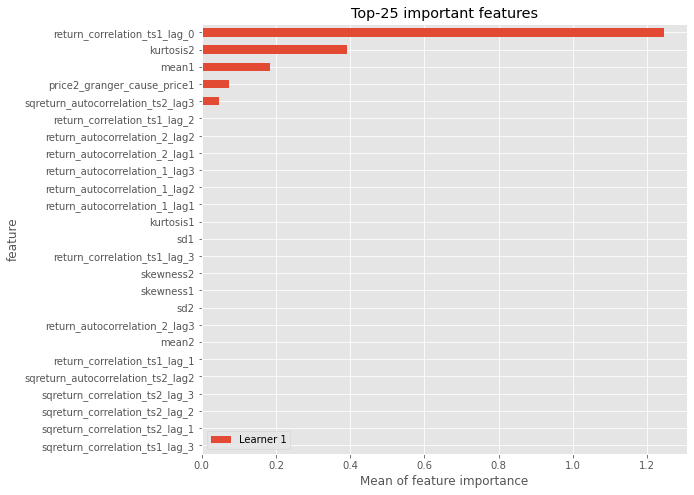

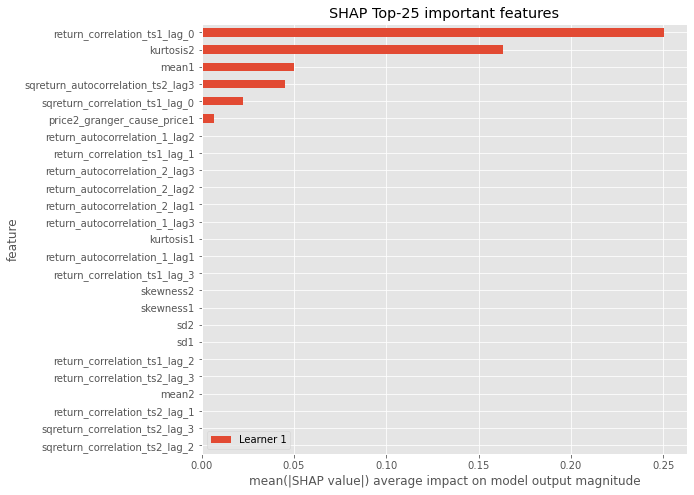

In [23]:
np.random.seed(9868)
num_iter = 30
random_seeds = np.random.randint(low=0, high=980608, size=(num_iter,))
results = []

real_statistics = create_statistics(
    label="real", 
    rolling_window=20, 
    return_csv_location=real_data_folder + "pair_returns_classify.csv", 
    price_csv_location=real_data_folder + "pair_prices_classify.csv")    
    
for iter in range(num_iter):

    random_seed = int(random_seeds[iter])
    
    
    n_sim_log_prices = n_stvol_simulation(
    random_seed=random_seed, num_sim=248,
    mu11=params[0], mu21=params[1], mu22=params[2], 
    mu31=params[3], mu41=params[4], mu42=params[5],  
    sigma11=params[6], sigma12=params[7], sigma13=params[8], sigma14=params[9],
    sigma21=params[10], sigma22=params[11], sigma23=params[12], sigma24=params[13],
    sigma31=params[14], sigma32=params[15], sigma33=params[16], sigma34=params[17],
    sigma41=params[18], sigma42=params[19], sigma43=params[20], sigma44=params[21],
    xinit_vec=xinit_vec, vinit_vec=vinit_vec, T0=T0, T=T, length=length)
    
    
    n_sim_pair_prices = log_price_to_price(n_log_price=n_sim_log_prices)
    n_sim_pair_returns = price_to_return(n_price=n_sim_pair_prices)
    
    n_sim_pair_prices.to_csv("/Users/changmao/Desktop/OneDrive - Imperial College London/InferStat - MSc Summer Project/GitHub/Summer-Research-Project/Calibration/Cluster jobs/cal_stvol/n_sim_stvol_pair_prices.csv")
    n_sim_pair_returns.to_csv("/Users/changmao/Desktop/OneDrive - Imperial College London/InferStat - MSc Summer Project/GitHub/Summer-Research-Project/Calibration/Cluster jobs/cal_stvol/n_sim_stvol_pair_returns.csv")


    simulated_statistics = create_statistics(
        label="simulated", 
        rolling_window=20, 
        return_csv_location="/Users/changmao/Desktop/OneDrive - Imperial College London/InferStat - MSc Summer Project/GitHub/Summer-Research-Project/Calibration/Cluster jobs/cal_stvol/n_sim_stvol_pair_returns.csv", 
        price_csv_location="/Users/changmao/Desktop/OneDrive - Imperial College London/InferStat - MSc Summer Project/GitHub/Summer-Research-Project/Calibration/Cluster jobs/cal_stvol/n_sim_stvol_pair_prices.csv")

    dataset = pd.concat([real_statistics, simulated_statistics])
    X = dataset.iloc[:, 0:36]
    y = dataset.iloc[:, 36]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed)
    automl = AutoML(eval_metric='accuracy')
    automl.fit(X_train, y_train)
    predictions = automl.predict(X_test)
    accuracy_result = accuracy_score(y_test, predictions)
    results.append(accuracy_result)
    
    print(f"Accuracy of predictions:  {accuracy_result:.3f}")

In [ ]:
pd.DataFrame(results).to_csv("/Users/changmao/Desktop/OneDrive - Imperial College London/InferStat - MSc Summer Project/GitHub/Summer-Research-Project/Calibration/Cluster jobs/cal_stvol/results_stvol.csv")

accuracy_average = np.mean(results)
accuracy_std = np.std(results)
print(random_seeds)
print(results)
print(accuracy_average)
print(accuracy_std)

In [12]:
real_statistics = create_statistics(
    label="real", 
    rolling_window=20, 
    return_csv_location=real_data_folder + "pair_returns_classify.csv", 
    price_csv_location=real_data_folder + "pair_prices_classify.csv")  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.5909  , p=0.2048  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=3.2140  , p=0.2005  , df=2
likelihood ratio test: chi2=3.2037  , p=0.2015  , df=2
parameter F test:         F=1.5909  , p=0.2048  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.5049  , p=0.0016  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=13.1418 , p=0.0014  , df=2
likelihood ratio test: chi2=12.9713 , p=0.0015  , df=2
parameter F test:         F=6.5049  , p=0.0016  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6032  , p=0.4377  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.6068  , p=0.4360  , df=1
likelihood ratio test: chi2=0.6065  , p=0.4361  , df=1
parameter F test:         F=0.6032  , p=0.4377  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=11.8732 , p=0.0006  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0003  , p=0.9854  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.0003  , p=0.9853  , df=1
likelihood ratio test: chi2=0.0003  , p=0.9853  , df=1
parameter F test:         F=0.0003  , p=0.9854  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0843  , p=0.2982  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=1.0908  , p=0.2963  , df=1
likelihood ratio test: chi2=1.0896  , p=0.2965  , df=1
parameter F test:         F=1.0843  , p=0.2982  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2695  , p=0.6039  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.2712  , p=0.6026  , df=1
likelihood ratio test: chi2=0.2711  , p=0.6026  , df=1
parameter F test:         F=0.2695  , p=0.6039  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5235  , p=0.2177  


Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.0913  , p=0.0808  , df_denom=487, df_num=4
ssr based chi2 test:   chi2=8.5196  , p=0.0743  , df=4
likelihood ratio test: chi2=8.4473  , p=0.0765  , df=4
parameter F test:         F=2.0913  , p=0.0808  , df_denom=487, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.0263  , p=0.3931  , df_denom=487, df_num=4
ssr based chi2 test:   chi2=4.1809  , p=0.3821  , df=4
likelihood ratio test: chi2=4.1634  , p=0.3843  , df=4
parameter F test:         F=1.0263  , p=0.3931  , df_denom=487, df_num=4

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4245  , p=0.2332  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=1.4331  , p=0.2313  , df=1
likelihood ratio test: chi2=1.4310  , p=0.2316  , df=1
parameter F test:         F=1.4245  , p=0.2332  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0344  , p=0.8529  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9680  , p=0.3257  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.9738  , p=0.3237  , df=1
likelihood ratio test: chi2=0.9729  , p=0.3240  , df=1
parameter F test:         F=0.9680  , p=0.3257  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9209  , p=0.3377  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.9265  , p=0.3358  , df=1
likelihood ratio test: chi2=0.9257  , p=0.3360  , df=1
parameter F test:         F=0.9209  , p=0.3377  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9024  , p=0.1684  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=1.9139  , p=0.1665  , df=1
likelihood ratio test: chi2=1.9103  , p=0.1669  , df=1
parameter F test:         F=1.9024  , p=0.1684  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0016  , p=0.9677  

ssr based F test:         F=3.1959  , p=0.0744  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=3.2152  , p=0.0730  , df=1
likelihood ratio test: chi2=3.2049  , p=0.0734  , df=1
parameter F test:         F=3.1959  , p=0.0744  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6800  , p=0.1955  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=1.6902  , p=0.1936  , df=1
likelihood ratio test: chi2=1.6873  , p=0.1940  , df=1
parameter F test:         F=1.6800  , p=0.1955  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9733  , p=0.3243  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.9792  , p=0.3224  , df=1
likelihood ratio test: chi2=0.9782  , p=0.3226  , df=1
parameter F test:         F=0.9733  , p=0.3243  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1764  , p=0.6747  , df_denom=496, df_num=1
ssr based chi2 test: 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0796  , p=0.7780  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.0801  , p=0.7772  , df=1
likelihood ratio test: chi2=0.0801  , p=0.7772  , df=1
parameter F test:         F=0.0796  , p=0.7780  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4900  , p=0.4843  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.4930  , p=0.4826  , df=1
likelihood ratio test: chi2=0.4927  , p=0.4827  , df=1
parameter F test:         F=0.4900  , p=0.4843  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4680  , p=0.4942  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.4708  , p=0.4926  , df=1
likelihood ratio test: chi2=0.4706  , p=0.4927  , df=1
parameter F test:         F=0.4680  , p=0.4942  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2764  , p=0.2591  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4084  , p=0.5231  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.4108  , p=0.5215  , df=1
likelihood ratio test: chi2=0.4107  , p=0.5216  , df=1
parameter F test:         F=0.4084  , p=0.5231  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0695  , p=0.3016  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=1.0760  , p=0.2996  , df=1
likelihood ratio test: chi2=1.0748  , p=0.2999  , df=1
parameter F test:         F=1.0695  , p=0.3016  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0833  , p=0.7730  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.0838  , p=0.7722  , df=1
likelihood ratio test: chi2=0.0838  , p=0.7722  , df=1
parameter F test:         F=0.0833  , p=0.7730  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5625  , p=0.1101  


Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4345  , p=0.7837  , df_denom=487, df_num=4
ssr based chi2 test:   chi2=1.7703  , p=0.7779  , df=4
likelihood ratio test: chi2=1.7671  , p=0.7785  , df=4
parameter F test:         F=0.4345  , p=0.7837  , df_denom=487, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.5613  , p=0.1834  , df_denom=487, df_num=4
ssr based chi2 test:   chi2=6.3606  , p=0.1738  , df=4
likelihood ratio test: chi2=6.3202  , p=0.1765  , df=4
parameter F test:         F=1.5613  , p=0.1834  , df_denom=487, df_num=4

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8933  , p=0.3450  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.8987  , p=0.3431  , df=1
likelihood ratio test: chi2=0.8979  , p=0.3434  , df=1
parameter F test:         F=0.8933  , p=0.3450  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7819  , p=0.3770  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7815  , p=0.3771  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.7863  , p=0.3752  , df=1
likelihood ratio test: chi2=0.7856  , p=0.3754  , df=1
parameter F test:         F=0.7815  , p=0.3771  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1180  , p=0.1462  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=2.1308  , p=0.1444  , df=1
likelihood ratio test: chi2=2.1262  , p=0.1448  , df=1
parameter F test:         F=2.1180  , p=0.1462  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0159  , p=0.1563  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=2.0281  , p=0.1544  , df=1
likelihood ratio test: chi2=2.0240  , p=0.1548  , df=1
parameter F test:         F=2.0159  , p=0.1563  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8417  , p=0.1754  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5123  , p=0.5994  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=1.0350  , p=0.5960  , df=2
likelihood ratio test: chi2=1.0339  , p=0.5963  , df=2
parameter F test:         F=0.5123  , p=0.5994  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.1450  , p=0.0164  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=8.3742  , p=0.0152  , df=2
likelihood ratio test: chi2=8.3045  , p=0.0157  , df=2
parameter F test:         F=4.1450  , p=0.0164  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8659  , p=0.1726  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=1.8772  , p=0.1707  , df=1
likelihood ratio test: chi2=1.8736  , p=0.1711  , df=1
parameter F test:         F=1.8659  , p=0.1726  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1940  , p=0.6598  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4018  , p=0.2370  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=1.4103  , p=0.2350  , df=1
likelihood ratio test: chi2=1.4083  , p=0.2353  , df=1
parameter F test:         F=1.4018  , p=0.2370  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7914  , p=0.3741  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.7962  , p=0.3722  , df=1
likelihood ratio test: chi2=0.7955  , p=0.3724  , df=1
parameter F test:         F=0.7914  , p=0.3741  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.3533  , p=0.0040  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=8.4038  , p=0.0037  , df=1
likelihood ratio test: chi2=8.3338  , p=0.0039  , df=1
parameter F test:         F=8.3533  , p=0.0040  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3431  , p=0.5583  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.7005  , p=0.0095  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=9.4963  , p=0.0087  , df=2
likelihood ratio test: chi2=9.4069  , p=0.0091  , df=2
parameter F test:         F=4.7005  , p=0.0095  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7206  , p=0.4870  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=1.4558  , p=0.4829  , df=2
likelihood ratio test: chi2=1.4537  , p=0.4834  , df=2
parameter F test:         F=0.7206  , p=0.4870  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=0.4759  , p=0.7943  , df_denom=484, df_num=5
ssr based chi2 test:   chi2=2.4335  , p=0.7865  , df=5
likelihood ratio test: chi2=2.4275  , p=0.7874  , df=5
parameter F test:         F=0.4759  , p=0.7943  , df_denom=484, df_num=5

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=1.3956  , p=0.2244  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8239  , p=0.4393  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=1.6644  , p=0.4351  , df=2
likelihood ratio test: chi2=1.6617  , p=0.4357  , df=2
parameter F test:         F=0.8239  , p=0.4393  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.5463  , p=0.0041  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=11.2051 , p=0.0037  , df=2
likelihood ratio test: chi2=11.0809 , p=0.0039  , df=2
parameter F test:         F=5.5463  , p=0.0041  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0296  , p=0.8635  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.0298  , p=0.8630  , df=1
likelihood ratio test: chi2=0.0298  , p=0.8630  , df=1
parameter F test:         F=0.0296  , p=0.8635  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.2667  , p=0.0713  


Granger Causality
number of lags (no zero) 8
ssr based F test:         F=0.5881  , p=0.7880  , df_denom=475, df_num=8
ssr based chi2 test:   chi2=4.8731  , p=0.7711  , df=8
likelihood ratio test: chi2=4.8491  , p=0.7736  , df=8
parameter F test:         F=0.5881  , p=0.7880  , df_denom=475, df_num=8

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=1.3335  , p=0.2244  , df_denom=475, df_num=8
ssr based chi2 test:   chi2=11.0496 , p=0.1989  , df=8
likelihood ratio test: chi2=10.9274 , p=0.2058  , df=8
parameter F test:         F=1.3335  , p=0.2244  , df_denom=475, df_num=8

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1149  , p=0.7347  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.1156  , p=0.7338  , df=1
likelihood ratio test: chi2=0.1156  , p=0.7338  , df=1
parameter F test:         F=0.1149  , p=0.7347  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.4834  , p=0.0196  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.3165  , p=0.0139  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=8.7205  , p=0.0128  , df=2
likelihood ratio test: chi2=8.6450  , p=0.0133  , df=2
parameter F test:         F=4.3165  , p=0.0139  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.0618  , p=0.0477  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=6.1857  , p=0.0454  , df=2
likelihood ratio test: chi2=6.1476  , p=0.0462  , df=2
parameter F test:         F=3.0618  , p=0.0477  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0248  , p=0.8750  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.0249  , p=0.8745  , df=1
likelihood ratio test: chi2=0.0249  , p=0.8745  , df=1
parameter F test:         F=0.0248  , p=0.8750  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9037  , p=0.3423  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0962  , p=0.7565  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.0968  , p=0.7557  , df=1
likelihood ratio test: chi2=0.0968  , p=0.7557  , df=1
parameter F test:         F=0.0962  , p=0.7565  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1978  , p=0.2743  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=1.2050  , p=0.2723  , df=1
likelihood ratio test: chi2=1.2036  , p=0.2726  , df=1
parameter F test:         F=1.1978  , p=0.2743  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.4429  , p=0.0122  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=8.9759  , p=0.0112  , df=2
likelihood ratio test: chi2=8.8960  , p=0.0117  , df=2
parameter F test:         F=4.4429  , p=0.0122  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.3560  , p=0.2587  

In [20]:
random_seed = 9868
    
n_sim_log_prices = n_stvol_simulation(
    random_seed=random_seed, num_sim=248,
    mu11=params[0], mu21=params[1], mu22=params[2], 
    mu31=params[3], mu41=params[4], mu42=params[5],  
    sigma11=params[6], sigma12=params[7], sigma13=params[8], sigma14=params[9],
    sigma21=params[10], sigma22=params[11], sigma23=params[12], sigma24=params[13],
    sigma31=params[14], sigma32=params[15], sigma33=params[16], sigma34=params[17],
    sigma41=params[18], sigma42=params[19], sigma43=params[20], sigma44=params[21],
    xinit_vec=xinit_vec, vinit_vec=vinit_vec, T0=T0, T=T, length=length)
    
    
n_sim_pair_prices = log_price_to_price(n_log_price=n_sim_log_prices)
n_sim_pair_returns = price_to_return(n_price=n_sim_pair_prices)

n_sim_pair_prices.to_csv("/Users/changmao/Desktop/OneDrive - Imperial College London/InferStat - MSc Summer Project/GitHub/Summer-Research-Project/Calibration/Cluster jobs/cal_stvol/n_sim_stvol_pair_prices.csv")
n_sim_pair_returns.to_csv("/Users/changmao/Desktop/OneDrive - Imperial College London/InferStat - MSc Summer Project/GitHub/Summer-Research-Project/Calibration/Cluster jobs/cal_stvol/n_sim_stvol_pair_returns.csv")



simulated_statistics = create_statistics(
    label="simulated", 
    rolling_window=20, 
    return_csv_location="/Users/changmao/Desktop/OneDrive - Imperial College London/InferStat - MSc Summer Project/GitHub/Summer-Research-Project/Calibration/Cluster jobs/cal_stvol/n_sim_stvol_pair_returns.csv", 
    price_csv_location="/Users/changmao/Desktop/OneDrive - Imperial College London/InferStat - MSc Summer Project/GitHub/Summer-Research-Project/Calibration/Cluster jobs/cal_stvol/n_sim_stvol_pair_prices.csv")

dataset = pd.concat([real_statistics, simulated_statistics])
X = dataset.iloc[:, 0:36]
y = dataset.iloc[:, 36]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed)
automl = AutoML(eval_metric='accuracy')
automl.fit(X_train, y_train)
predictions = automl.predict(X_test)
accuracy_result = accuracy_score(y_test, predictions)

print(f"Accuracy of predictions:  {accuracy_result:.3f}")


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2404  , p=0.6242  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.2418  , p=0.6229  , df=1
likelihood ratio test: chi2=0.2417  , p=0.6229  , df=1
parameter F test:         F=0.2404  , p=0.6242  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=16.3871 , p=0.0001  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=16.4860 , p=0.0000  , df=1
likelihood ratio test: chi2=16.2201 , p=0.0001  , df=1
parameter F test:         F=16.3871 , p=0.0001  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=1.0830  , p=0.3715  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=6.6734  , p=0.3521  , df=6
likelihood ratio test: chi2=6.6288  , p=0.3565  , df=6
parameter F test:         F=1.0830  , p=0.3715  , df_denom=482, df_num=6

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=3.0832  , p=0.0057  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3213  , p=0.5711  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.3232  , p=0.5697  , df=1
likelihood ratio test: chi2=0.3231  , p=0.5697  , df=1
parameter F test:         F=0.3213  , p=0.5711  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1864  , p=0.2766  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.1936  , p=0.2746  , df=1
likelihood ratio test: chi2=1.1922  , p=0.2749  , df=1
parameter F test:         F=1.1864  , p=0.2766  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.5468  , p=0.0041  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=11.2059 , p=0.0037  , df=2
likelihood ratio test: chi2=11.0820 , p=0.0039  , df=2
parameter F test:         F=5.5468  , p=0.0041  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.9503  , p=0.0074  


Granger Causality
number of lags (no zero) 8
ssr based F test:         F=3.3723  , p=0.0009  , df_denom=476, df_num=8
ssr based chi2 test:   chi2=27.9416 , p=0.0005  , df=8
likelihood ratio test: chi2=27.1785 , p=0.0007  , df=8
parameter F test:         F=3.3723  , p=0.0009  , df_denom=476, df_num=8

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=2.9736  , p=0.0029  , df_denom=476, df_num=8
ssr based chi2 test:   chi2=24.6383 , p=0.0018  , df=8
likelihood ratio test: chi2=24.0424 , p=0.0023  , df=8
parameter F test:         F=2.9736  , p=0.0029  , df_denom=476, df_num=8

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.5796  , p=0.0328  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.6073  , p=0.0318  , df=1
likelihood ratio test: chi2=4.5862  , p=0.0322  , df=1
parameter F test:         F=4.5796  , p=0.0328  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1236  , p=0.7254  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5432  , p=0.4614  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.5465  , p=0.4597  , df=1
likelihood ratio test: chi2=0.5462  , p=0.4599  , df=1
parameter F test:         F=0.5432  , p=0.4614  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5575  , p=0.4556  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.5609  , p=0.4539  , df=1
likelihood ratio test: chi2=0.5606  , p=0.4540  , df=1
parameter F test:         F=0.5575  , p=0.4556  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.1215  , p=0.1209  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=4.2860  , p=0.1173  , df=2
likelihood ratio test: chi2=4.2677  , p=0.1184  , df=2
parameter F test:         F=2.1215  , p=0.1209  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.4089  , p=0.0127  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0495  , p=0.8240  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0498  , p=0.8234  , df=1
likelihood ratio test: chi2=0.0498  , p=0.8234  , df=1
parameter F test:         F=0.0495  , p=0.8240  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.7690  , p=0.0167  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=5.8038  , p=0.0160  , df=1
likelihood ratio test: chi2=5.7704  , p=0.0163  , df=1
parameter F test:         F=5.7690  , p=0.0167  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1637  , p=0.2812  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.1707  , p=0.2793  , df=1
likelihood ratio test: chi2=1.1694  , p=0.2795  , df=1
parameter F test:         F=1.1637  , p=0.2812  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8132  , p=0.1787  


Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.8108  , p=0.0046  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=15.5242 , p=0.0037  , df=4
likelihood ratio test: chi2=15.2866 , p=0.0041  , df=4
parameter F test:         F=3.8108  , p=0.0046  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.4465  , p=0.0086  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=14.0404 , p=0.0072  , df=4
likelihood ratio test: chi2=13.8457 , p=0.0078  , df=4
parameter F test:         F=3.4465  , p=0.0086  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2896  , p=0.5907  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.2914  , p=0.5894  , df=1
likelihood ratio test: chi2=0.2913  , p=0.5894  , df=1
parameter F test:         F=0.2896  , p=0.5907  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.8058  , p=0.0163  


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.3580  , p=0.0048  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=13.2603 , p=0.0041  , df=3
likelihood ratio test: chi2=13.0869 , p=0.0045  , df=3
parameter F test:         F=4.3580  , p=0.0048  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.0736  , p=0.1028  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=6.3096  , p=0.0975  , df=3
likelihood ratio test: chi2=6.2700  , p=0.0992  , df=3
parameter F test:         F=2.0736  , p=0.1028  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0885  , p=0.7663  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0890  , p=0.7655  , df=1
likelihood ratio test: chi2=0.0890  , p=0.7655  , df=1
parameter F test:         F=0.0885  , p=0.7663  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8039  , p=0.1799  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3490  , p=0.5550  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.3511  , p=0.5535  , df=1
likelihood ratio test: chi2=0.3510  , p=0.5536  , df=1
parameter F test:         F=0.3490  , p=0.5550  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3988  , p=0.2375  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.4072  , p=0.2355  , df=1
likelihood ratio test: chi2=1.4053  , p=0.2358  , df=1
parameter F test:         F=1.3988  , p=0.2375  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2163  , p=0.6421  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.2176  , p=0.6409  , df=1
likelihood ratio test: chi2=0.2175  , p=0.6409  , df=1
parameter F test:         F=0.2163  , p=0.6421  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0516  , p=0.8204  


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.5103  , p=0.0060  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=26.2242 , p=0.0035  , df=10
likelihood ratio test: chi2=25.5478 , p=0.0044  , df=10
parameter F test:         F=2.5103  , p=0.0060  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.8330  , p=0.0001  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=40.0428 , p=0.0000  , df=10
likelihood ratio test: chi2=38.4936 , p=0.0000  , df=10
parameter F test:         F=3.8330  , p=0.0001  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2661  , p=0.7665  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=0.5376  , p=0.7643  , df=2
likelihood ratio test: chi2=0.5373  , p=0.7644  , df=2
parameter F test:         F=0.2661  , p=0.7665  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.3484  , 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2772  , p=0.5988  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.2788  , p=0.5975  , df=1
likelihood ratio test: chi2=0.2788  , p=0.5975  , df=1
parameter F test:         F=0.2772  , p=0.5988  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0197  , p=0.8883  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0199  , p=0.8879  , df=1
likelihood ratio test: chi2=0.0199  , p=0.8879  , df=1
parameter F test:         F=0.0197  , p=0.8883  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4354  , p=0.5097  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.4380  , p=0.5081  , df=1
likelihood ratio test: chi2=0.4378  , p=0.5082  , df=1
parameter F test:         F=0.4354  , p=0.5097  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2551  , p=0.6137  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4133  , p=0.6617  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=0.8350  , p=0.6587  , df=2
likelihood ratio test: chi2=0.8343  , p=0.6589  , df=2
parameter F test:         F=0.4133  , p=0.6617  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.3257  , p=0.0988  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=4.6984  , p=0.0954  , df=2
likelihood ratio test: chi2=4.6764  , p=0.0965  , df=2
parameter F test:         F=2.3257  , p=0.0988  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.5268  , p=0.0037  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=8.5782  , p=0.0034  , df=1
likelihood ratio test: chi2=8.5055  , p=0.0035  , df=1
parameter F test:         F=8.5268  , p=0.0037  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9072  , p=0.1679  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4038  , p=0.1217  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.4183  , p=0.1199  , df=1
likelihood ratio test: chi2=2.4125  , p=0.1204  , df=1
parameter F test:         F=2.4038  , p=0.1217  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0540  , p=0.1524  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.0664  , p=0.1506  , df=1
likelihood ratio test: chi2=2.0621  , p=0.1510  , df=1
parameter F test:         F=2.0540  , p=0.1524  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.7447  , p=0.1758  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=3.5247  , p=0.1716  , df=2
likelihood ratio test: chi2=3.5123  , p=0.1727  , df=2
parameter F test:         F=1.7447  , p=0.1758  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.9246  , p=0.0204  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1181  , p=0.7312  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1188  , p=0.7303  , df=1
likelihood ratio test: chi2=0.1188  , p=0.7303  , df=1
parameter F test:         F=0.1181  , p=0.7312  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.4570  , p=0.0022  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=9.5141  , p=0.0020  , df=1
likelihood ratio test: chi2=9.4247  , p=0.0021  , df=1
parameter F test:         F=9.4570  , p=0.0022  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.7358  , p=0.1408  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=7.0712  , p=0.1322  , df=4
likelihood ratio test: chi2=7.0213  , p=0.1348  , df=4
parameter F test:         F=1.7358  , p=0.1408  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.5309  , p=0.1919  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3459  , p=0.5567  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.3479  , p=0.5553  , df=1
likelihood ratio test: chi2=0.3478  , p=0.5553  , df=1
parameter F test:         F=0.3459  , p=0.5567  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.6393  , p=0.0570  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.6613  , p=0.0557  , df=1
likelihood ratio test: chi2=3.6479  , p=0.0561  , df=1
parameter F test:         F=3.6393  , p=0.0570  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=2.3479  , p=0.0303  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=14.4671 , p=0.0248  , df=6
likelihood ratio test: chi2=14.2597 , p=0.0269  , df=6
parameter F test:         F=2.3479  , p=0.0303  , df_denom=482, df_num=6

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=3.2858  , p=0.0035  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0603  , p=0.3036  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.0667  , p=0.3017  , df=1
likelihood ratio test: chi2=1.0656  , p=0.3019  , df=1
parameter F test:         F=1.0603  , p=0.3036  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9790  , p=0.0850  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.9969  , p=0.0834  , df=1
likelihood ratio test: chi2=2.9880  , p=0.0839  , df=1
parameter F test:         F=2.9790  , p=0.0850  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0278  , p=0.8676  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0280  , p=0.8671  , df=1
likelihood ratio test: chi2=0.0280  , p=0.8671  , df=1
parameter F test:         F=0.0278  , p=0.8676  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0283  , p=0.8666  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2087  , p=0.8117  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=0.4216  , p=0.8099  , df=2
likelihood ratio test: chi2=0.4214  , p=0.8100  , df=2
parameter F test:         F=0.2087  , p=0.8117  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.5148  , p=0.2209  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=3.0602  , p=0.2165  , df=2
likelihood ratio test: chi2=3.0509  , p=0.2175  , df=2
parameter F test:         F=1.5148  , p=0.2209  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1637  , p=0.6860  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1647  , p=0.6849  , df=1
likelihood ratio test: chi2=0.1646  , p=0.6849  , df=1
parameter F test:         F=0.1637  , p=0.6860  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0658  , p=0.7976  

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline accuracy 0.505747 trained in 0.24 seconds
2_DecisionTree accuracy 0.91954 trained in 4.33 seconds
3_Linear accuracy 0.908046 trained in 2.81 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost accuracy 0.977011 trained in 3.36 seconds
5_Default_NeuralNetwork accuracy 0.942529 trained in 1.43 seconds
6_Default_RandomForest accuracy 0.942529 trained in 6.27 seconds
* Step ensemble will try to check up to 1 model
Ensemble accuracy 0.977011 trained in 0.36 seconds
AutoML fit time: 28.91 seconds
AutoML best model: 4_Default_Xgboost
Accuracy of predictions:  0.893


An input array is constant; the correlation coefficent is not defined.


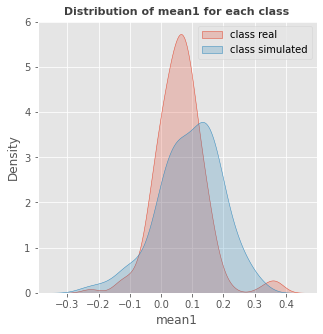

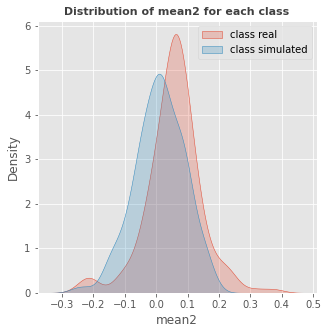

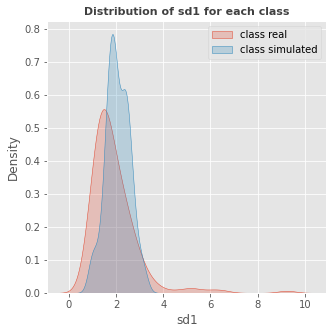

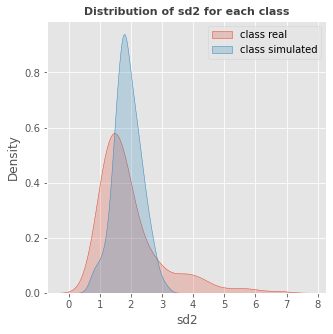

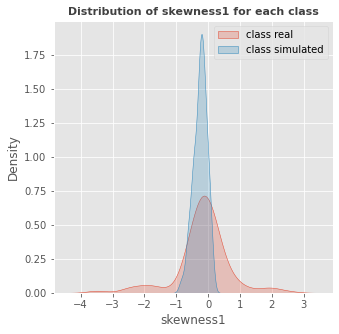

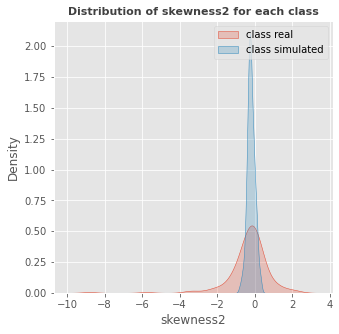

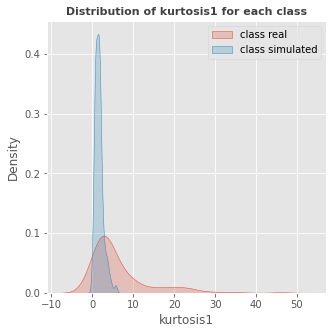

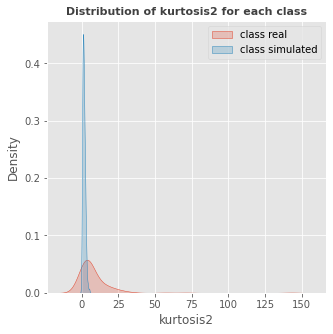

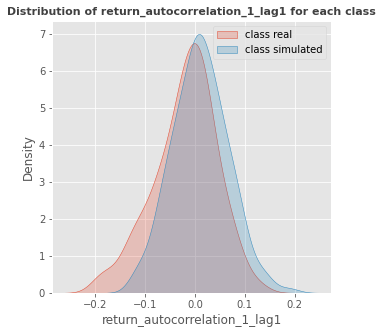

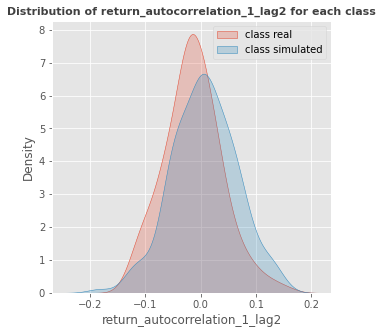

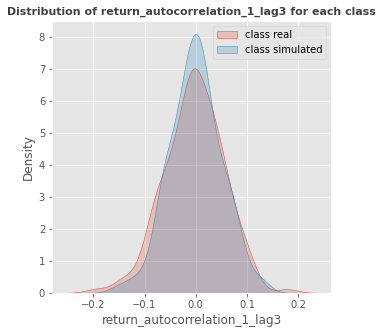

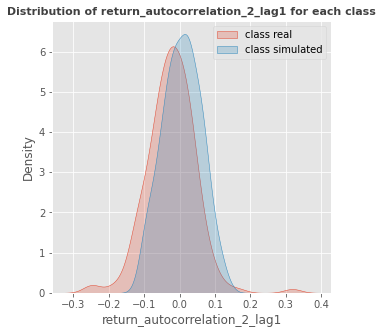

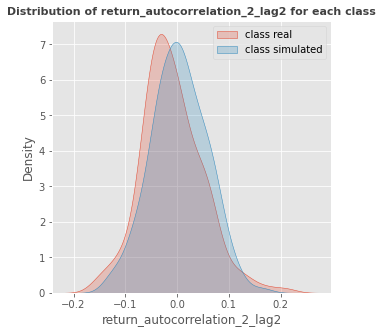

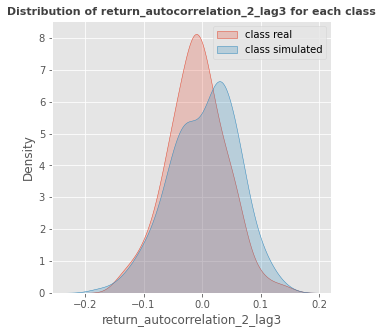

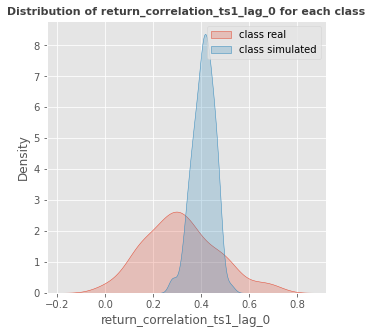

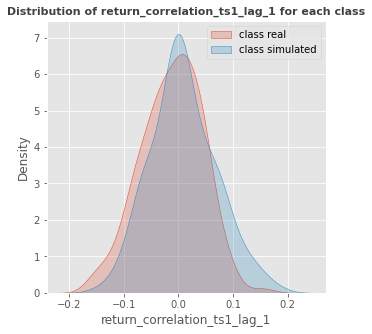

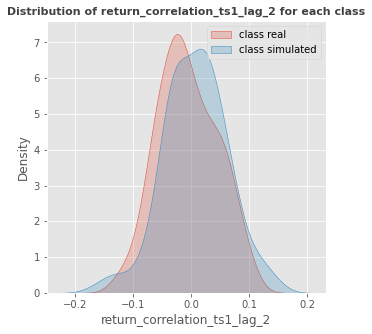

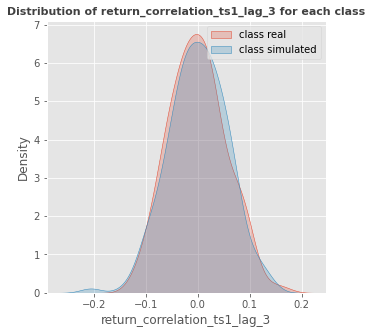

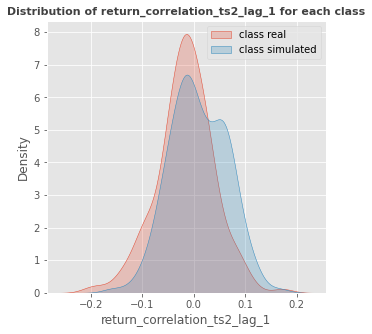

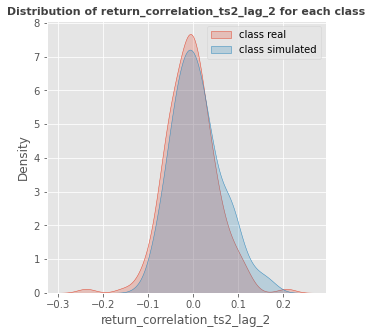

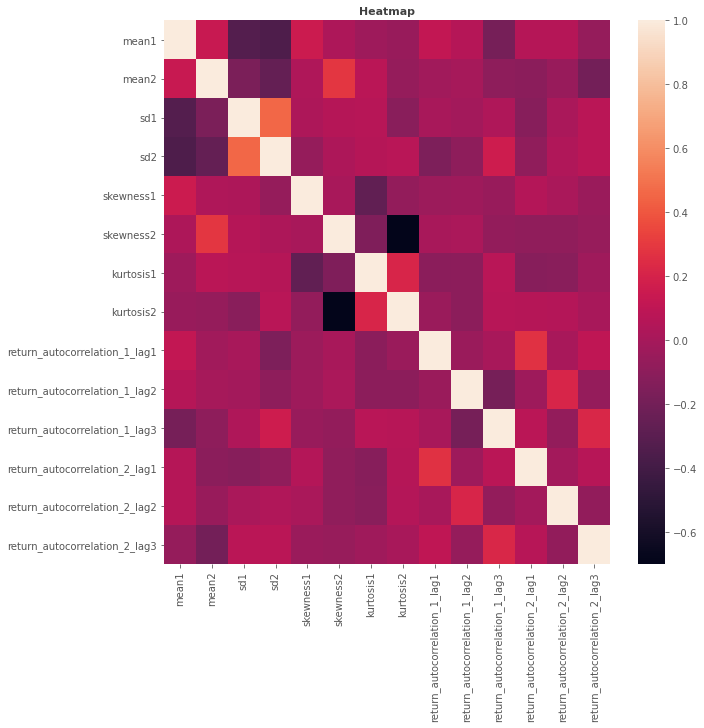

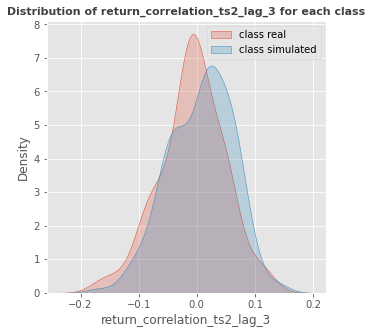

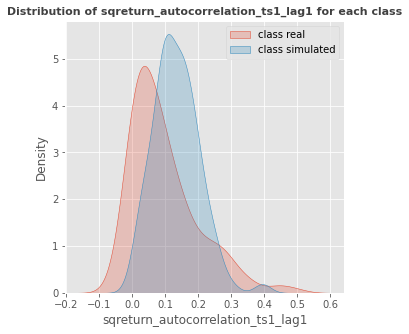

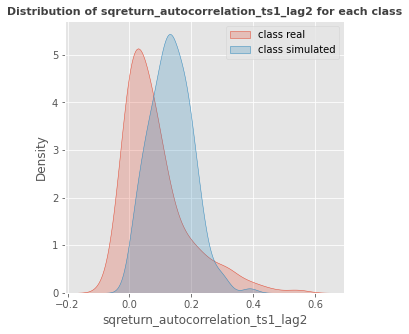

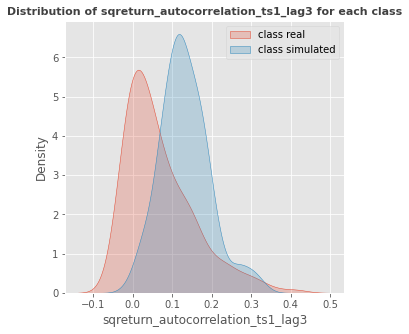

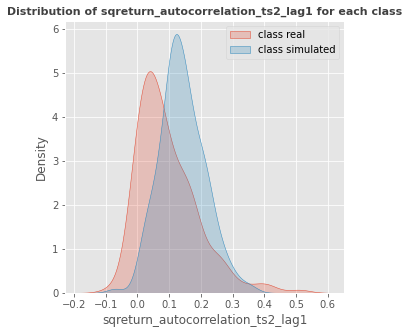

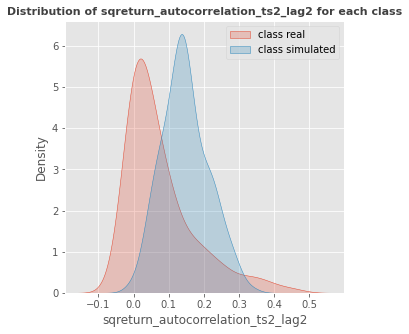

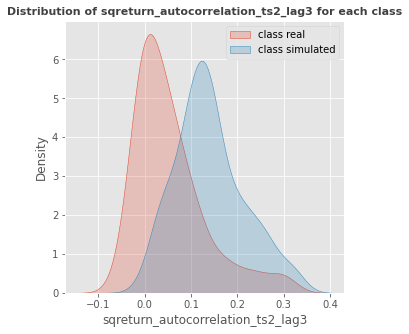

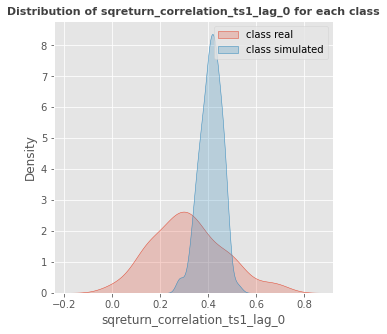

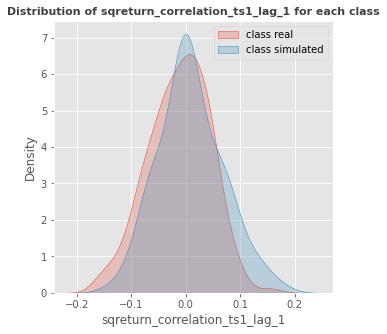

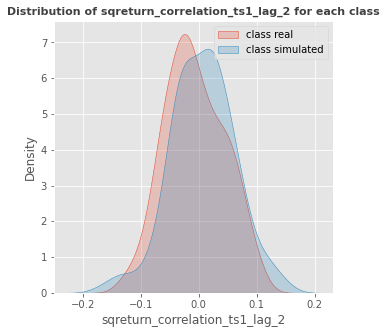

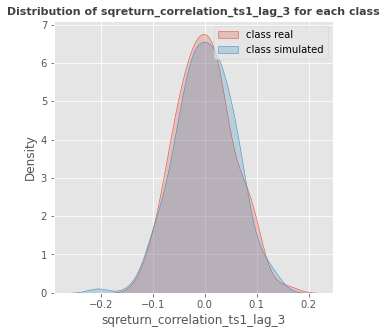

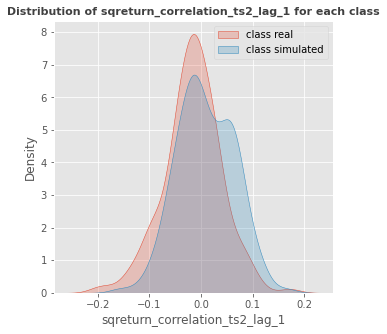

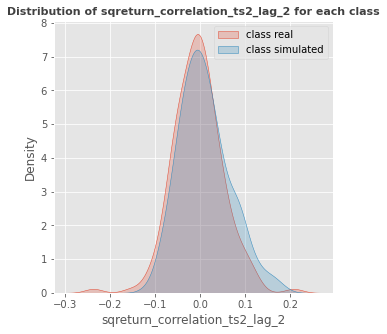

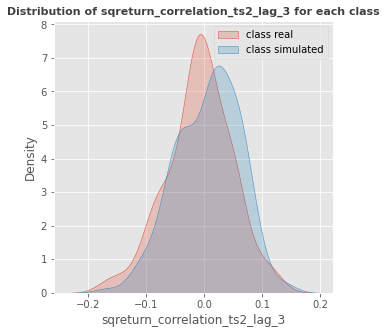

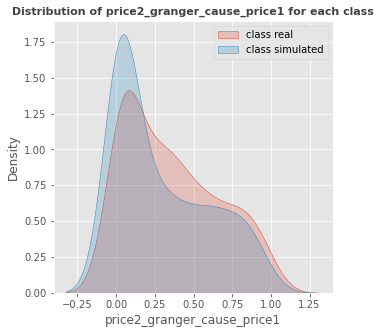

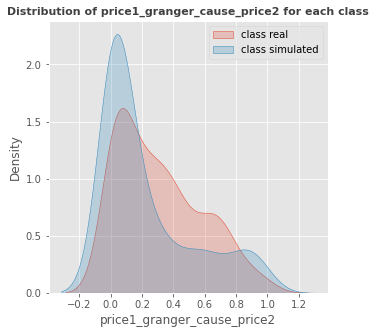

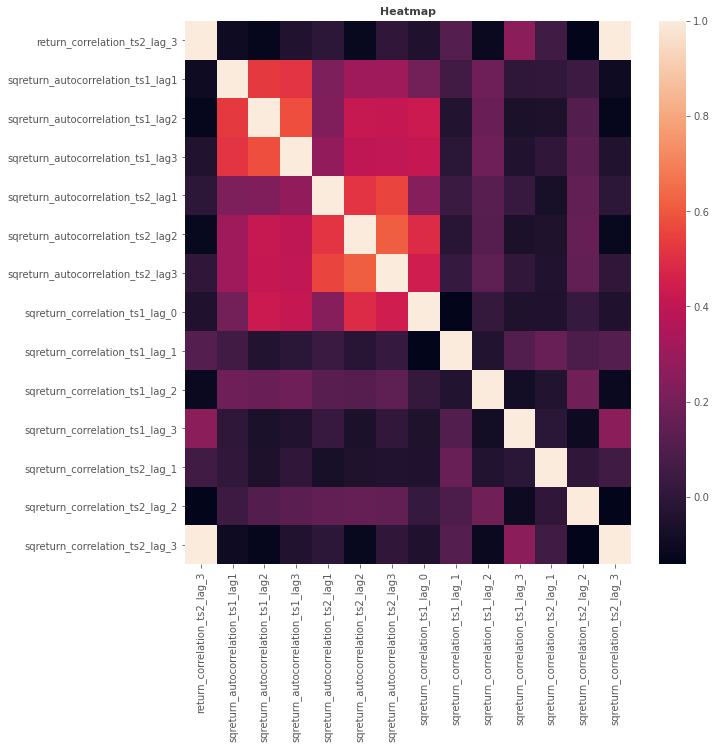

In [21]:
plt.rc('figure', max_open_warning = 0)
EDA.extensive_eda(X_train.iloc[:, 0:20], y_train, save_path="/Users/changmao/Desktop/OneDrive - Imperial College London/InferStat - MSc Summer Project/GitHub/Summer-Research-Project/Calibration/Cluster jobs/cal_stvol/EDA_stvol")
EDA.extensive_eda(X_train.iloc[:, 20:36], y_train, save_path="/Users/changmao/Desktop/OneDrive - Imperial College London/InferStat - MSc Summer Project/GitHub/Summer-Research-Project/Calibration/Cluster jobs/cal_stvol/EDA_stvol")